##Prévision des crédits logement:

Importing Packages: You imported necessary packages such as pandas, matplotlib, seaborn, and scikit-learn libraries.

In [13]:
# Importer les packages
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

import pickle

from scipy.stats import chi2_contingency
import fanalysis.mca as mca

# 1- Loading Data

Loaded the MQTT dataset into a DataFrame named df_MQTT and created a copy named data_MQTT

In [14]:
df_MQTT=pd.read_csv('mqttdataset_reduced.csv')

In [15]:
df_MQTT

,tcp.flags,tcp.time_delta,tcp.len,mqtt.conack.flags,mqtt.conack.flags.reserved,mqtt.conack.flags.sp,mqtt.conack.val,mqtt.conflag.cleansess,mqtt.conflag.passwd,mqtt.conflag.qos,...,mqtt.qos,mqtt.retain,mqtt.sub.qos,mqtt.suback.qos,mqtt.ver,mqtt.willmsg,mqtt.willmsg_len,mqtt.willtopic,mqtt.willtopic_len,target
0,0x00000010,0.000019,0,0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,legitimate
1,0x00000018,0.000000,90,0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,dos
2,0x00000018,0.000001,8,0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,dos
3,0x00000018,0.000001,85,0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,dos
4,0x00000010,0.000004,0,0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,legitimate
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
330921,0x00000010,0.000003,0,0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,legitimate
330922,0x00000010,0.000733,1460,0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,dos
330923,0x00000010,0.000034,0,0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,dos
330924,0x00000010,0.000068,1460,0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,dos


In [16]:
data_MQTT= df_MQTT.copy()

In [17]:
data_MQTT

,tcp.flags,tcp.time_delta,tcp.len,mqtt.conack.flags,mqtt.conack.flags.reserved,mqtt.conack.flags.sp,mqtt.conack.val,mqtt.conflag.cleansess,mqtt.conflag.passwd,mqtt.conflag.qos,...,mqtt.qos,mqtt.retain,mqtt.sub.qos,mqtt.suback.qos,mqtt.ver,mqtt.willmsg,mqtt.willmsg_len,mqtt.willtopic,mqtt.willtopic_len,target
0,0x00000010,0.000019,0,0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,legitimate
1,0x00000018,0.000000,90,0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,dos
2,0x00000018,0.000001,8,0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,dos
3,0x00000018,0.000001,85,0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,dos
4,0x00000010,0.000004,0,0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,legitimate
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
330921,0x00000010,0.000003,0,0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,legitimate
330922,0x00000010,0.000733,1460,0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,dos
330923,0x00000010,0.000034,0,0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,dos
330924,0x00000010,0.000068,1460,0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,dos


Data Information: Checked the structure and types of the data using data_MQTT.info().

In [18]:
data_MQTT.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 330926 entries, 0 to 330925
Data columns (total 34 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   tcp.flags                   330926 non-null  object 
 1   tcp.time_delta              330926 non-null  float64
 2   tcp.len                     330926 non-null  int64  
 3   mqtt.conack.flags           330926 non-null  object 
 4   mqtt.conack.flags.reserved  330926 non-null  float64
 5   mqtt.conack.flags.sp        330926 non-null  float64
 6   mqtt.conack.val             330926 non-null  float64
 7   mqtt.conflag.cleansess      330926 non-null  float64
 8   mqtt.conflag.passwd         330926 non-null  float64
 9   mqtt.conflag.qos            330926 non-null  float64
 10  mqtt.conflag.reserved       330926 non-null  float64
 11  mqtt.conflag.retain         330926 non-null  float64
 12  mqtt.conflag.uname          330926 non-null  float64
 13  mqtt.conflag.w

Shape of Data: Checked the dimensions of the dataset using data_MQTT.shape.

In [19]:
data_MQTT.shape

(330926, 34)

Missing Values: Checked for missing values using data_MQTT.isnull().sum().

In [20]:
# verifier si on a des valeurs manquantes
data_MQTT.isnull().sum()

tcp.flags                     0
tcp.time_delta                0
tcp.len                       0
mqtt.conack.flags             0
mqtt.conack.flags.reserved    0
mqtt.conack.flags.sp          0
mqtt.conack.val               0
mqtt.conflag.cleansess        0
mqtt.conflag.passwd           0
mqtt.conflag.qos              0
mqtt.conflag.reserved         0
mqtt.conflag.retain           0
mqtt.conflag.uname            0
mqtt.conflag.willflag         0
mqtt.conflags                 0
mqtt.dupflag                  0
mqtt.hdrflags                 0
mqtt.kalive                   0
mqtt.len                      0
mqtt.msg                      0
mqtt.msgid                    0
mqtt.msgtype                  0
mqtt.proto_len                0
mqtt.protoname                0
mqtt.qos                      0
mqtt.retain                   0
mqtt.sub.qos                  0
mqtt.suback.qos               0
mqtt.ver                      0
mqtt.willmsg                  0
mqtt.willmsg_len              0
mqtt.wil

Column Names: Listed all column names using data_MQTT.columns

In [21]:
data_MQTT.columns

Index(['tcp.flags', 'tcp.time_delta', 'tcp.len', 'mqtt.conack.flags',
       'mqtt.conack.flags.reserved', 'mqtt.conack.flags.sp', 'mqtt.conack.val',
       'mqtt.conflag.cleansess', 'mqtt.conflag.passwd', 'mqtt.conflag.qos',
       'mqtt.conflag.reserved', 'mqtt.conflag.retain', 'mqtt.conflag.uname',
       'mqtt.conflag.willflag', 'mqtt.conflags', 'mqtt.dupflag',
       'mqtt.hdrflags', 'mqtt.kalive', 'mqtt.len', 'mqtt.msg', 'mqtt.msgid',
       'mqtt.msgtype', 'mqtt.proto_len', 'mqtt.protoname', 'mqtt.qos',
       'mqtt.retain', 'mqtt.sub.qos', 'mqtt.suback.qos', 'mqtt.ver',
       'mqtt.willmsg', 'mqtt.willmsg_len', 'mqtt.willtopic',
       'mqtt.willtopic_len', 'target'],
      dtype='object')

### Detailed Explanation and Summary for MQTT Fields and Flags

Below is a detailed explanation of each MQTT field and flag, including their possible values and significance.

### MQTT CONACK Message

1. **mqtt.conack.val:** 
   - **Description:** Value associated with the CONACK message indicating the status of the connection acknowledgment.
   - **Possible Values:**
     - **0:** Connection accepted.
     - **1:** Connection refused, unacceptable protocol version.
     - **2:** Connection refused, identifier rejected.
     - **3:** Connection refused, server unavailable.
     - **4:** Connection refused, bad username or password.
     - **5:** Connection refused, not authorized.

2. **mqtt.conack.flags.sp:** 
   - **Description:** Session Present flag indicating whether a session is present.
   - **Possible Values:**
     - **0:** No stored session state.
     - **1:** Stored session state present.

3. **mqtt.conack.flags.reserved:** 
   - **Description:** Reserved flags in the CONACK message, set to 0 for future use.
   - **Possible Values:** Always 0.

### MQTT CONNECT Message Flags

1. **mqtt.conflag.cleansess:** 
   - **Description:** Clean Session flag indicating whether to start a new session or resume a previous one.
   - **Possible Values:**
     - **0:** Resume previous session.
     - **1:** Start a new session, discarding any previous session.

2. **mqtt.conflag.passwd:** 
   - **Description:** Password flag indicating if a password is included in the CONNECT message.
   - **Possible Values:**
     - **0:** No password included.
     - **1:** Password is included.

3. **mqtt.conflag.qos:** 
   - **Description:** Quality of Service level for the Last Will message.
   - **Possible Values:**
     - **0:** At most once.
     - **1:** At least once.
     - **2:** Exactly once.

4. **mqtt.conflag.reserved:** 
   - **Description:** Reserved flag in the CONNECT message.
   - **Possible Values:** Always 0.

5. **mqtt.conflag.retain:** 
   - **Description:** Retain flag for the Last Will message.
   - **Possible Values:**
     - **0:** Do not retain.
     - **1:** Retain the message.

6. **mqtt.conflag.uname:** 
   - **Description:** Username flag indicating if a username is included in the CONNECT message.
   - **Possible Values:**
     - **0:** No username included.
     - **1:** Username is included.

7. **mqtt.conflag.willflag:** 
   - **Description:** Will flag indicating if a Last Will message is included.
   - **Possible Values:**
     - **0:** No Will message.
     - **1:** Will message is included.

8. **mqtt.conflags:** 
   - **Description:** Collection of all CONNECT message flags.

### Last Will and Testament (LWT)

1. **mqtt.willmsg:** 
   - **Description:** The Last Will message to be published if the client disconnects unexpectedly.

2. **mqtt.willmsg_len:** 
   - **Description:** Length of the Will message.

3. **mqtt.willtopic:** 
   - **Description:** Topic for the Will message.

4. **mqtt.willtopic_len:** 
   - **Description:** Length of the Will topic.

### MQTT Message Fields

1. **mqtt.dupflag:** 
   - **Description:** Duplicate delivery flag indicating if the message is a duplicate.
   - **Possible Values:**
     - **0:** Original delivery.
     - **1:** Duplicate delivery.

2. **mqtt.hdrflags:** 
   - **Description:** Header flags in the MQTT message.

3. **mqtt.kalive:** 
   - **Description:** Keep Alive timer specifying the maximum interval between messages.
   - **Possible Values:** Integer value representing seconds.

4. **mqtt.len:** 
   - **Description:** Length of the MQTT message.

5. **mqtt.msg:** 
   - **Description:** Type of MQTT message (e.g., PUBLISH, SUBSCRIBE).
   - **Possible Values:**
     - **1:** CONNECT.
     - **2:** CONNACK.
     - **3:** PUBLISH.
     - **4:** PUBACK.
     - **5:** PUBREC.
     - **6:** PUBREL.
     - **7:** PUBCOMP.
     - **8:** SUBSCRIBE.
     - **9:** SUBACK.
     - **10:** UNSUBSCRIBE.
     - **11:** UNSUBACK.
     - **12:** PINGREQ.
     - **13:** PINGRESP.
     - **14:** DISCONNECT.
     - **15:** AUTH.

6. **mqtt.msgid:** 
   - **Description:** Message ID for identifying messages.

7. **mqtt.msgtype:** 
   - **Description:** Type of MQTT message.

8. **mqtt.proto_len:** 
   - **Description:** Length of the MQTT protocol name.

9. **mqtt.protoname:** 
   - **Description:** Name of the MQTT protocol.

10. **mqtt.qos:** 
    - **Description:** Quality of Service level indicating delivery assurance.
    - **Possible Values:**
      - **0:** At most once.
      - **1:** At least once.
      - **2:** Exactly once.

11. **mqtt.retain:** 
    - **Description:** Retain flag indicating whether the message should be retained by the broker.
    - **Possible Values:**
      - **0:** Do not retain.
      - **1:** Retain the message.

### MQTT SUBSCRIBE and SUBACK Messages

1. **mqtt.sub.qos:** 
   - **Description:** QoS level in the MQTT SUBSCRIBE message.

2. **mqtt.suback.qos:** 
   - **Description:** QoS level in the MQTT SUBACK message.

### MQTT Protocol

1. **mqtt.ver:** 
   - **Description:** Version of the MQTT protocol.

2. **target:** 
   - **Description:** The target variable indicating if the traffic is normal or an attack (used in intrusion detection).

### Summary

- **CONACK Message:**
  - `mqtt.conack.val` returns a status code indicating the result of a connection attempt.
  - `mqtt.conack.flags.sp` indicates whether a session is present.
  - `mqtt.conack.flags.reserved` are reserved bits set to 0.

- **CONNECT Message Flags:**
  - Flags such as `mqtt.conflag.cleansess`, `mqtt.conflag.passwd`, `mqtt.conflag.qos`, and others dictate connection parameters, including session behavior, authentication, and message quality.

- **Last Will and Testament (LWT):**
  - `mqtt.willmsg`, `mqtt.willmsg_len`, `mqtt.willtopic`, and `mqtt.willtopic_len` specify the details of the Last Will message to be published if the client disconnects unexpectedly.

- **General MQTT Message Fields:**
  - Fields like `mqtt.dupflag`, `mqtt.kalive`, `mqtt.len`, `mqtt.msg`, `mqtt.msgid`, `mqtt.qos`, and `mqtt.retain` manage message properties, such as duplication, timing, length, type, quality of service, and retention.

- **SUBSCRIBE and SUBACK Messages:**
  - `mqtt.sub.qos` and `mqtt.suback.qos` specify QoS levels for subscriptions and acknowledgments.

- **Protocol and Target:**
  - `mqtt.ver` specifies the protocol version.
  - `target` is used for indicating the classification of network traffic (normal or attack) in security research.

This summary encapsulates the key details and values associated with each MQTT field and flag, providing a comprehensive overview for understanding and working with MQTT in IoT applications.

In [22]:
# Generate summary statistics
summary_stats = data_MQTT.describe()

# Display the summary statistics
summary_stats

,tcp.time_delta,tcp.len,mqtt.conack.flags.reserved,mqtt.conack.flags.sp,mqtt.conack.val,mqtt.conflag.cleansess,mqtt.conflag.passwd,mqtt.conflag.qos,mqtt.conflag.reserved,mqtt.conflag.retain,...,mqtt.proto_len,mqtt.qos,mqtt.retain,mqtt.sub.qos,mqtt.suback.qos,mqtt.ver,mqtt.willmsg,mqtt.willmsg_len,mqtt.willtopic,mqtt.willtopic_len
count,330926.000000,330926.000000,330926.0,330926.0,330926.000000,330926.000000,330926.000000,330926.0,330926.0,330926.0,...,330926.000000,330926.000000,330926.000000,330926.0,330926.0,330926.000000,330926.0,330926.0,330926.0,330926.0
mean,0.267024,152.593139,0.0,0.0,0.021576,0.009918,0.004297,0.0,0.0,0.0,...,0.039671,0.164481,0.000366,0.0,0.0,0.039671,0.0,0.0,0.0,0.0
std,2.778780,945.502327,0.0,0.0,0.327741,0.099092,0.065411,0.0,0.0,0.0,...,0.396369,0.370712,0.019118,0.0,0.0,0.396369,0.0,0.0,0.0,0.0
min,-0.000002,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0
25%,0.000003,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0
50%,0.000026,10.000000,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0
75%,0.000170,14.000000,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0
max,60.000823,32768.000000,0.0,0.0,5.000000,1.000000,1.000000,0.0,0.0,0.0,...,4.000000,1.000000,1.000000,0.0,0.0,4.000000,0.0,0.0,0.0,0.0


### Detailed Explanation of the Summary Statistics Table

The summary statistics table provides key insights into the dataset's numerical features. Here is a detailed explanation of each statistic and its relevance to our analysis:

1. **Count**: 
   - The number of non-null (non-missing) entries for each feature. 
   - Since all counts are 330,926, it indicates there are no missing values in these columns.

2. **Mean**:
   - The average value of each feature.
   - Helps understand the central tendency of the data. For instance, the `tcp.time_delta` mean of 0.267024 seconds indicates the average time between TCP packets.

3. **Standard Deviation (std)**:
   - A measure of the dispersion or variability in the data.
   - A higher standard deviation indicates more variability. For example, `tcp.time_delta` has a high standard deviation (2.778780), indicating high variability in packet times.

4. **Min**:
   - The minimum value in each column.
   - Useful for identifying the lower bound of each feature. For example, `tcp.len` has a minimum value of 0, indicating some packets have no payload.

5. **25th Percentile (25%)**:
   - The value below which 25% of the data falls.
   - Helps understand the lower quartile of the data distribution. For example, 25% of `tcp.len` values are 0, indicating a significant portion of packets have no payload.

6. **50th Percentile (Median or 50%)**:
   - The middle value when the data is sorted.
   - Useful for understanding the central tendency. For example, the median `tcp.len` is 10, indicating that half of the packets have a length of 10 or less.

7. **75th Percentile (75%)**:
   - The value below which 75% of the data falls.
   - Helps understand the upper quartile of the data distribution. For example, 75% of `tcp.len` values are 14 or less.

8. **Max**:
   - The maximum value in each column.
   - Useful for identifying the upper bound of each feature. For example, `tcp.len` has a maximum value of 32768, indicating some packets are very large.



# Generating box plots for the numerical features to understand outliers


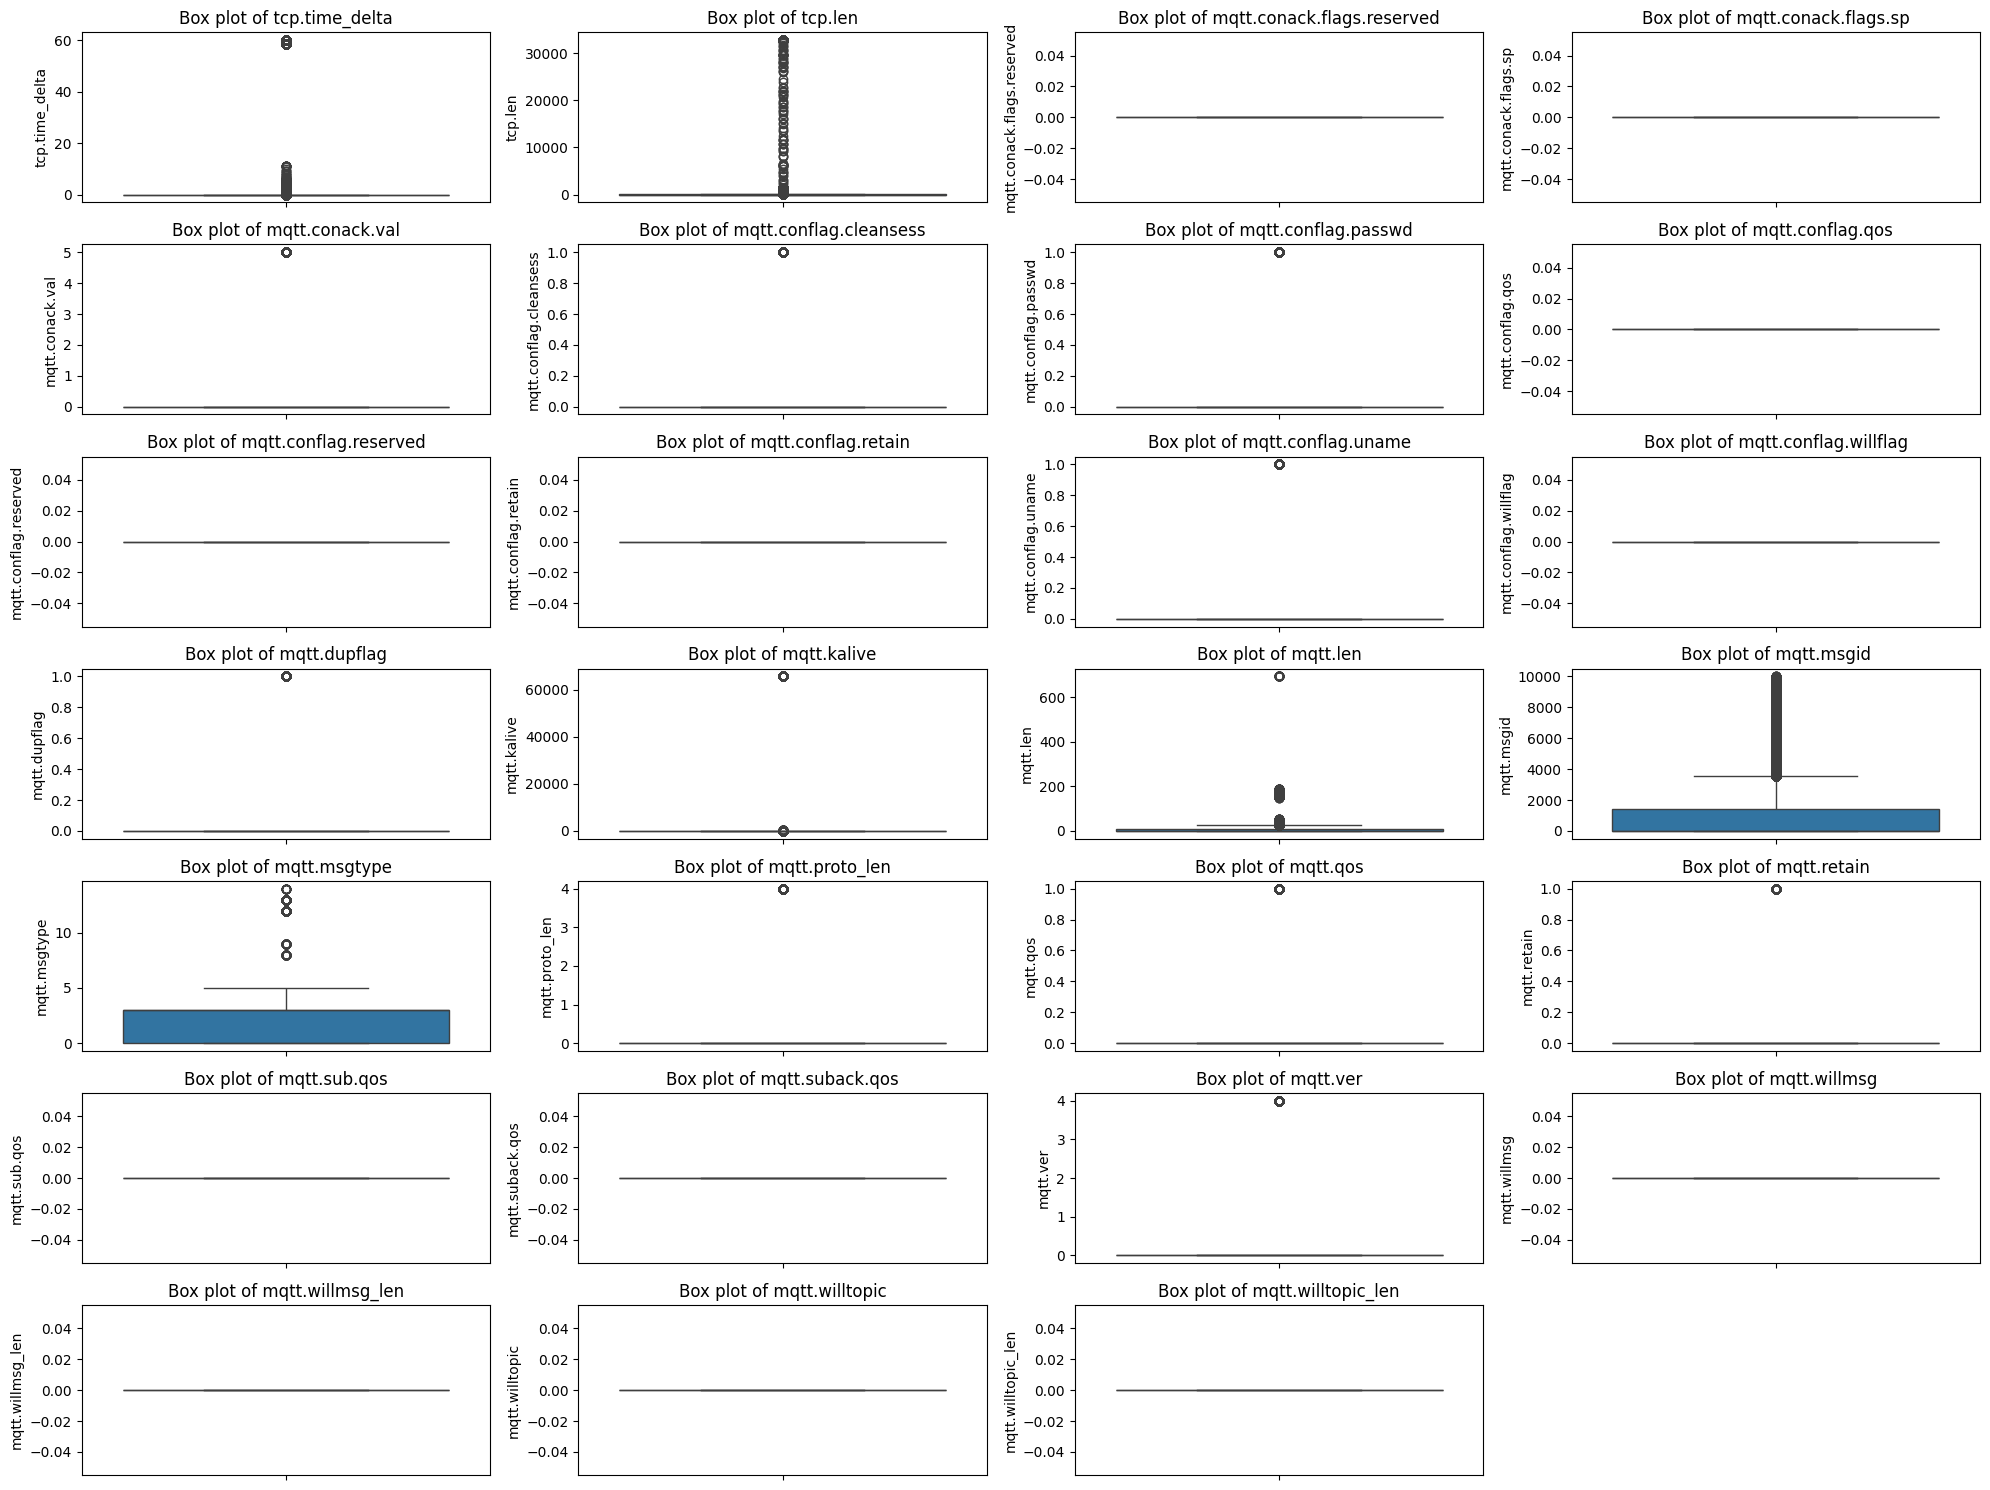

In [23]:
# Generating box plots for the numerical features to understand outliers
plt.figure(figsize=(20, 15))

# Selecting numerical columns
numerical_columns = data_MQTT.select_dtypes(include=['float64', 'int64']).columns

# Plotting box plots for each numerical feature
for i, column in enumerate(numerical_columns):
    plt.subplot(7, 4, i + 1)
    sns.boxplot(data=data_MQTT[column])
    plt.title(f'Box plot of {column}')
    plt.tight_layout()

plt.show()



### Interpreting Box Plots

A box plot (or box-and-whisker plot) displays the distribution of a dataset based on a five-number summary:
1. Minimum (Q1 - 1.5 * IQR)
2. First Quartile (Q1)
3. Median (Q2)
4. Third Quartile (Q3)
5. Maximum (Q3 + 1.5 * IQR)
6. Outliers (individual points outside the whiskers)

### Key Observations from the Box Plots

1. **tcp.time_delta**
   - The plot shows a few extreme outliers far above the rest of the data.
   - Indicates high variability in packet arrival times with some packets having significantly higher time deltas.

2. **tcp.len**
   - The plot shows many outliers above the upper whisker.
   - This suggests that while most packet lengths are within a certain range, there are several significantly larger packets.

3. **mqtt.conack.val**
   - One outlier present.
   - Indicates that the majority of connection acknowledgment values are consistent, but there is an unusual value.

4. **mqtt.conack.flags.reserved & mqtt.conack.flags.sp**
   - No visible outliers.
   - Indicates consistent values with no significant deviation from the norm.

5. **mqtt.conflag.cleansess**
   - One outlier present.
   - The clean session flag is mostly consistent, with one unusual value.

6. **mqtt.conflag.passwd**
   - One outlier present.
   - Indicates that the password flag is generally consistent, with one unusual value.

7. **mqtt.conflag.qos**
   - No visible outliers.
   - Indicates consistent QoS values in the CONNECT message.

8. **mqtt.conflag.retain**
   - No visible outliers.
   - Indicates consistent retain flag values in the CONNECT message.

9. **mqtt.conflag.uname**
   - No visible outliers.
   - Indicates consistent username flag values in the CONNECT message.

10. **mqtt.conflag.willflag**
    - No visible outliers.
    - Indicates consistent will flag values in the CONNECT message.

11. **mqtt.dupflag**
    - One outlier present.
    - The duplicate flag is generally consistent, with one unusual value.

12. **mqtt.kalive**
    - One outlier present.
    - Indicates that the keep alive values are mostly consistent, with one unusual value.

13. **mqtt.len**
    - Several outliers present above the upper whisker.
    - Indicates that while most message lengths are within a certain range, there are several significantly larger messages.

14. **mqtt.msgid**
    - Numerous outliers present.
    - Indicates high variability in message IDs with many values significantly different from the rest.

15. **mqtt.msgtype**
    - Several outliers present.
    - Indicates that while most message types are within a certain range, there are some significantly different types.

16. **mqtt.proto_len**
    - One outlier present.
    - Indicates that protocol lengths are mostly consistent, with one unusual value.

17. **mqtt.qos**
    - No visible outliers.
    - Indicates consistent QoS values in the message.

18. **mqtt.retain**
    - No visible outliers.
    - Indicates consistent retain flag values in the message.

19. **mqtt.sub.qos & mqtt.suback.qos**
    - No visible outliers.
    - Indicates consistent QoS values in the SUBSCRIBE and SUBACK messages.

20. **mqtt.ver**
    - One outlier present.
    - Indicates that the protocol version is generally consistent, with one unusual value.

21. **mqtt.willmsg & mqtt.willmsg_len**
    - No visible outliers.
    - Indicates consistent Will message and Will message length values.

22. **mqtt.willtopic & mqtt.willtopic_len**
    - No visible outliers.
    - Indicates consistent Will topic and Will topic length values.



# Generating Dist plots for the numerical features to understand outliers

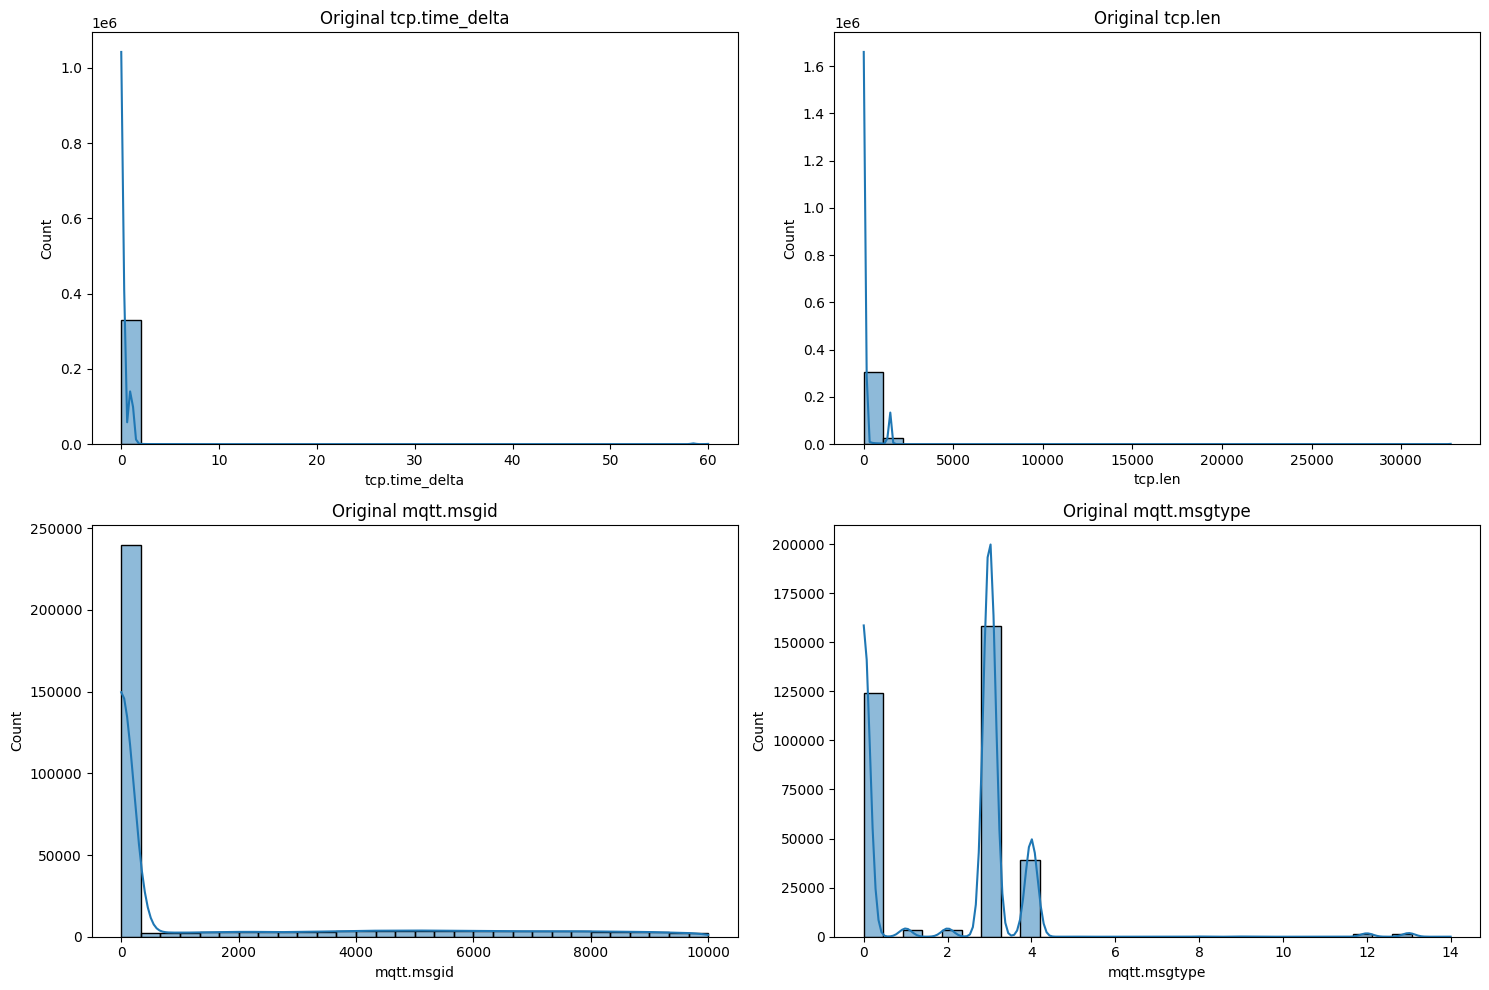

In [24]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Example numerical columns to plot
numerical_columns = ['tcp.time_delta', 'tcp.len', 'mqtt.msgid', 'mqtt.msgtype']

# Plot the distributions of the original data
plt.figure(figsize=(15, 10))

for i, column in enumerate(numerical_columns, 1):
    plt.subplot(2, 2, i)
    sns.histplot(data_MQTT[column], kde=True, bins=30)
    plt.title(f'Original {column}')

plt.tight_layout()
plt.show()


# Handling outliers



### Steps:

1. **Calculate IQR:**
    - The IQR (Interquartile Range) is calculated as the difference between the 75th percentile (Q3) and the 25th percentile (Q1).

2. **Determine Boundaries:**
    - Outliers are defined as values below \(Q1 - 1.5 * IQR \) or above \( Q3 + 1.5 * IQR \).

3. **Cap Outliers:**
    - Replace values below the lower bound with the lower bound.
    - Replace values above the upper bound with the upper bound.



In [25]:

# Example numerical columns to plot
numerical_columns = ['tcp.time_delta', 'tcp.len', 'mqtt.msgid', 'mqtt.msgtype']

# Calculate IQR for each numerical column
Q1 = data_MQTT[numerical_columns].quantile(0.25)
Q3 = data_MQTT[numerical_columns].quantile(0.75)
IQR = Q3 - Q1

# Identify boundaries for capping
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Print boundaries
print("Lower Bound:\n", lower_bound)
print("Upper Bound:\n", upper_bound)


Lower Bound:
 tcp.time_delta      -0.000247
tcp.len            -21.000000
mqtt.msgid       -2142.000000
mqtt.msgtype        -4.500000
dtype: float64
Upper Bound:
 tcp.time_delta       0.000421
tcp.len             35.000000
mqtt.msgid        3570.000000
mqtt.msgtype         7.500000
dtype: float64


In [26]:
import numpy as np
# Cap outliers to the boundaries defined by Q1 - 1.5*IQR and Q3 + 1.5*IQR
data_MQTT_capped = data_MQTT.copy()
for col in numerical_columns:
    data_MQTT_capped[col] = np.where(data_MQTT[col] < lower_bound[col], lower_bound[col], data_MQTT[col])
    data_MQTT_capped[col] = np.where(data_MQTT[col] > upper_bound[col], upper_bound[col], data_MQTT[col])

print("Shape after capping outliers:", data_MQTT_capped.shape)


Shape after capping outliers: (330926, 34)


# Generating Dist plots for  capped data .

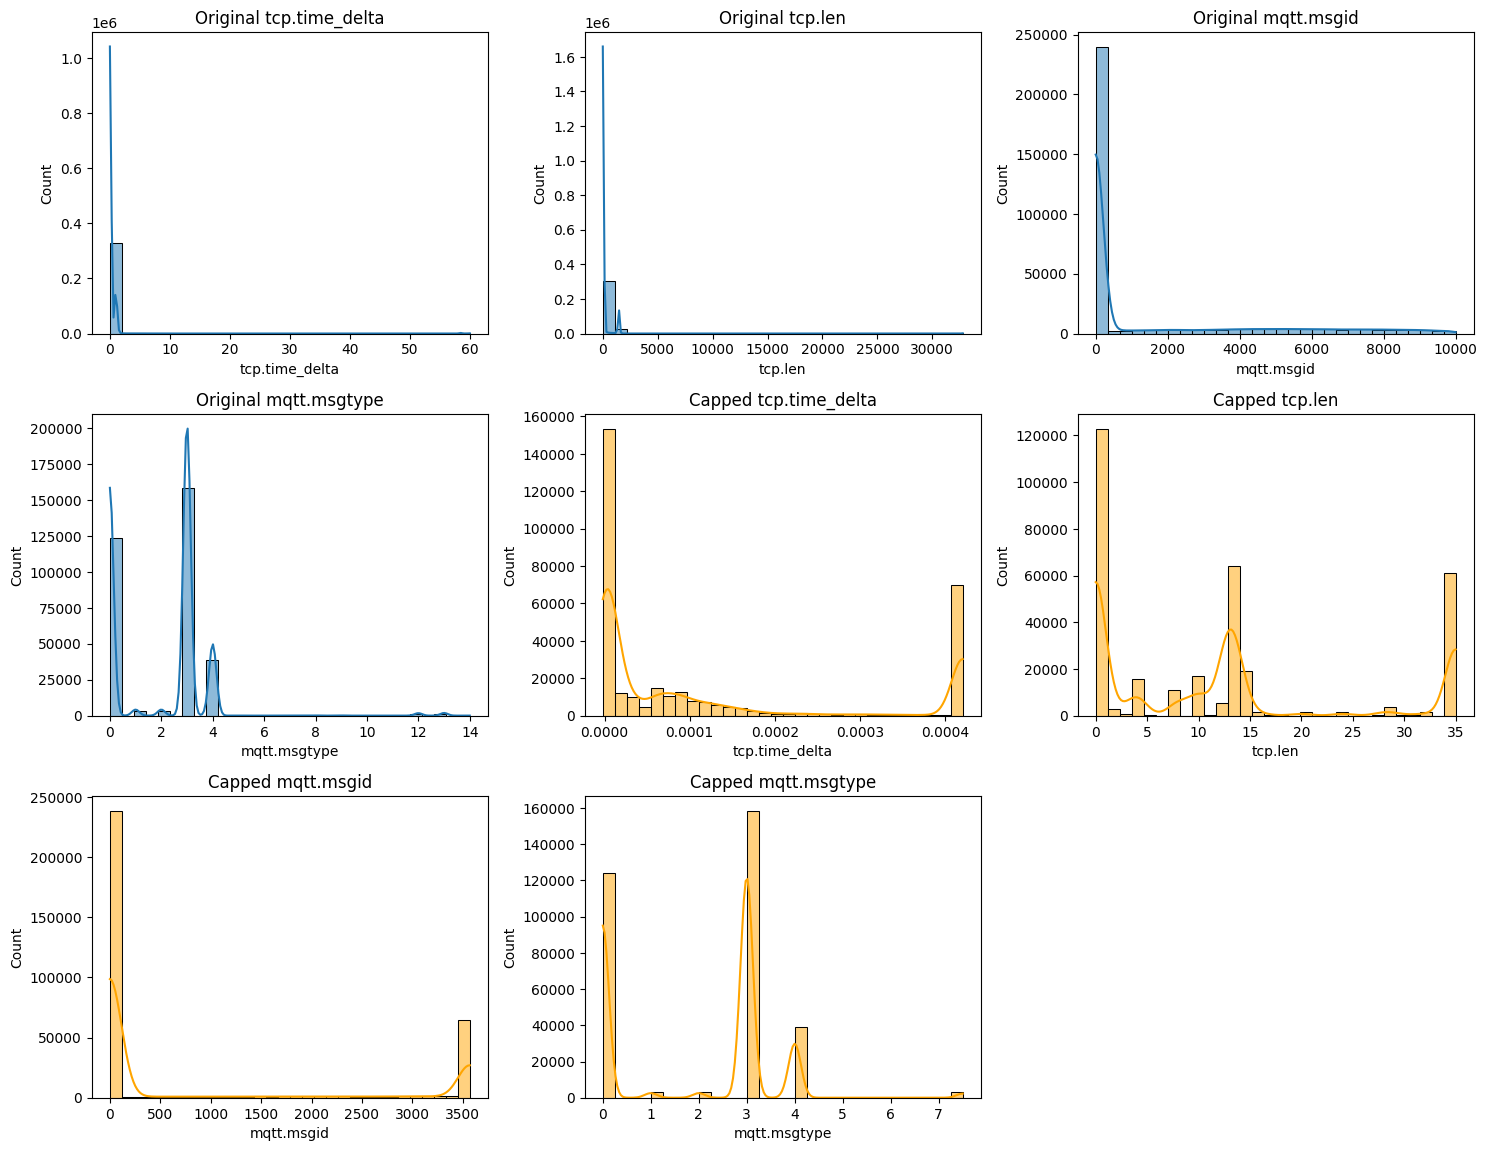

In [27]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot the distributions after handling outliers
plt.figure(figsize=(15, 15))

for i, column in enumerate(numerical_columns, 1):
    plt.subplot(4, 3, i)
    sns.histplot(data_MQTT[column], kde=True, bins=30)
    plt.title(f'Original {column}')

    plt.subplot(4, 3, i + 4)
    sns.histplot(data_MQTT_capped[column], kde=True, bins=30, color='orange')
    plt.title(f'Capped {column}')

plt.tight_layout()
plt.show()


# Standardization and Normalization


### Standardization

Standardization transforms the data to have a mean of 0 and a standard deviation of 1. This process is essential for algorithms that assume normally distributed data and require features to be on a similar scale.

### Steps:

1. **Calculate the mean and standard deviation for each feature in the dataset.**
2. **Transform the data using the formula:**
    \[
    \text{Standardized value} = \frac{\text{Original value} - \text{Mean}}{\text{Standard Deviation}}
    \]


### Normalization

Normalization scales the data to fit within the range [0, 1]. This process is useful for algorithms that require data to be within a specific range and for ensuring that all features contribute equally to the analysis.

### Steps:

1. **Identify the minimum and maximum values for each feature in the dataset.**
2. **Transform the data using the formula:**
    \[
    \text{Normalized value} = \frac{\text{Original value} - \text{Minimum}}{\text{Maximum} - \text{Minimum}}
    \]



In [28]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler

# Standardization
scaler_standard = StandardScaler()
data_MQTT_standardized = data_MQTT_capped.copy()
data_MQTT_standardized[numerical_columns] = scaler_standard.fit_transform(data_MQTT_capped[numerical_columns])

# Normalization
scaler_normal = MinMaxScaler()
data_MQTT_normalized = data_MQTT_capped.copy()
data_MQTT_normalized[numerical_columns] = scaler_normal.fit_transform(data_MQTT_capped[numerical_columns])


# Generate Summary Statistics
 generate summary statistics to understand the central tendency and dispersion of the standardized and normalized data.

In [29]:
# Generate summary statistics
summary_stats_normalized = data_MQTT_normalized.describe()


# Display the summary statistics
summary_stats_normalized


,tcp.time_delta,tcp.len,mqtt.conack.flags.reserved,mqtt.conack.flags.sp,mqtt.conack.val,mqtt.conflag.cleansess,mqtt.conflag.passwd,mqtt.conflag.qos,mqtt.conflag.reserved,mqtt.conflag.retain,...,mqtt.proto_len,mqtt.qos,mqtt.retain,mqtt.sub.qos,mqtt.suback.qos,mqtt.ver,mqtt.willmsg,mqtt.willmsg_len,mqtt.willtopic,mqtt.willtopic_len
count,330926.000000,330926.000000,330926.0,330926.0,330926.000000,330926.000000,330926.000000,330926.0,330926.0,330926.0,...,330926.000000,330926.000000,330926.000000,330926.0,330926.0,330926.000000,330926.0,330926.0,330926.0,330926.0
mean,0.294175,0.336289,0.0,0.0,0.021576,0.009918,0.004297,0.0,0.0,0.0,...,0.039671,0.164481,0.000366,0.0,0.0,0.039671,0.0,0.0,0.0,0.0
std,0.390335,0.364364,0.0,0.0,0.327741,0.099092,0.065411,0.0,0.0,0.0,...,0.396369,0.370712,0.019118,0.0,0.0,0.396369,0.0,0.0,0.0,0.0
min,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0
25%,0.011834,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0
50%,0.066272,0.285714,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0
75%,0.407101,0.400000,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0
max,1.000000,1.000000,0.0,0.0,5.000000,1.000000,1.000000,0.0,0.0,0.0,...,4.000000,1.000000,1.000000,0.0,0.0,4.000000,0.0,0.0,0.0,0.0


In [30]:
# Generate summary statistics for standardized data
summary_stats_standardized = data_MQTT_standardized.describe()
summary_stats_standardized

,tcp.time_delta,tcp.len,mqtt.conack.flags.reserved,mqtt.conack.flags.sp,mqtt.conack.val,mqtt.conflag.cleansess,mqtt.conflag.passwd,mqtt.conflag.qos,mqtt.conflag.reserved,mqtt.conflag.retain,...,mqtt.proto_len,mqtt.qos,mqtt.retain,mqtt.sub.qos,mqtt.suback.qos,mqtt.ver,mqtt.willmsg,mqtt.willmsg_len,mqtt.willtopic,mqtt.willtopic_len
count,3.309260e+05,3.309260e+05,330926.0,330926.0,330926.000000,330926.000000,330926.000000,330926.0,330926.0,330926.0,...,330926.000000,330926.000000,330926.000000,330926.0,330926.0,330926.000000,330926.0,330926.0,330926.0,330926.0
mean,-4.423098e-17,-1.404226e-17,0.0,0.0,0.021576,0.009918,0.004297,0.0,0.0,0.0,...,0.039671,0.164481,0.000366,0.0,0.0,0.039671,0.0,0.0,0.0,0.0
std,1.000002e+00,1.000002e+00,0.0,0.0,0.327741,0.099092,0.065411,0.0,0.0,0.0,...,0.396369,0.370712,0.019118,0.0,0.0,0.396369,0.0,0.0,0.0,0.0
min,-7.536476e-01,-9.229489e-01,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0
25%,-7.233292e-01,-9.229489e-01,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0
50%,-5.838645e-01,-1.388020e-01,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0
75%,2.893059e-01,1.748567e-01,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0
max,1.808259e+00,1.821565e+00,0.0,0.0,5.000000,1.000000,1.000000,0.0,0.0,0.0,...,4.000000,1.000000,1.000000,0.0,0.0,4.000000,0.0,0.0,0.0,0.0


# Visualization of Preprocessed Data (Capped,Normalized,standardized and normalized data )

visualize the distributions of the original, capped, standardized, and normalized data using box plots.

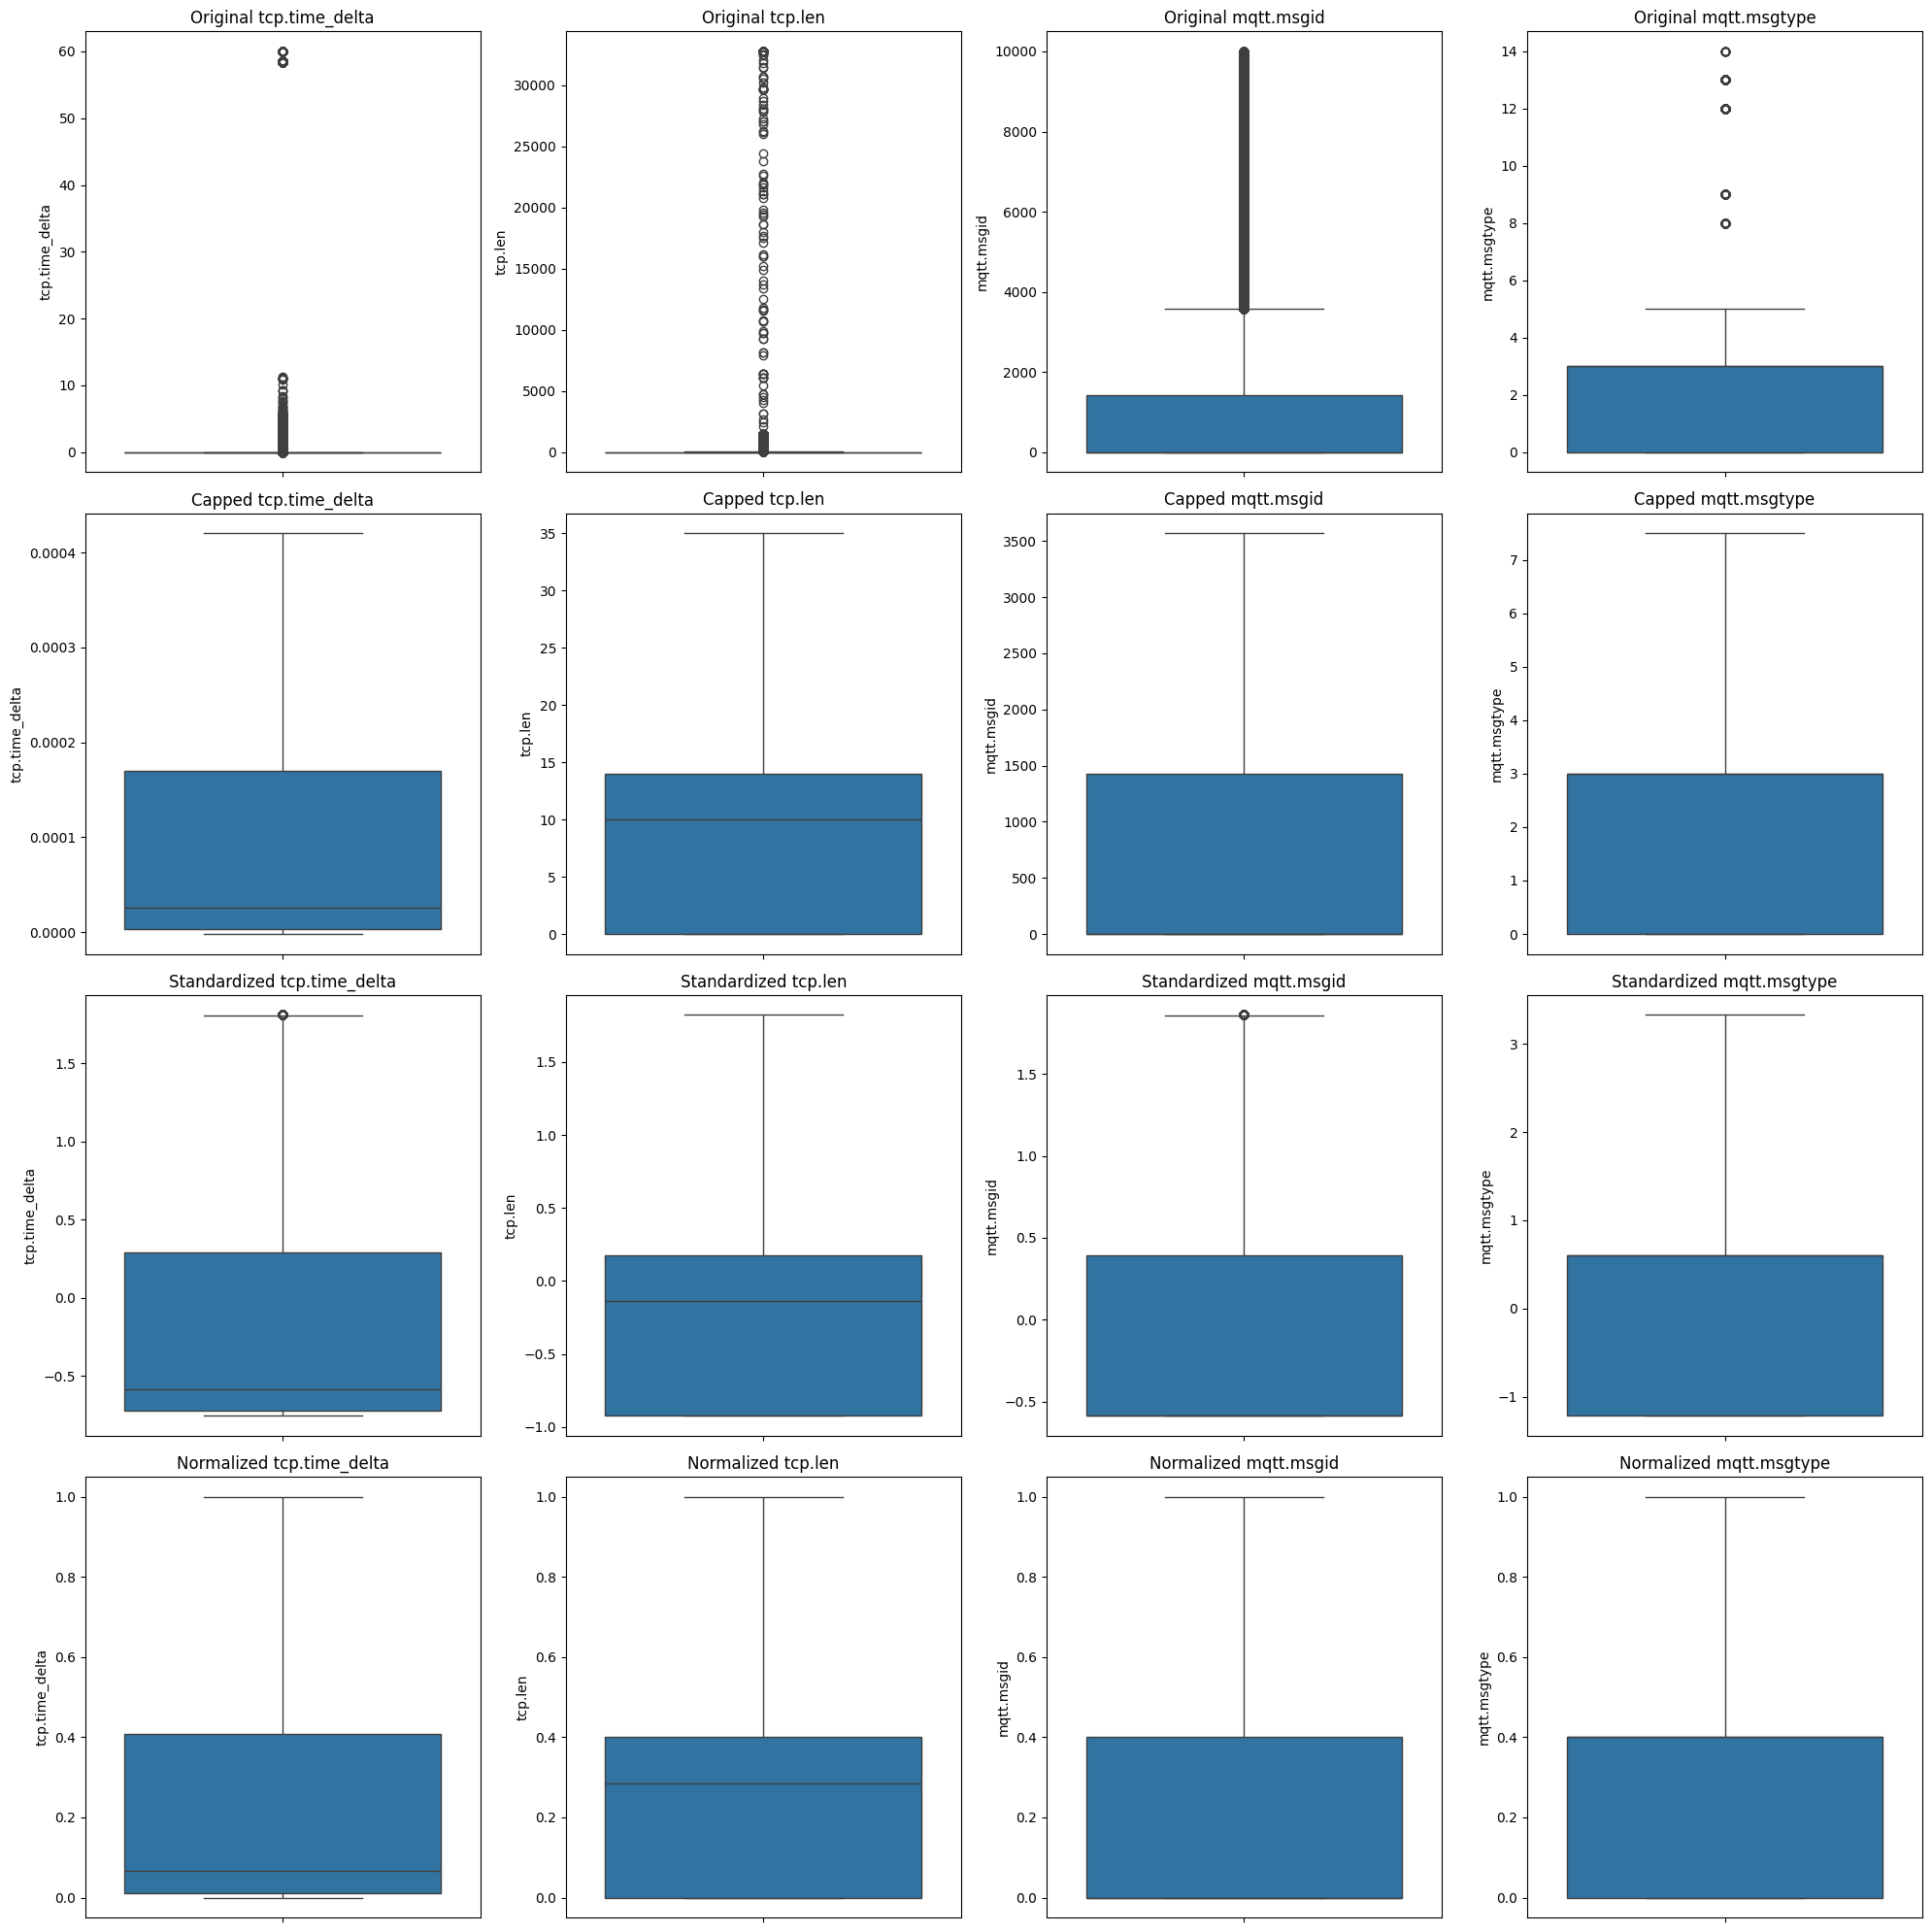

In [31]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot the box plots after handling outliers
plt.figure(figsize=(20, 20))

for i, column in enumerate(numerical_columns, 1):
    plt.subplot(4, 4, i)
    sns.boxplot(data_MQTT[column])
    plt.title(f'Original {column}')

    plt.subplot(4, 4, i + 4)
    sns.boxplot(data_MQTT_capped[column])
    plt.title(f'Capped {column}')

    plt.subplot(4, 4, i + 8)
    sns.boxplot(data_MQTT_standardized[column])
    plt.title(f'Standardized {column}')

    plt.subplot(4, 4, i + 12)
    sns.boxplot(data_MQTT_normalized[column])
    plt.title(f'Normalized {column}')

plt.tight_layout()
plt.show()


visualize the distributions of the original, capped, standardized, and normalized data using distribution plots.

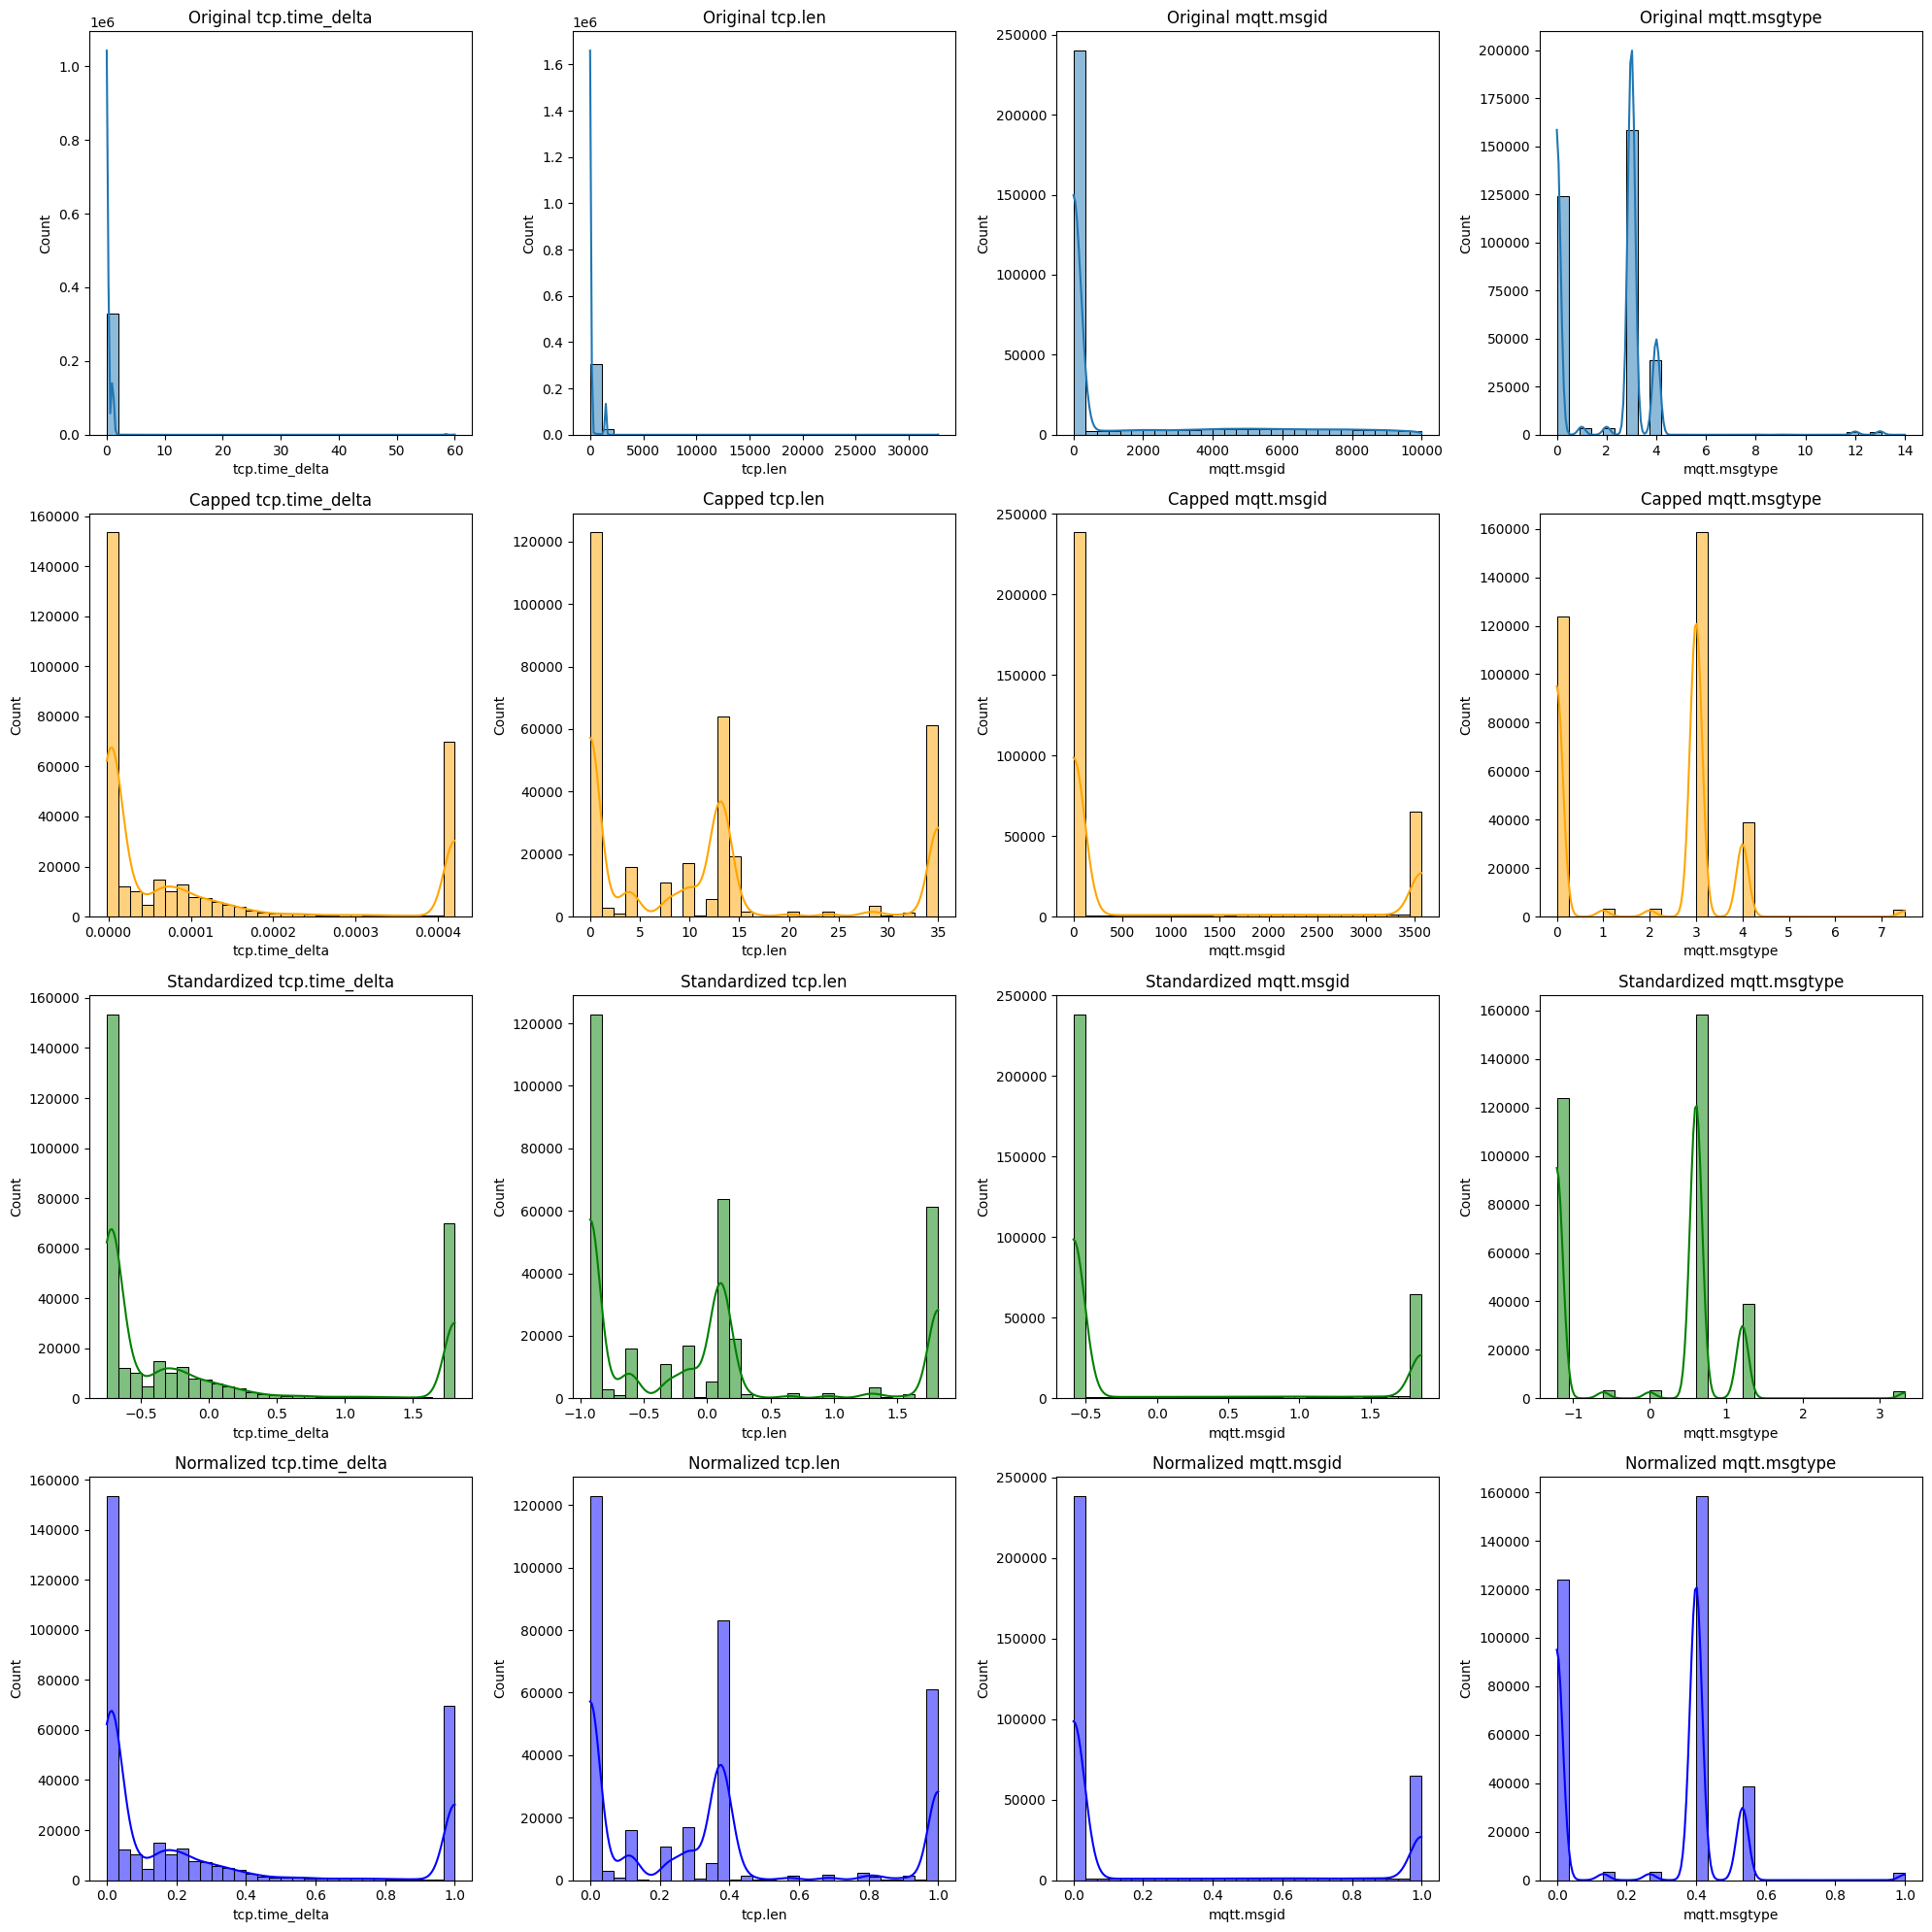

In [32]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot the distributions after handling outliers, standardization, and normalization
plt.figure(figsize=(20, 20))

for i, column in enumerate(numerical_columns, 1):
    plt.subplot(4, 4, i)
    sns.histplot(data_MQTT[column], kde=True, bins=30)
    plt.title(f'Original {column}')

    plt.subplot(4, 4, i + 4)
    sns.histplot(data_MQTT_capped[column], kde=True, bins=30, color='orange')
    plt.title(f'Capped {column}')

    plt.subplot(4, 4, i + 8)
    sns.histplot(data_MQTT_standardized[column], kde=True, bins=30, color='green')
    plt.title(f'Standardized {column}')

    plt.subplot(4, 4, i + 12)
    sns.histplot(data_MQTT_normalized[column], kde=True, bins=30, color='blue')
    plt.title(f'Normalized {column}')

plt.tight_layout()
plt.show()


# Visualizing the distribution of target variable

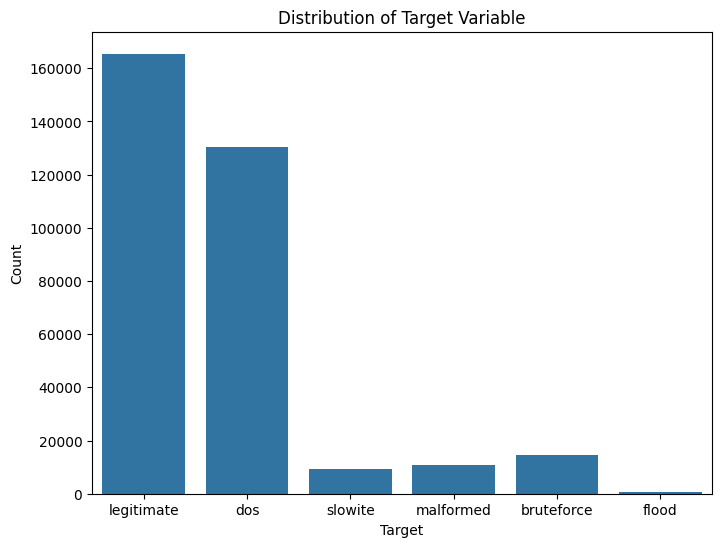

Value Counts for Target Variable:
target
legitimate    165463
dos           130223
bruteforce     14501
malformed      10924
slowite         9202
flood            613
Name: count, dtype: int64


In [33]:
import matplotlib.pyplot as plt
import seaborn as sns

# Visualize the distribution of the target variable
plt.figure(figsize=(8, 6))
sns.countplot(x='target', data=data_MQTT)
plt.title('Distribution of Target Variable')
plt.xlabel('Target')
plt.ylabel('Count')
plt.show()

# Display value counts for the target variable
print("Value Counts for Target Variable:")
print(data_MQTT['target'].value_counts())

## Exploratory Data Analysis (EDA)

## Univariate analysis

## Univariate Analysis for Categorical Variables

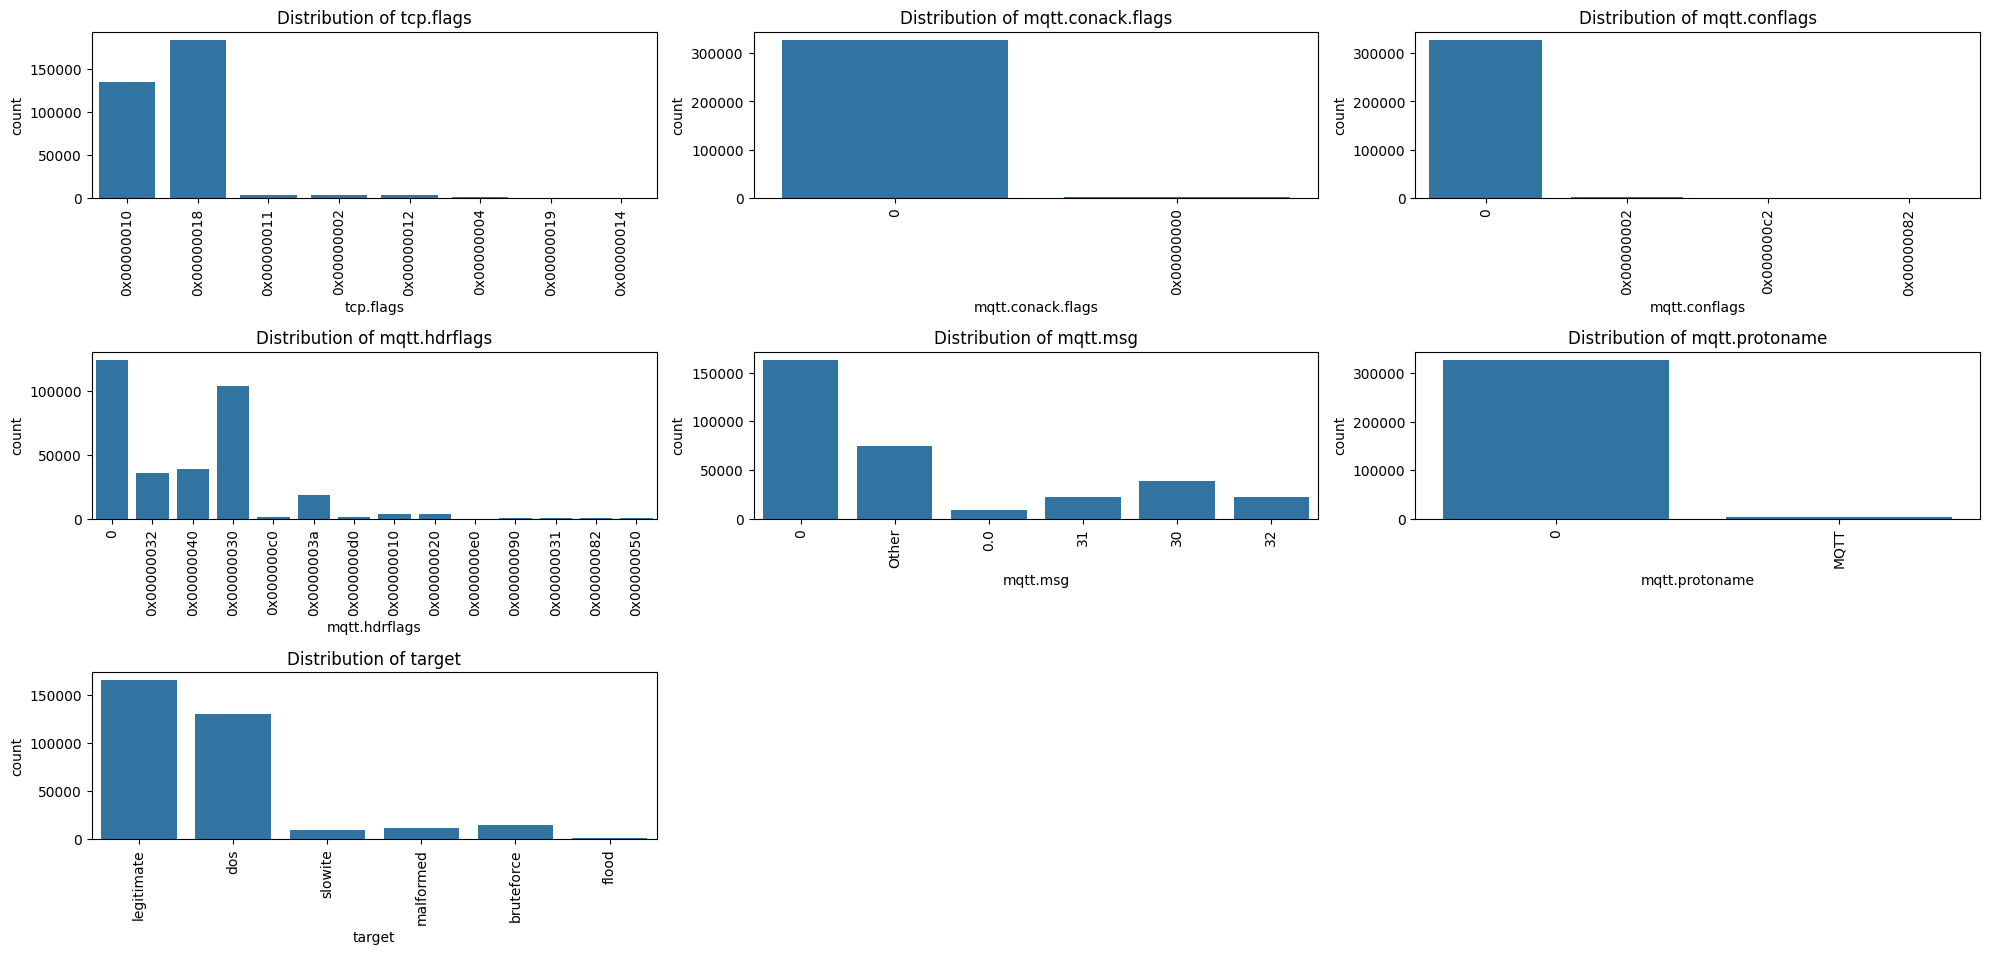

In [34]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns



# Identify categorical columns
categorical_columns = data_MQTT_capped.select_dtypes(include=['object']).columns

# Function to aggregate less frequent categories
def aggregate_categories(column, threshold=0.01):
    value_counts = column.value_counts(normalize=True)
    to_replace = value_counts[value_counts < threshold].index
    return column.apply(lambda x: 'Other' if x in to_replace else x)

# Apply the function to the 'mqtt.msg' column
data_MQTT['mqtt.msg'] = aggregate_categories(data_MQTT['mqtt.msg'])

# Plot the distribution of categorical variables again
plt.figure(figsize=(20, 15))
for i, column in enumerate(categorical_columns, 1):
    plt.subplot(5, 3, i)
    sns.countplot(x=column, data=data_MQTT)
    plt.title(f'Distribution of {column}')
    plt.xticks(rotation=90)
plt.tight_layout()
plt.show()


### Interpretation of Univariate Analysis for Categorical Variables

Based on the provided visualizations, here is the interpretation of the categorical variables:

1. **tcp.flags**:
   - The values are predominantly `0x00000010` and `0x00000018`.
   - Other values occur much less frequently, indicating that these two flags are the most common.

2. **mqtt.conack.flags**:
   - The values are almost exclusively `0`, indicating that this flag is not set in most cases.
   - There are a few occurrences of the value `1`, but they are very rare.

3. **mqtt.conflags**:
   - Similar to `mqtt.conack.flags`, this variable is almost always `0`.
   - The other values are rare, suggesting limited variability in the connection flags.

4. **mqtt.hdrflags**:
   - The values `0x00000032`, `0x00000040`, and `0x00000020` are the most common.
   - Other values occur less frequently, but there is some variability in header flags.

5. **mqtt.msg**:
   - The value `0` is the most common.
   - There are also significant occurrences of `31`, `30`, and `32`.
   - The "Other" category groups together many less frequent values.

6. **mqtt.protoname**:
   - This variable is dominated by the value `0`.
   - The value `MQTT` occurs very infrequently, indicating that the protocol name is typically not specified.

7. **target**:
   - The target variable shows a noticeable imbalance.
   - The most common targets are `1` and `2`, followed by `0`, `3`, `4`, and `5`.
   - This indicates an uneven distribution of different types of attacks or categories in the dataset.

### Summary of Insights for Categorical Variables

- **Imbalance**: Many categorical variables are highly imbalanced, with certain values occurring much more frequently than others.
- **Low Variability**: Some categorical variables, such as `mqtt.conack.flags`, `mqtt.conflags`, and `mqtt.protoname`, have very low variability, suggesting they might not provide much useful information.
- **Important Categories**: Variables like `tcp.flags`, `mqtt.hdrflags`, and `mqtt.msg` show more variability and might contain useful information for distinguishing different classes in the target variable.


# Univariate Analysis for Numerical Variables

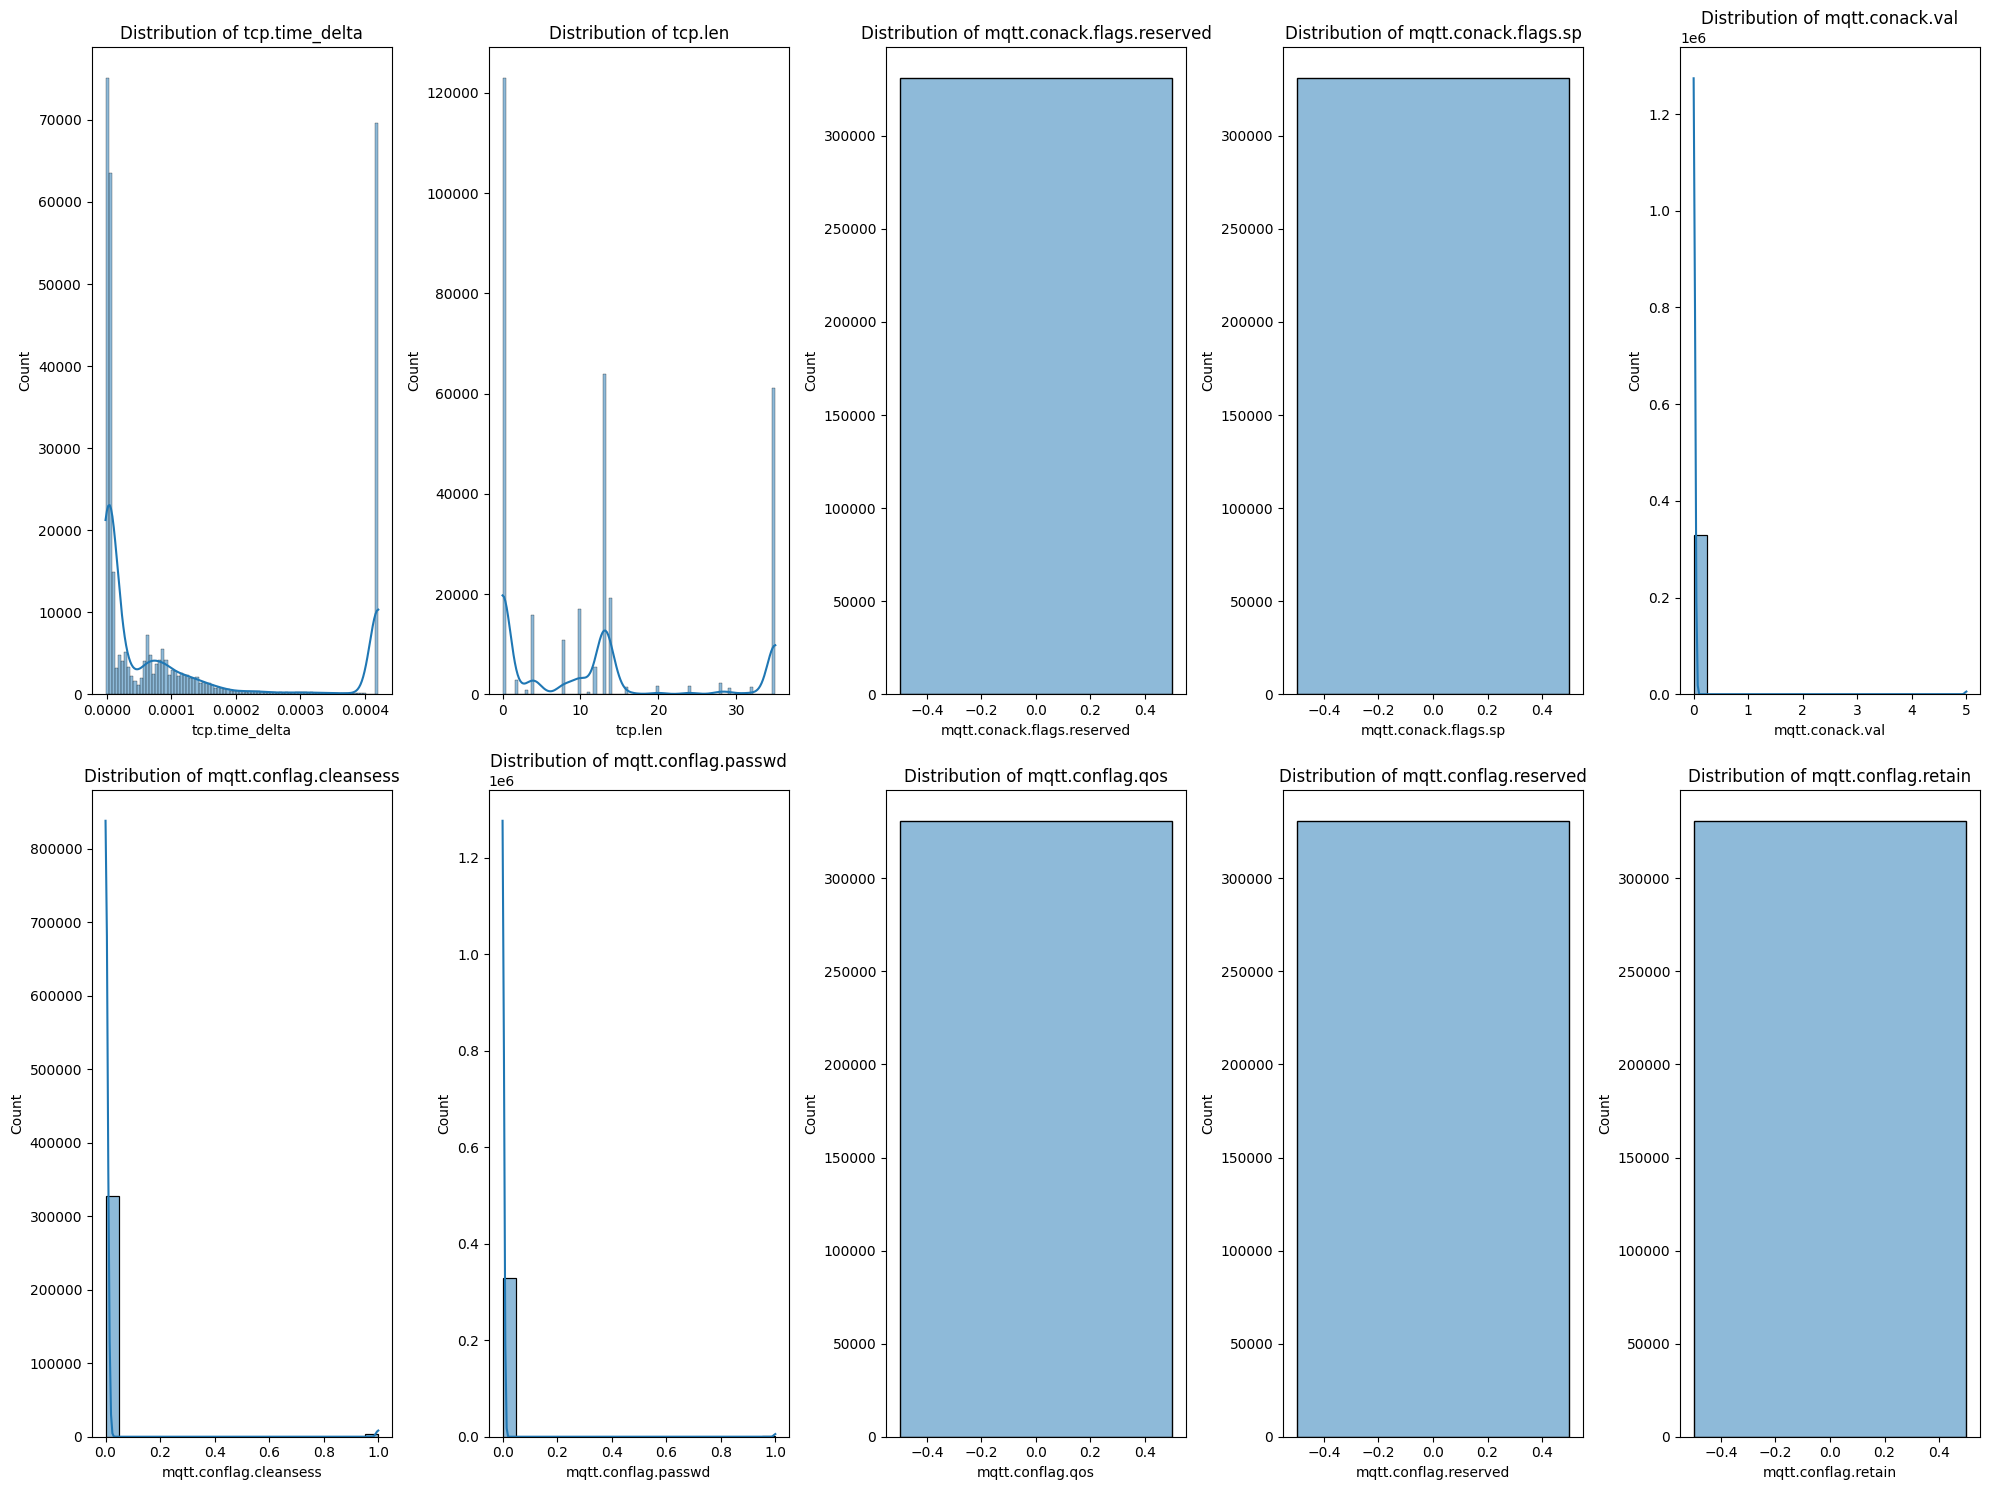

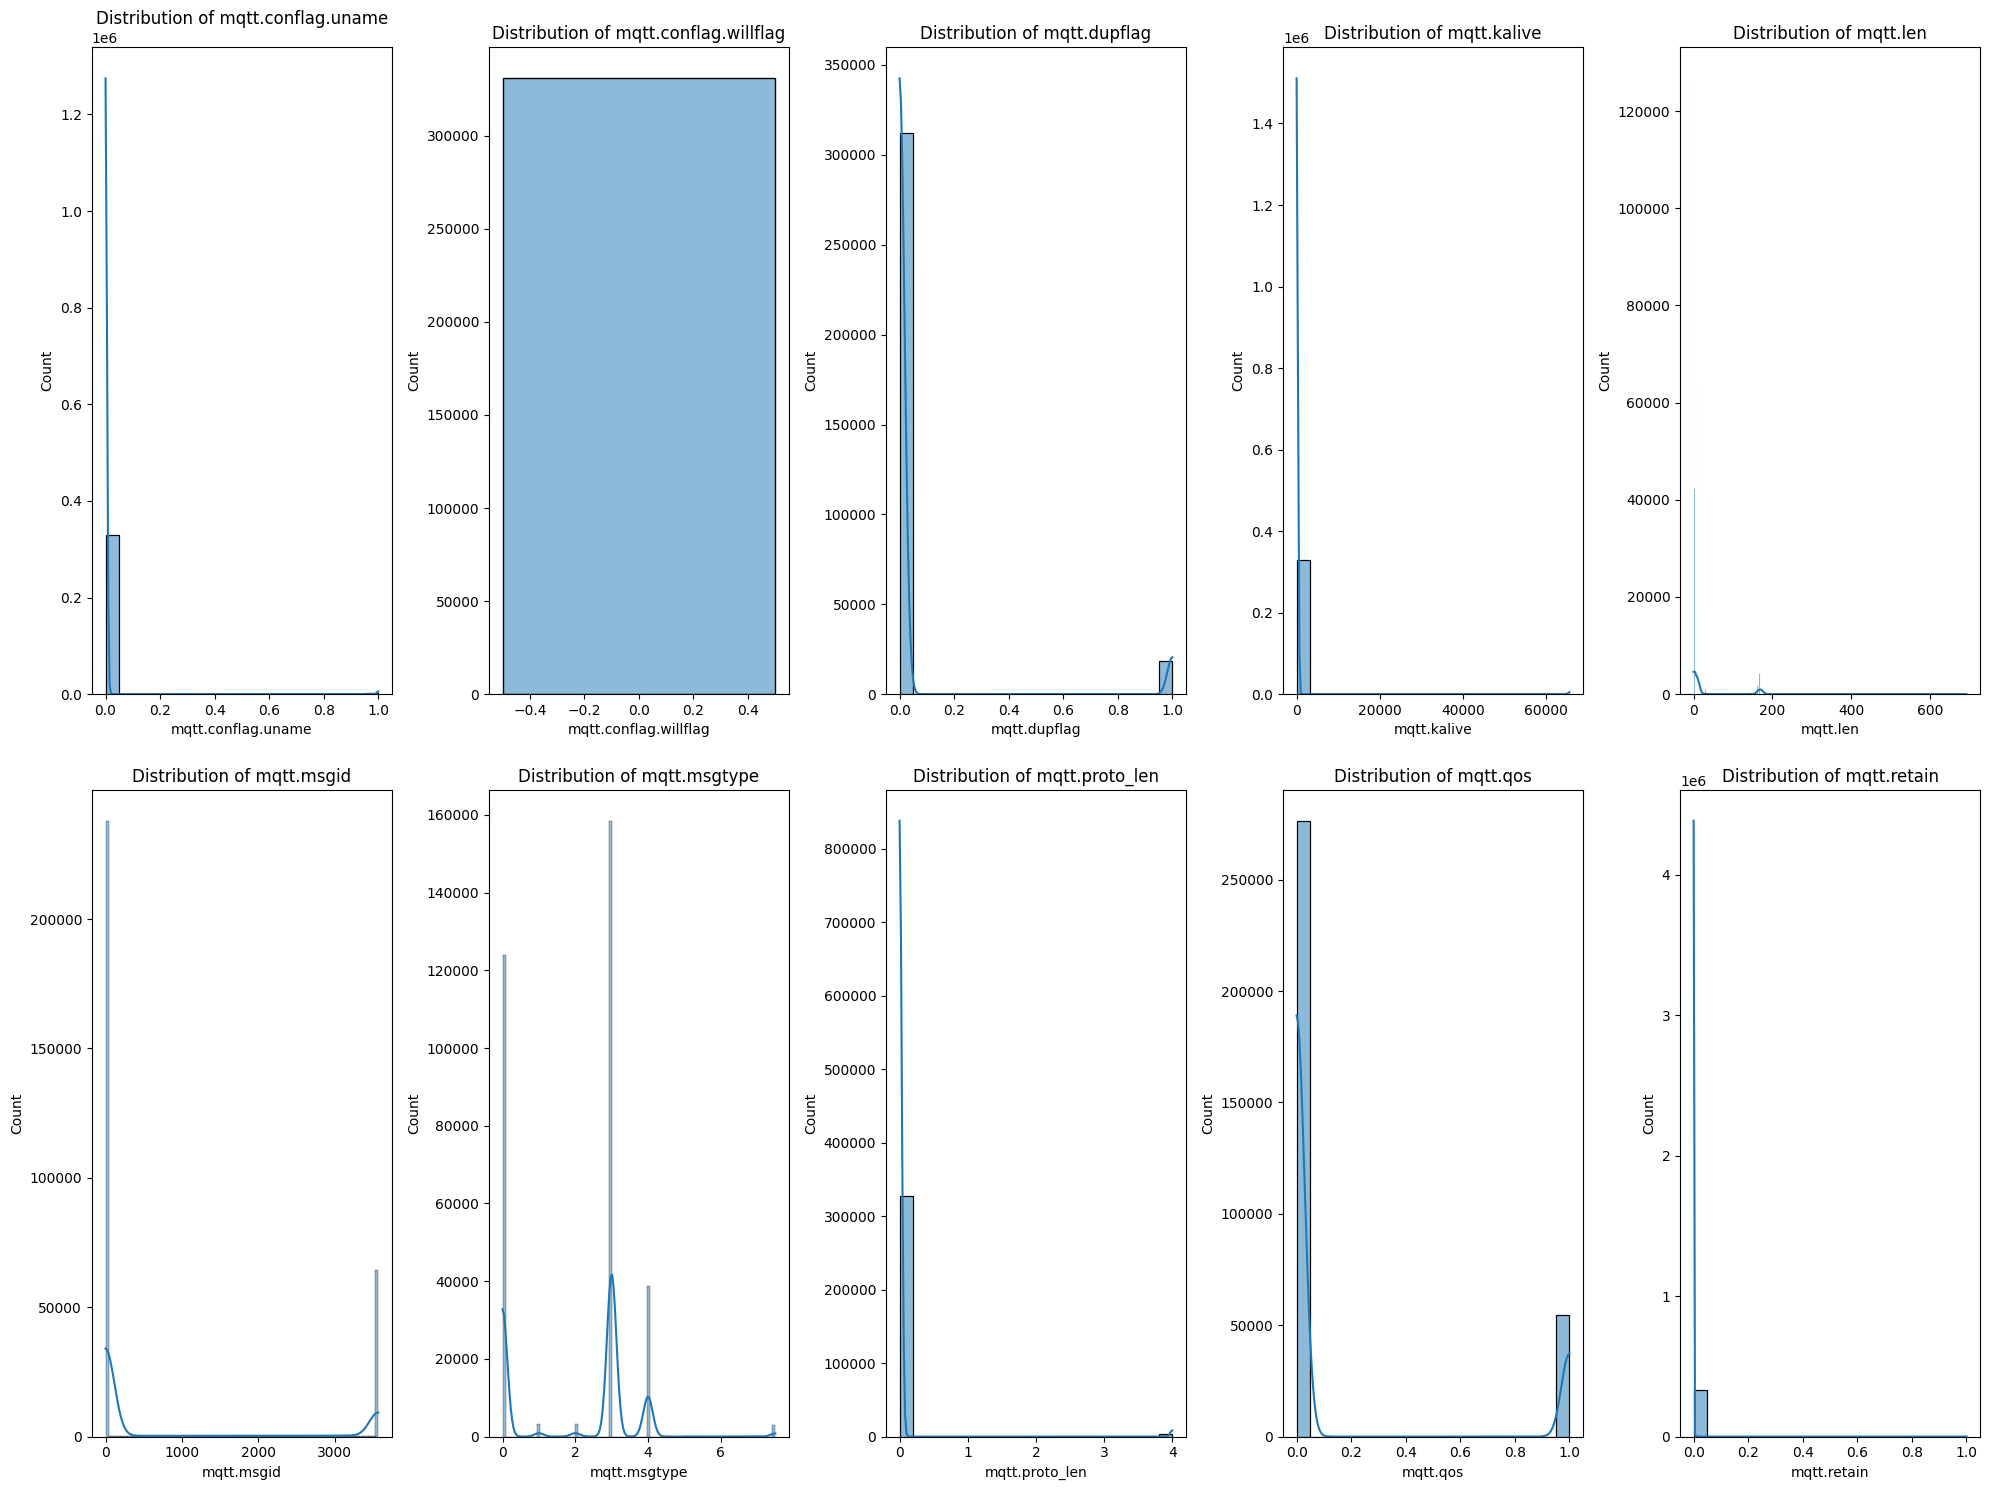

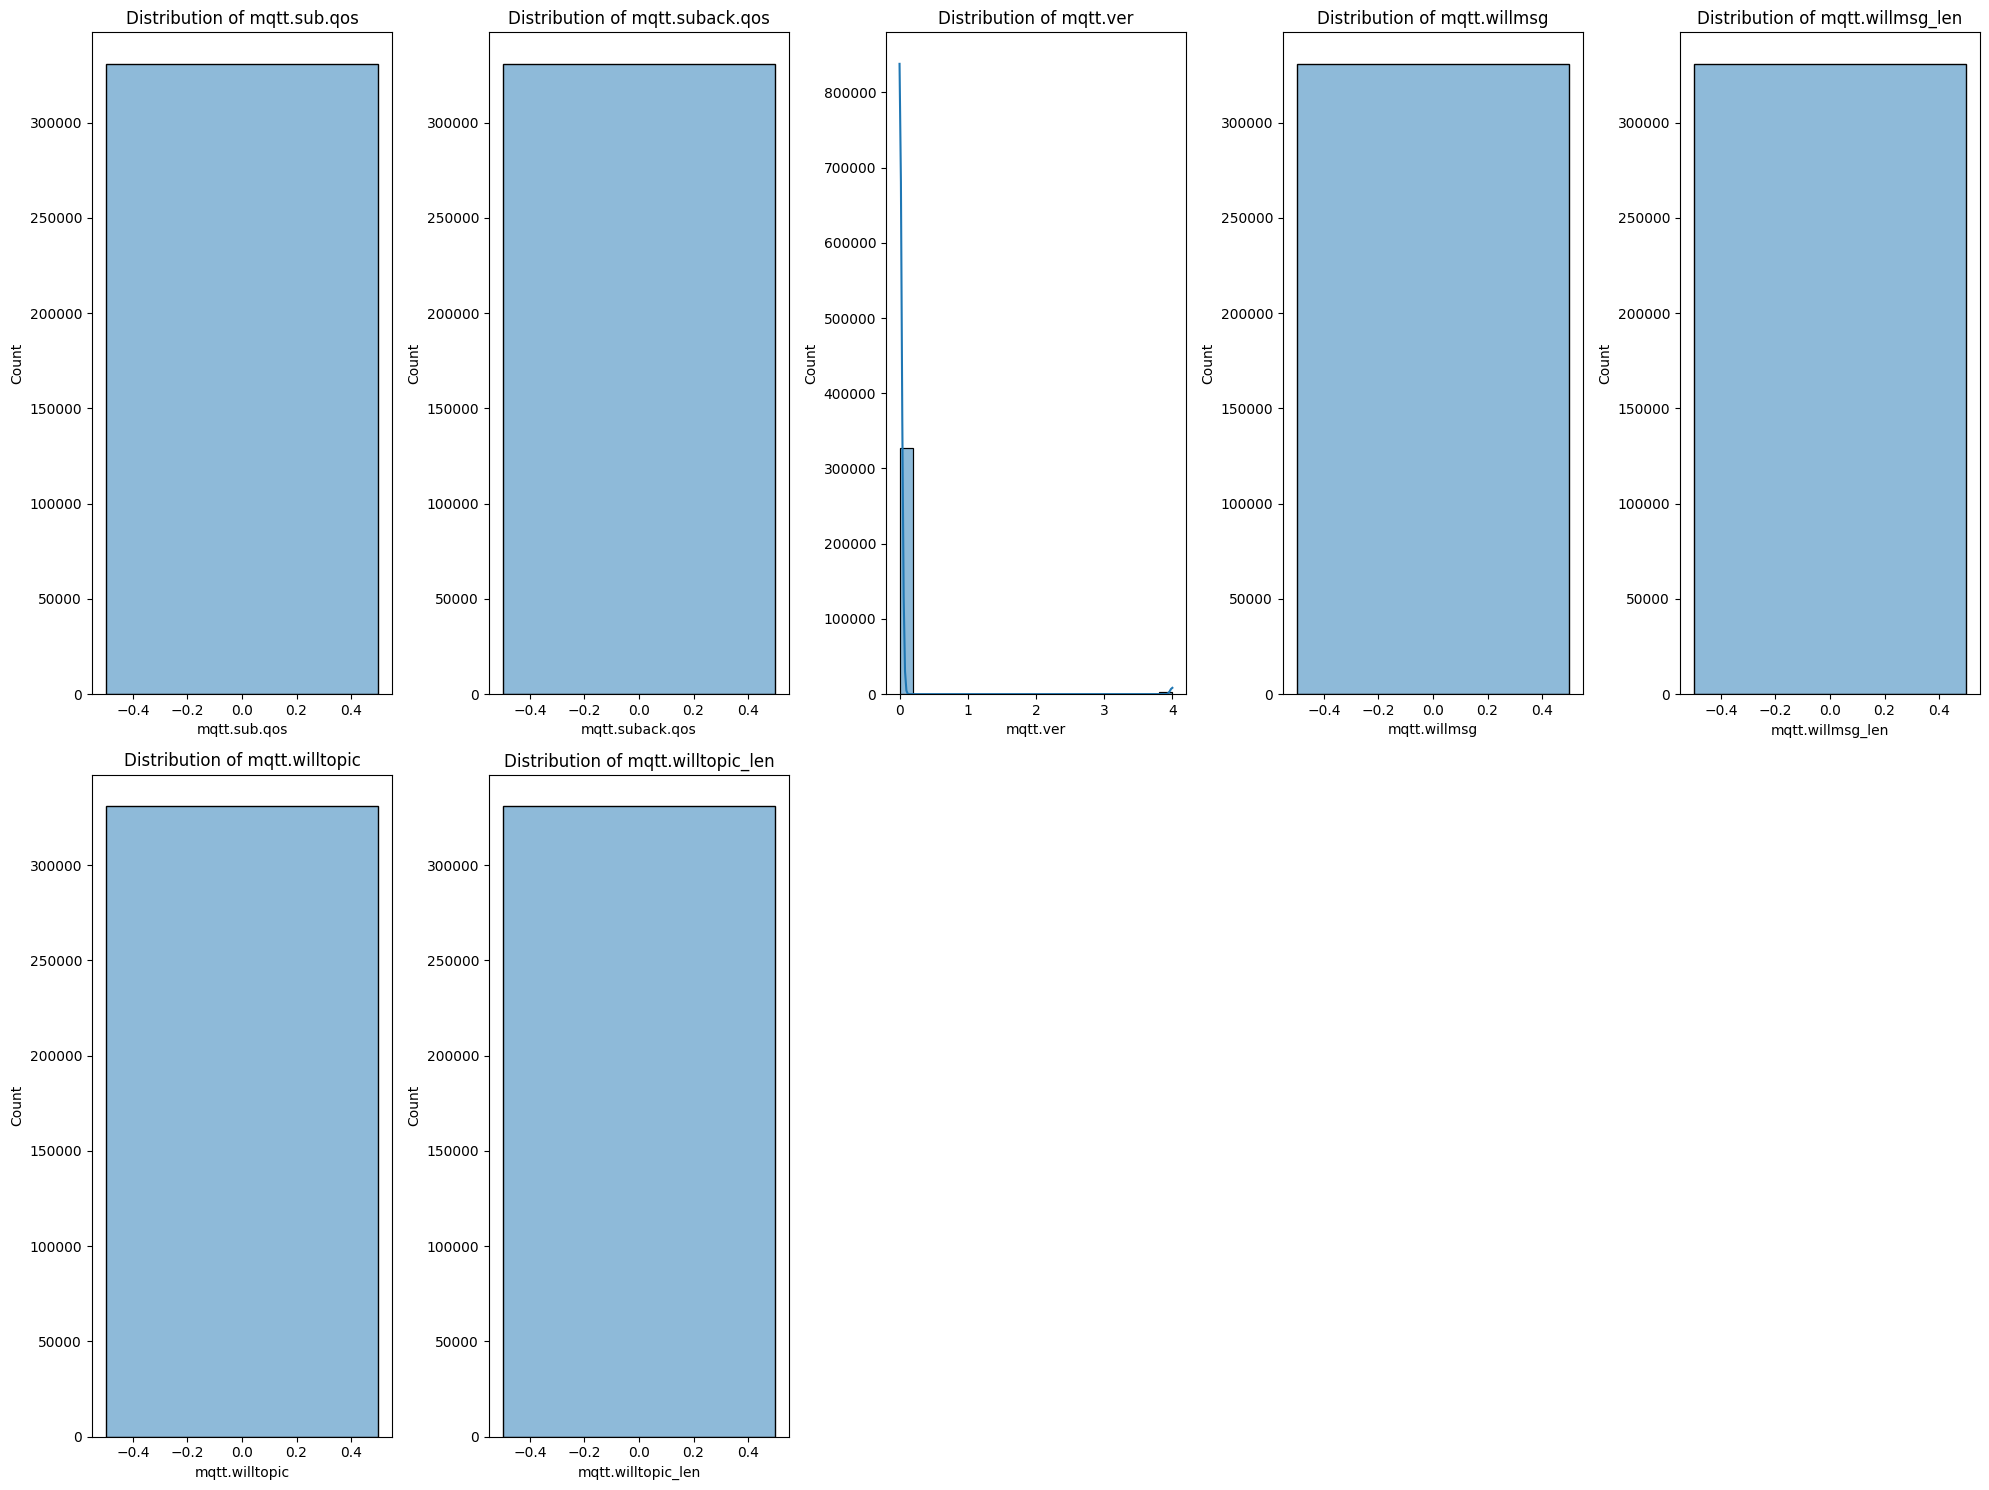

In [35]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Identify numerical columns
numerical_columns = data_MQTT_capped.select_dtypes(include=['number']).columns

# Set the number of subplots per figure
subplots_per_fig = 10

# Plot distribution of numerical variables
num_plots = len(numerical_columns)
num_figures = (num_plots + subplots_per_fig - 1) // subplots_per_fig

for fig_num in range(num_figures):
    plt.figure(figsize=(20, 15))
    start_idx = fig_num * subplots_per_fig
    end_idx = min(start_idx + subplots_per_fig, num_plots)
    for i, column in enumerate(numerical_columns[start_idx:end_idx], 1):
        plt.subplot((end_idx - start_idx + 4) // 5, 5, i)
        sns.histplot(data_MQTT_capped[column], kde=True)
        plt.title(f'Distribution of {column}')
    plt.tight_layout()
    plt.show()



### Interpretation of Univariate Analysis for Numerical Variables

1. **tcp.time_delta**:
   - The distribution is highly skewed to the right with most values close to zero. 
   - There are a few outliers with larger values, indicating significant delays between TCP packets.

2. **tcp.len**:
   - This variable shows multiple peaks, suggesting various common packet sizes in the dataset.
   - The distribution is not smooth, indicating distinct groups of packet sizes.

3. **mqtt.conack.flags.reserved**:
   - All values are zero, indicating this flag is not used and can be considered for removal from the dataset.

4. **mqtt.conack.flags.sp**:
   - All values are zero, similar to the previous flag, indicating it is not used.

5. **mqtt.conack.val**:
   - The distribution is highly skewed, with most values being zero.
   - A few non-zero values are present, but they are rare.

6. **mqtt.conflag.cleansess**:
   - The majority of values are zero, with a few occurrences of one, indicating whether a clean session is requested.

7. **mqtt.conflag.passwd**:
   - Most values are zero, indicating that the password flag is rarely used.

8. **mqtt.conflag.qos**:
   - All values are zero, indicating that this flag is not used and can be removed.

9. **mqtt.conflag.reserved**:
   - Similar to the other flags, all values are zero.

10. **mqtt.conflag.retain**:
    - The majority of values are zero, with a few occurrences of one, indicating whether messages should be retained.

11. **mqtt.conflag.uname**:
    - Most values are zero, indicating that the username flag is rarely used.

12. **mqtt.conflag.willflag**:
    - All values are zero, indicating this flag is not used.

13. **mqtt.dupflag**:
    - The majority of values are zero, with a few occurrences of one, indicating duplicate delivery of packets.

14. **mqtt.kalive**:
    - Most values are close to zero, with a few outliers indicating higher keep-alive intervals.

15. **mqtt.len**:
    - The distribution is highly skewed, with most values being zero and a few outliers.

16. **mqtt.msgid**:
    - Most values are close to zero, with a few high values indicating message IDs.

17. **mqtt.msgtype**:
    - Multiple peaks indicate various common message types in the dataset.

18. **mqtt.proto_len**:
    - The majority of values are zero, indicating protocol length is often not used.

19. **mqtt.qos**:
    - Most values are close to zero, with a few occurrences of one, indicating quality of service levels.

20. **mqtt.retain**:
    - The majority of values are zero, with a few occurrences of one, indicating whether messages should be retained.

21. **mqtt.sub.qos**:
    - All values are zero, indicating this flag is not used.

22. **mqtt.suback.qos**:
    - All values are zero, indicating this flag is not used.

23. **mqtt.ver**:
    - Most values are zero, indicating the version of the MQTT protocol.

24. **mqtt.willmsg**:
    - All values are zero, indicating this flag is not used.

25. **mqtt.willmsg_len**:
    - All values are zero, indicating this flag is not used.

26. **mqtt.willtopic**:
    - All values are zero, indicating this flag is not used.

27. **mqtt.willtopic_len**:
    - All values are zero, indicating this flag is not used.

### Summary of Insights

- Many features have highly skewed distributions, with most values being zero.
- Several flags (e.g., `mqtt.conack.flags.reserved`, `mqtt.conflag.qos`, `mqtt.conflag.reserved`, `mqtt.willmsg`) have only zero values, indicating they might not provide useful information and could be considered for removal.
- Features like `tcp.len`, `mqtt.msgtype`, and `mqtt.msgid` show distinct peaks, suggesting they capture important variations in the data.


# Bivariate Analysis

# Categorical Features vs Target

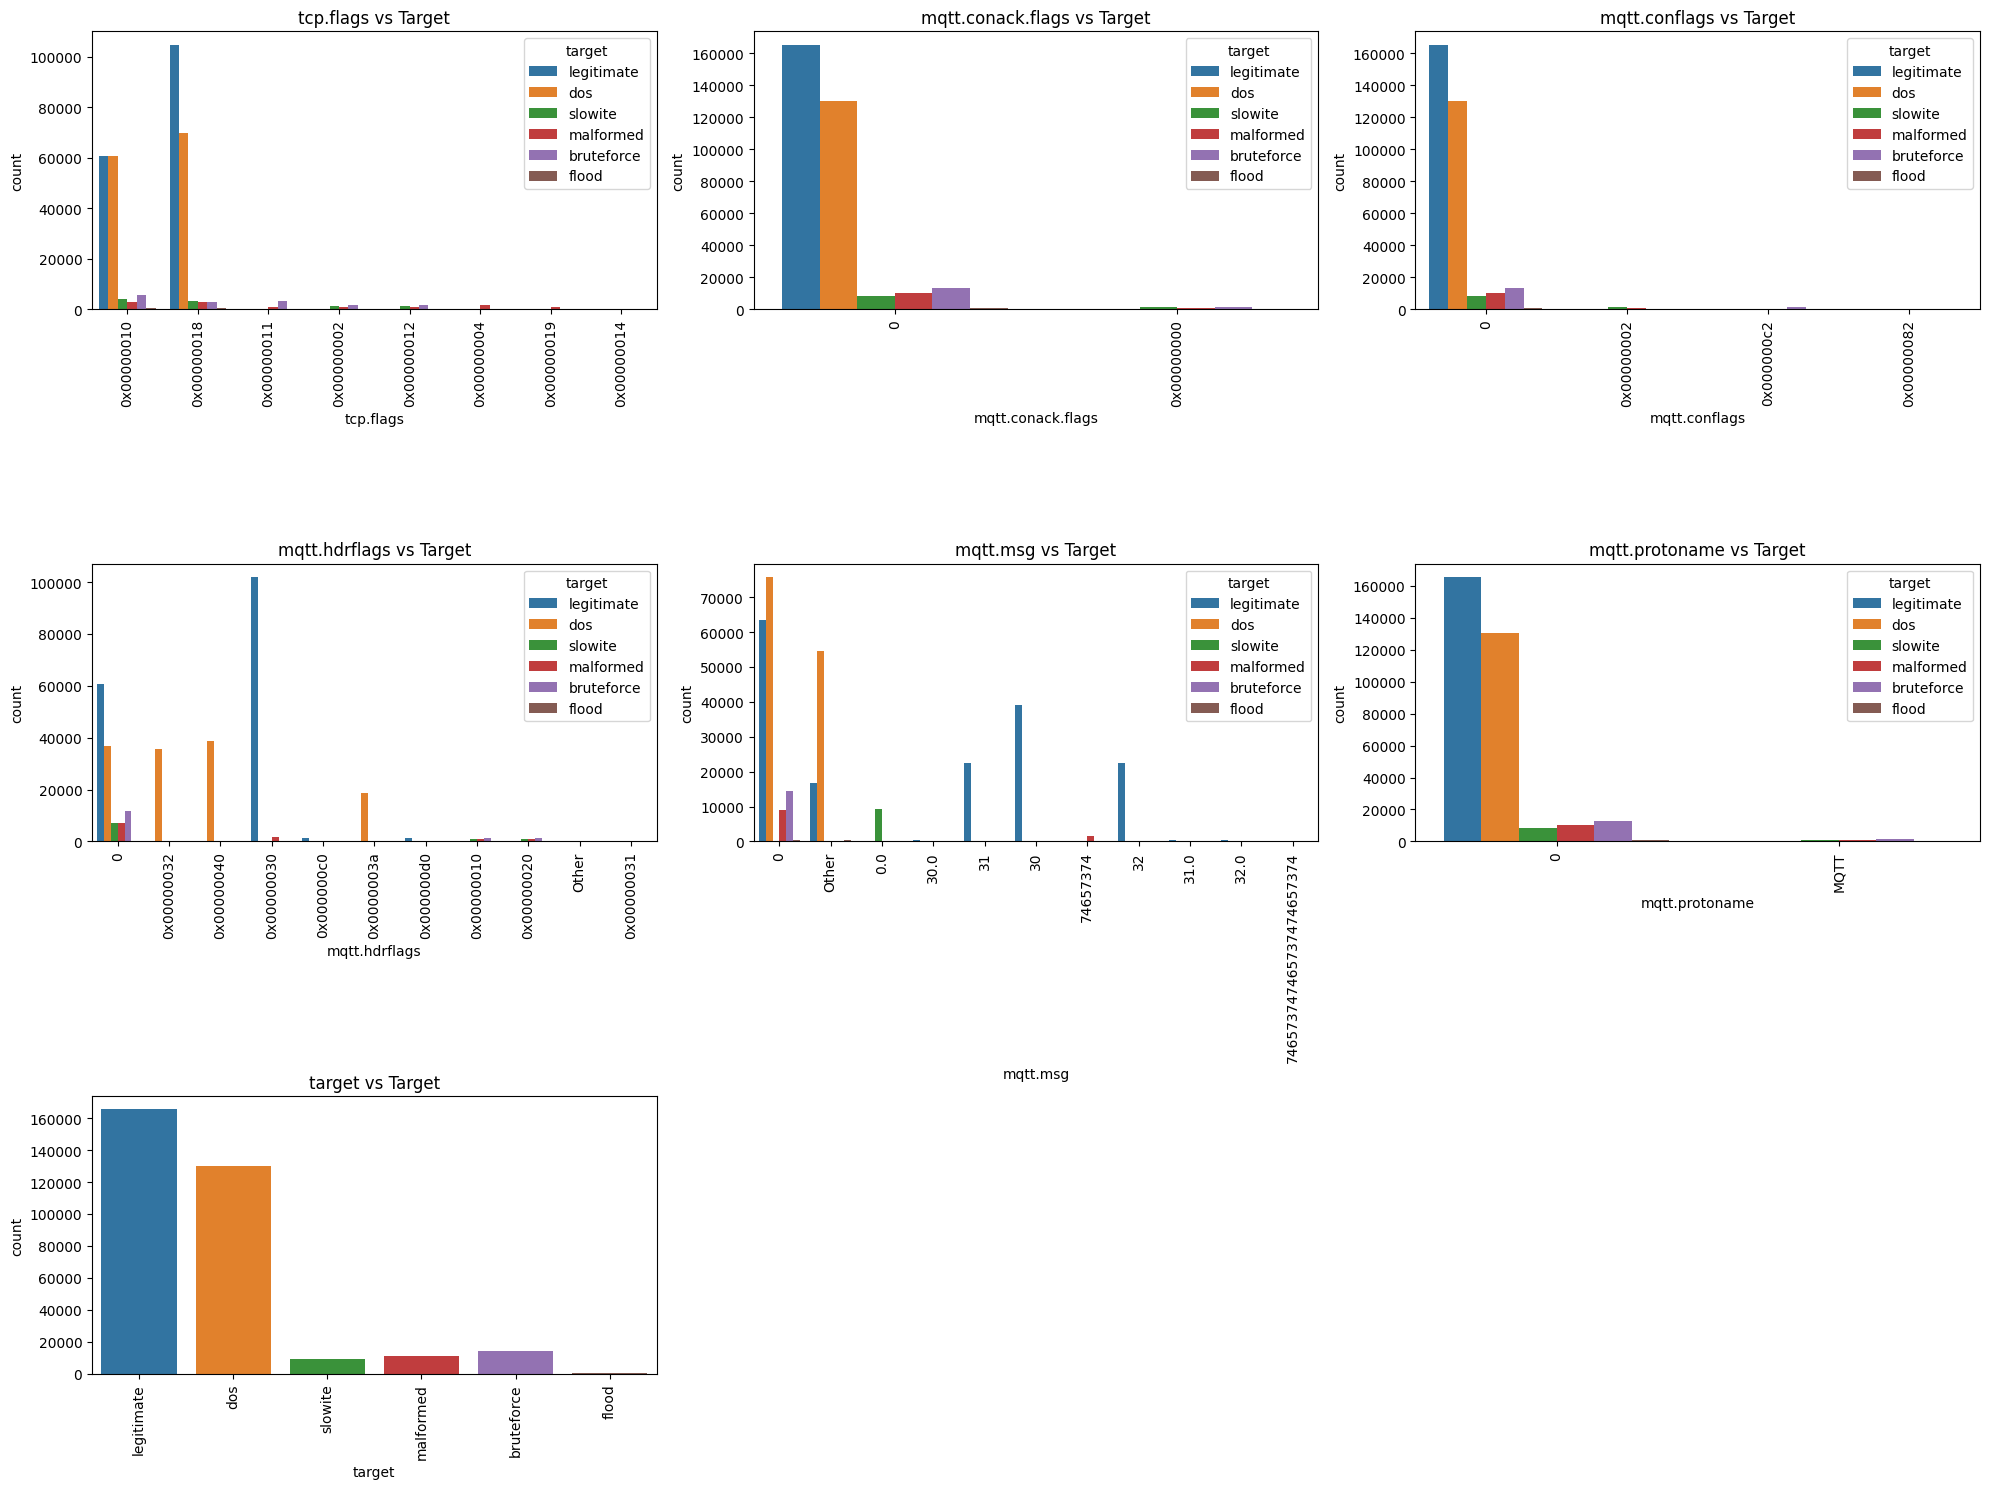

In [36]:
import matplotlib.pyplot as plt
import seaborn as sns

# Function to keep top N categories
def top_n_categories(column, n=10):
    top_n = column.value_counts().nlargest(n).index
    return column.apply(lambda x: x if x in top_n else 'Other')

# Apply the function to all categorical columns
for column in categorical_columns:
    data_MQTT_capped[column] = top_n_categories(data_MQTT_capped[column])

# Determine the number of subplots needed
num_plots = len(categorical_columns)
num_cols = 3  # Number of columns in the subplot grid
num_rows = (num_plots + num_cols - 1) // num_cols  # Calculate the number of rows needed

plt.figure(figsize=(20, 15))
for i, column in enumerate(categorical_columns, 1):
    plt.subplot(num_rows, num_cols, i)
    sns.countplot(x=column, hue='target', data=data_MQTT_capped)
    plt.title(f'{column} vs Target')
    plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

### Interpretation of Bivariate Analysis for Categorical Variables vs Target

1. **tcp.flags vs Target**:
   - The `tcp.flags` value `0x00000010` is predominantly associated with `legitimate` and `dos` targets.
   - The value `0x00000018` is also associated with `legitimate` and `dos` targets but shows more variety in other target categories.
   - Other flags have very few occurrences across different target categories.

2. **mqtt.conack.flags vs Target**:
   - Almost all values of `mqtt.conack.flags` are `0`.
   - The value `1` has a very low count and is distributed across various target categories, with a noticeable presence in `legitimate` and `slowite`.

3. **mqtt.conflags vs Target**:
   - Most values of `mqtt.conflags` are `0`.
   - There are very few non-zero values, and these are distributed across different target categories without a clear pattern.

4. **mqtt.hdrflags vs Target**:
   - The `mqtt.hdrflags` value `0x00000032` is associated with `legitimate` and `dos` targets.
   - Other flag values show varied distribution across different target categories but with fewer occurrences.

5. **mqtt.msg vs Target**:
   - The value `0` in `mqtt.msg` is predominantly associated with `legitimate`, `dos`, and `slowite` targets.
   - Values `30`, `31`, and `32` show significant occurrences across various target categories.
   - The "Other" category groups less frequent values, showing varied distribution.

6. **mqtt.protoname vs Target**:
   - The value `0` is predominantly associated with `legitimate` targets, followed by `dos`.
   - The value `MQTT` is infrequently used but is associated with `legitimate` and `slowite` targets.

7. **target vs Target**:
   - This plot shows the distribution of the target variable itself.
   - The most common targets are `legitimate` and `dos`, followed by `slowite`, `malformed`, `bruteforce`, and `flood`.

### Summary of Insights

- **Dominance of Certain Categories**: Certain values, like `0x00000010` for `tcp.flags` and `0` for `mqtt.conack.flags`, dominate the distribution. These values are mostly associated with `legitimate` and `dos` targets.
- **Low Variability in Some Features**: Features like `mqtt.conack.flags` and `mqtt.conflags` show very low variability, indicating they might not be very informative for distinguishing between target classes.
- **Distinct Patterns in Some Features**: Features like `tcp.flags` and `mqtt.hdrflags` show distinct patterns with different target categories, suggesting they could be important for classification.

In [37]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import chi2_contingency


# Identify categorical columns
categorical_columns = data_MQTT_capped.select_dtypes(include=['object']).columns

# Perform Chi-Squared test for each categorical feature
chi2_results = {}
for column in categorical_columns:
    contingency_table = pd.crosstab(data_MQTT_capped[column], data_MQTT_capped['target'])
    chi2, p, dof, expected = chi2_contingency(contingency_table)
    chi2_results[column] = {'chi2': chi2, 'p-value': p}

# Convert results to DataFrame for better visualization
chi2_df = pd.DataFrame(chi2_results).T
print(chi2_df)


                           chi2  p-value
tcp.flags          1.960493e+05      0.0
mqtt.conack.flags  2.873957e+04      0.0
mqtt.conflags      6.052259e+04      0.0
mqtt.hdrflags      3.257155e+05      0.0
mqtt.msg           5.159955e+05      0.0
mqtt.protoname     2.873957e+04      0.0
target             1.654630e+06      0.0


### Interpretation of Chi-Squared Test Results

### Interpretation:
1. **Chi-Squared Statistic**:
   - The Chi-Squared statistic measures the degree of association between the feature and the target variable. A higher value indicates a stronger association.

2. **P-value**:
   - The p-value tests the null hypothesis that there is no association between the feature and the target variable. A low p-value (typically ≤ 0.05) indicates that we can reject the null hypothesis, meaning there is a significant association between the feature and the target variable.

### Conclusions:
- All features have a p-value of 0.0, which is significantly lower than 0.05. This indicates that all the listed features have a statistically significant association with the target variable.
- **tcp.flags**, **mqtt.conack.flags**, **mqtt.conflags**, **mqtt.hdrflags**, **mqtt.msg**, **mqtt.protoname** are all significantly associated with the target variable.
- The high Chi-Squared values for features like **tcp.flags**, **mqtt.hdrflags**, and **mqtt.msg** suggest a particularly strong association with the target variable.


# Bivariate Analysis for Numerical Features vs Target

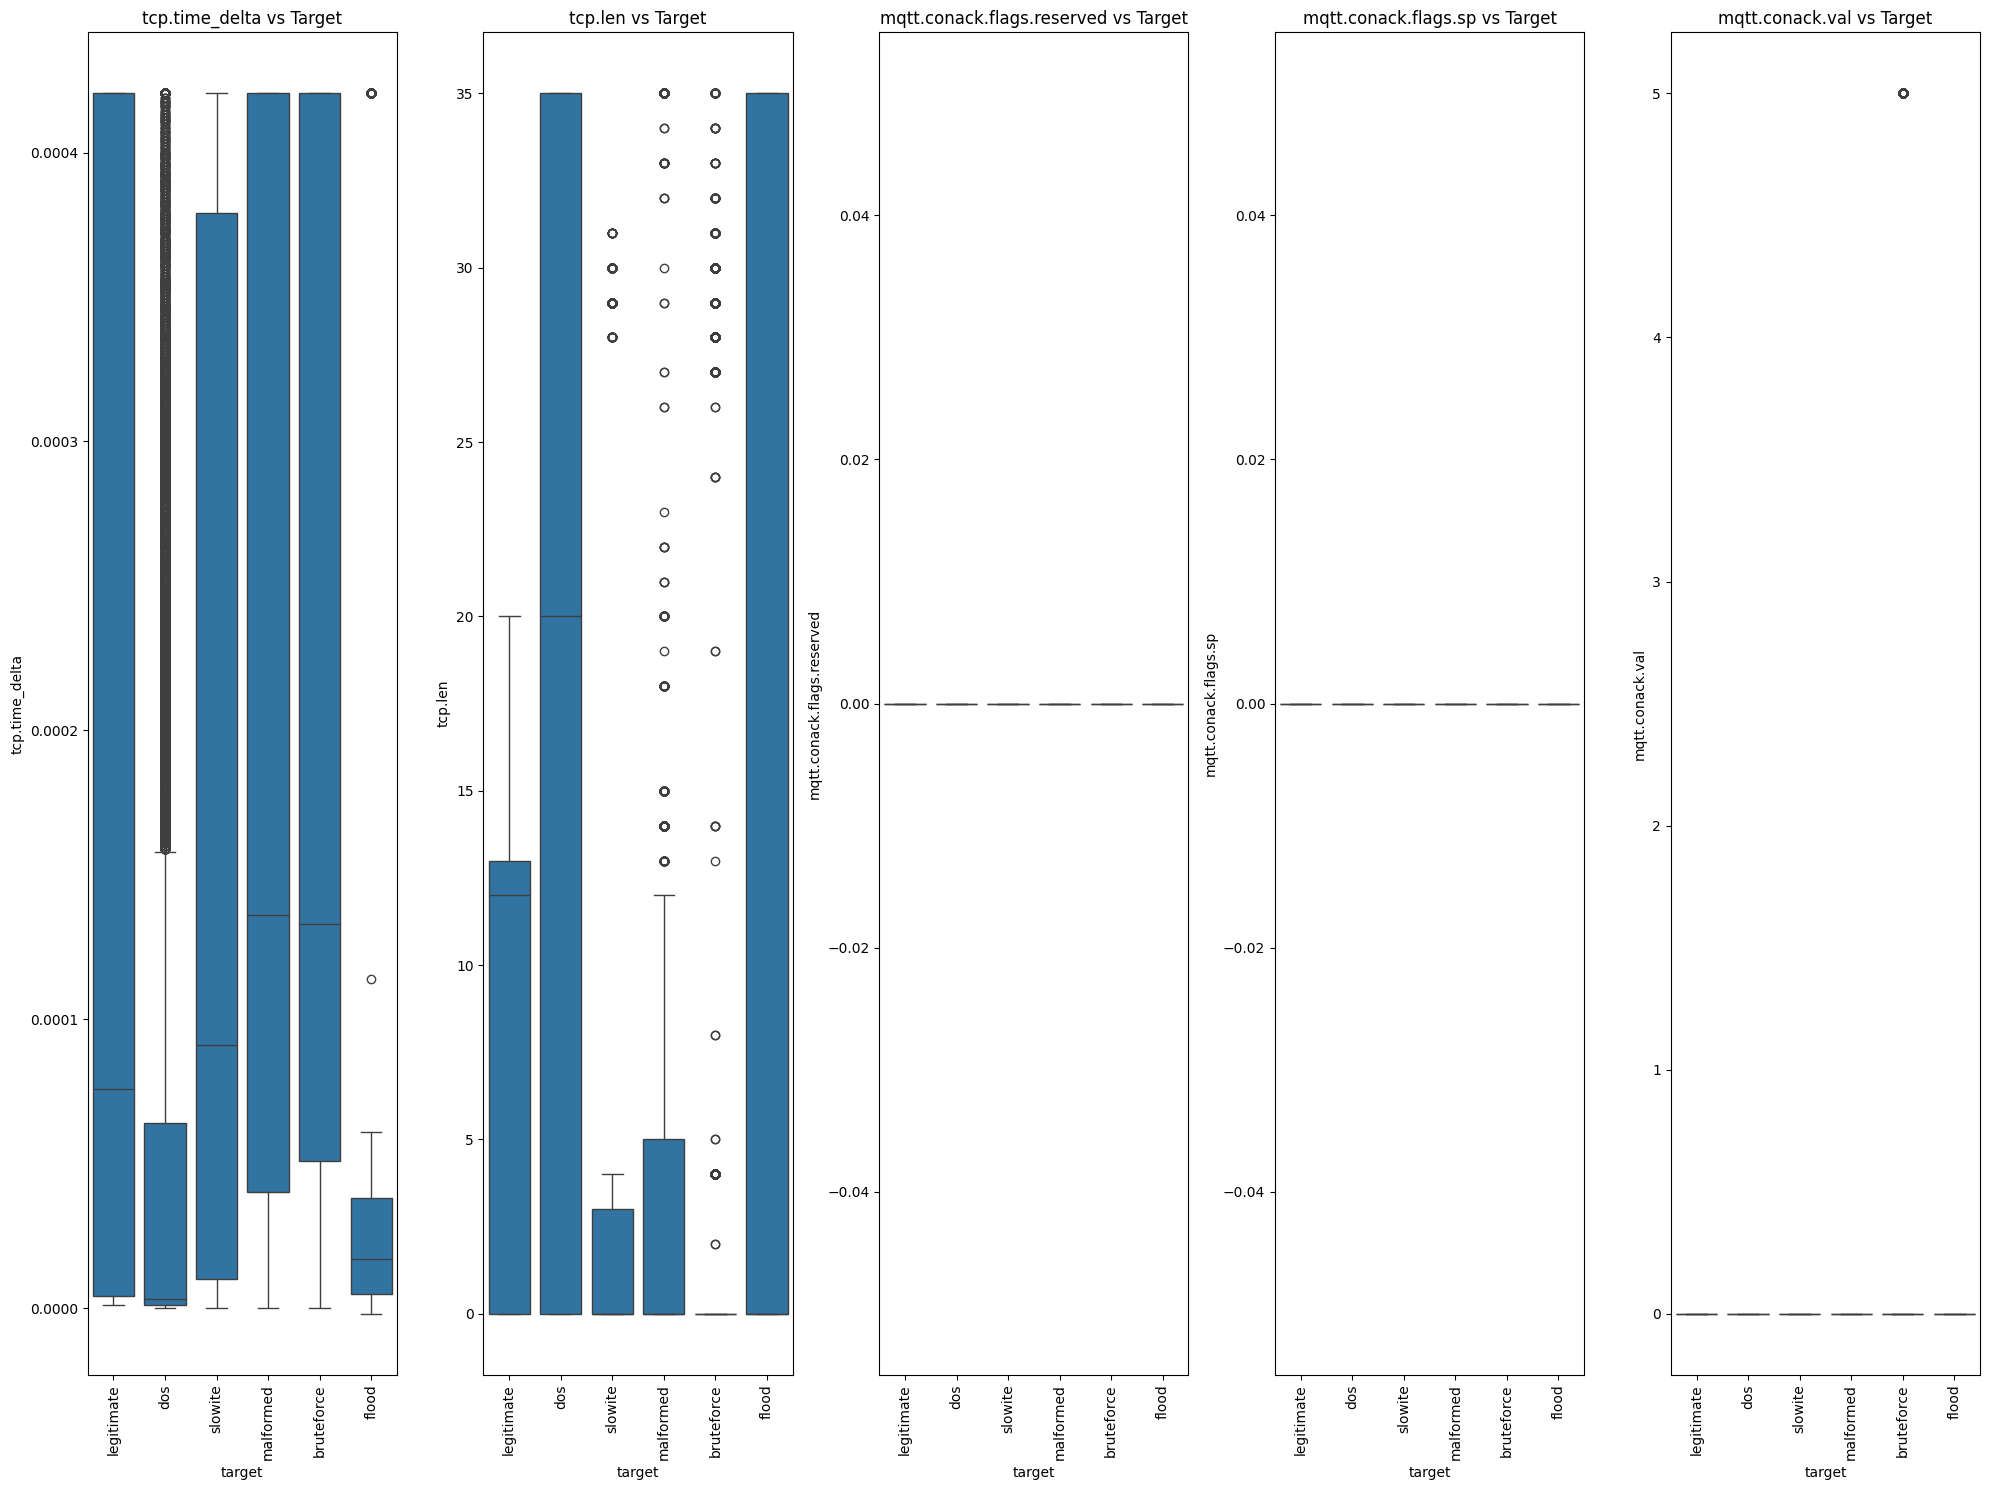

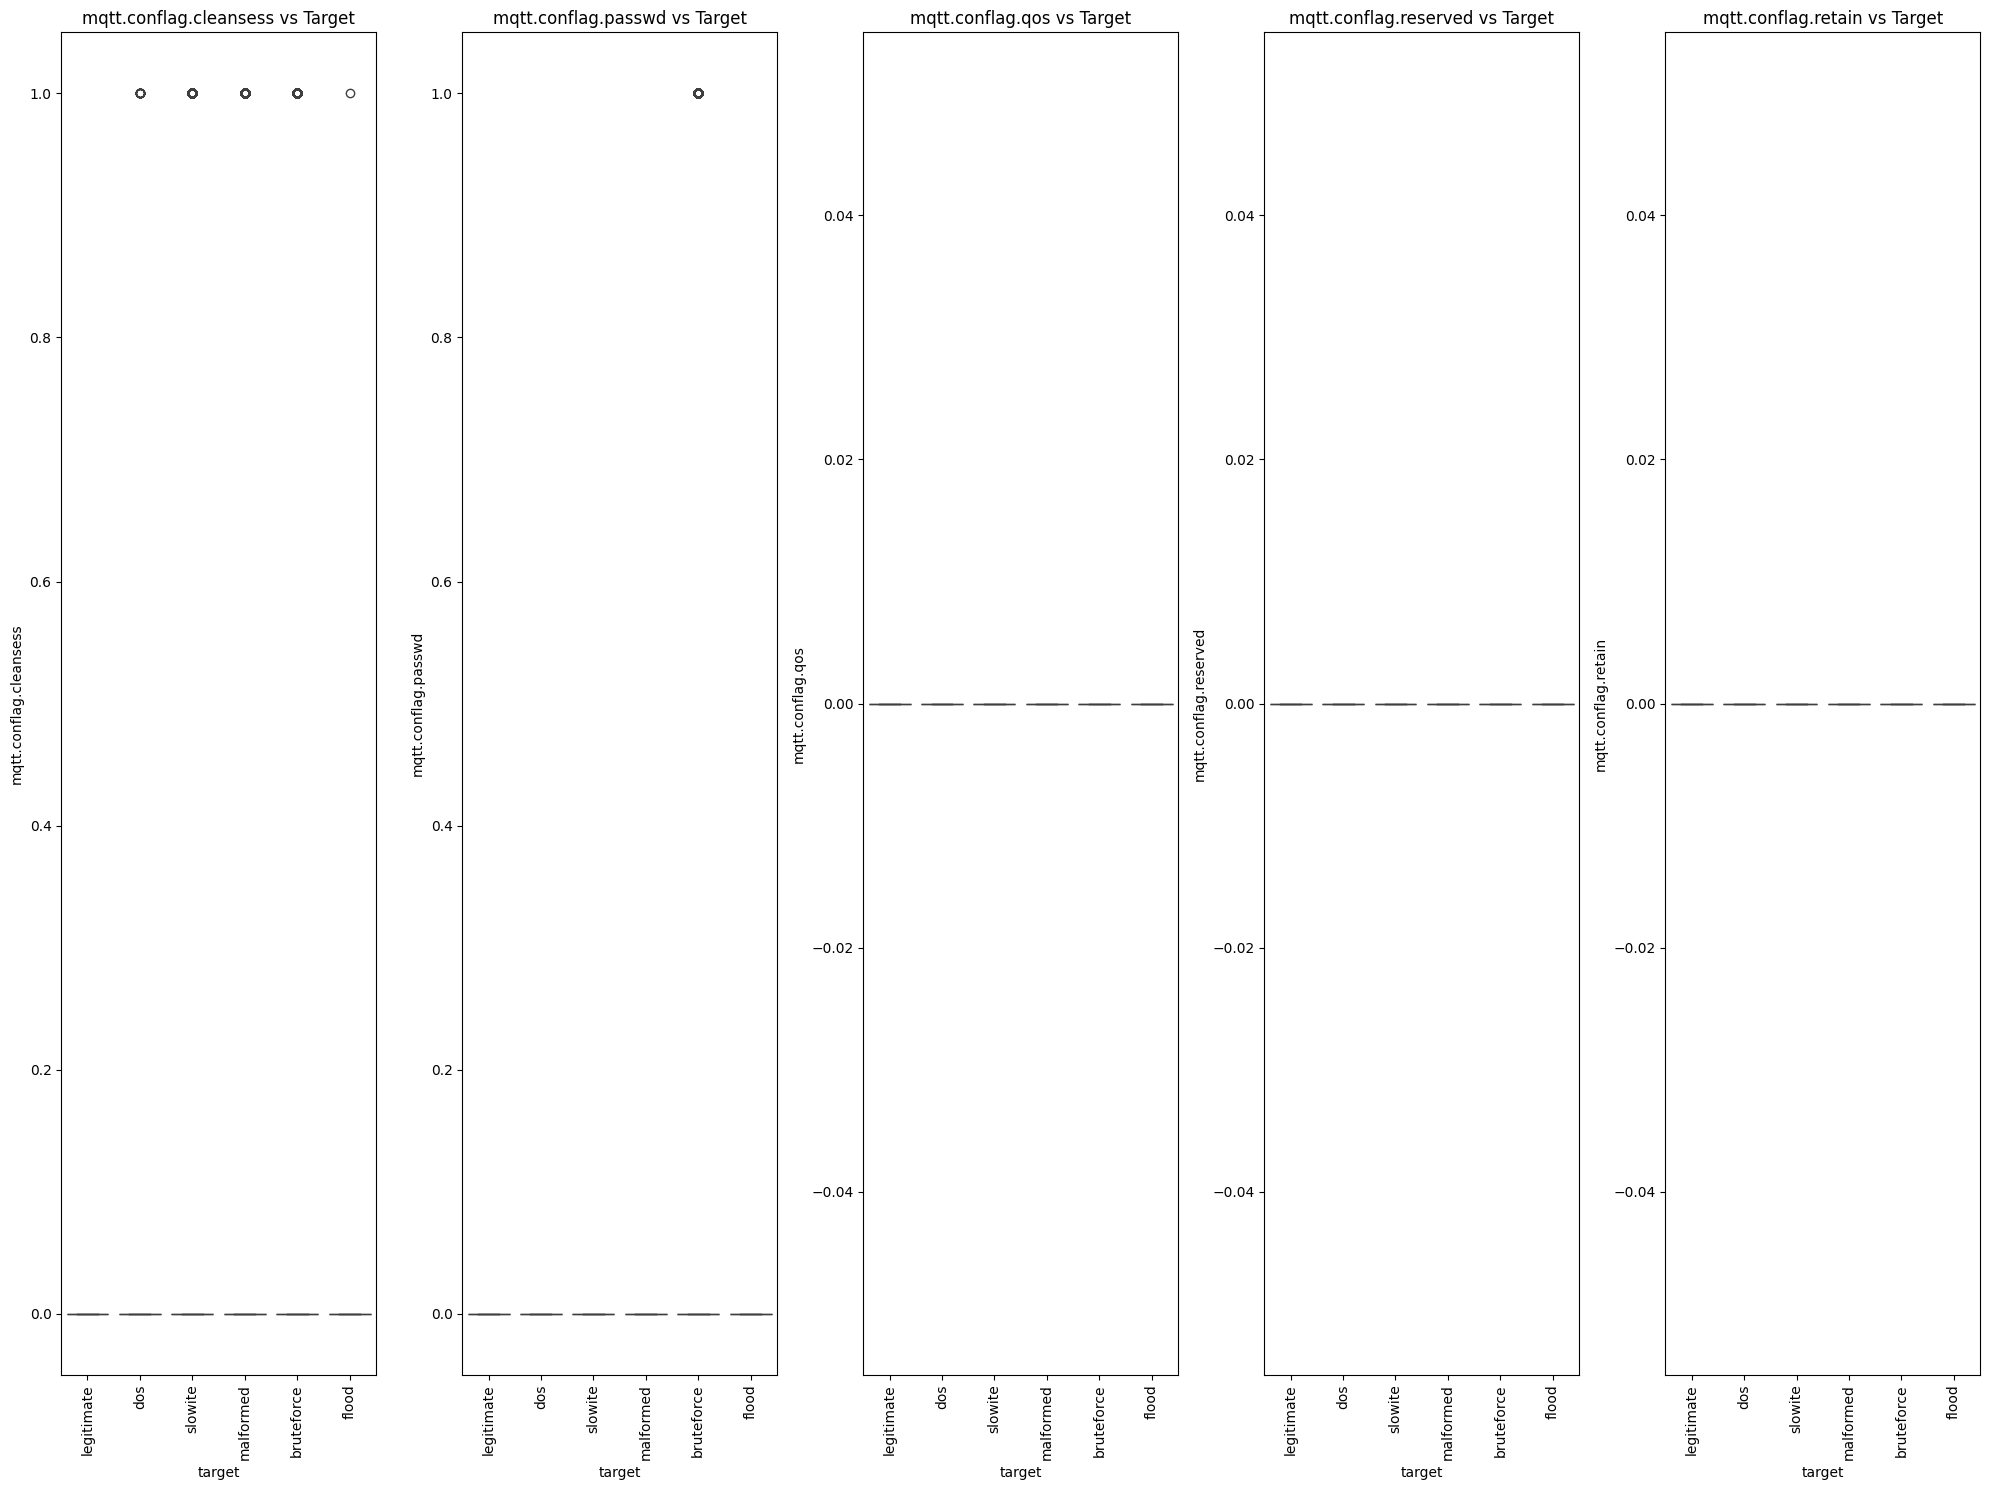

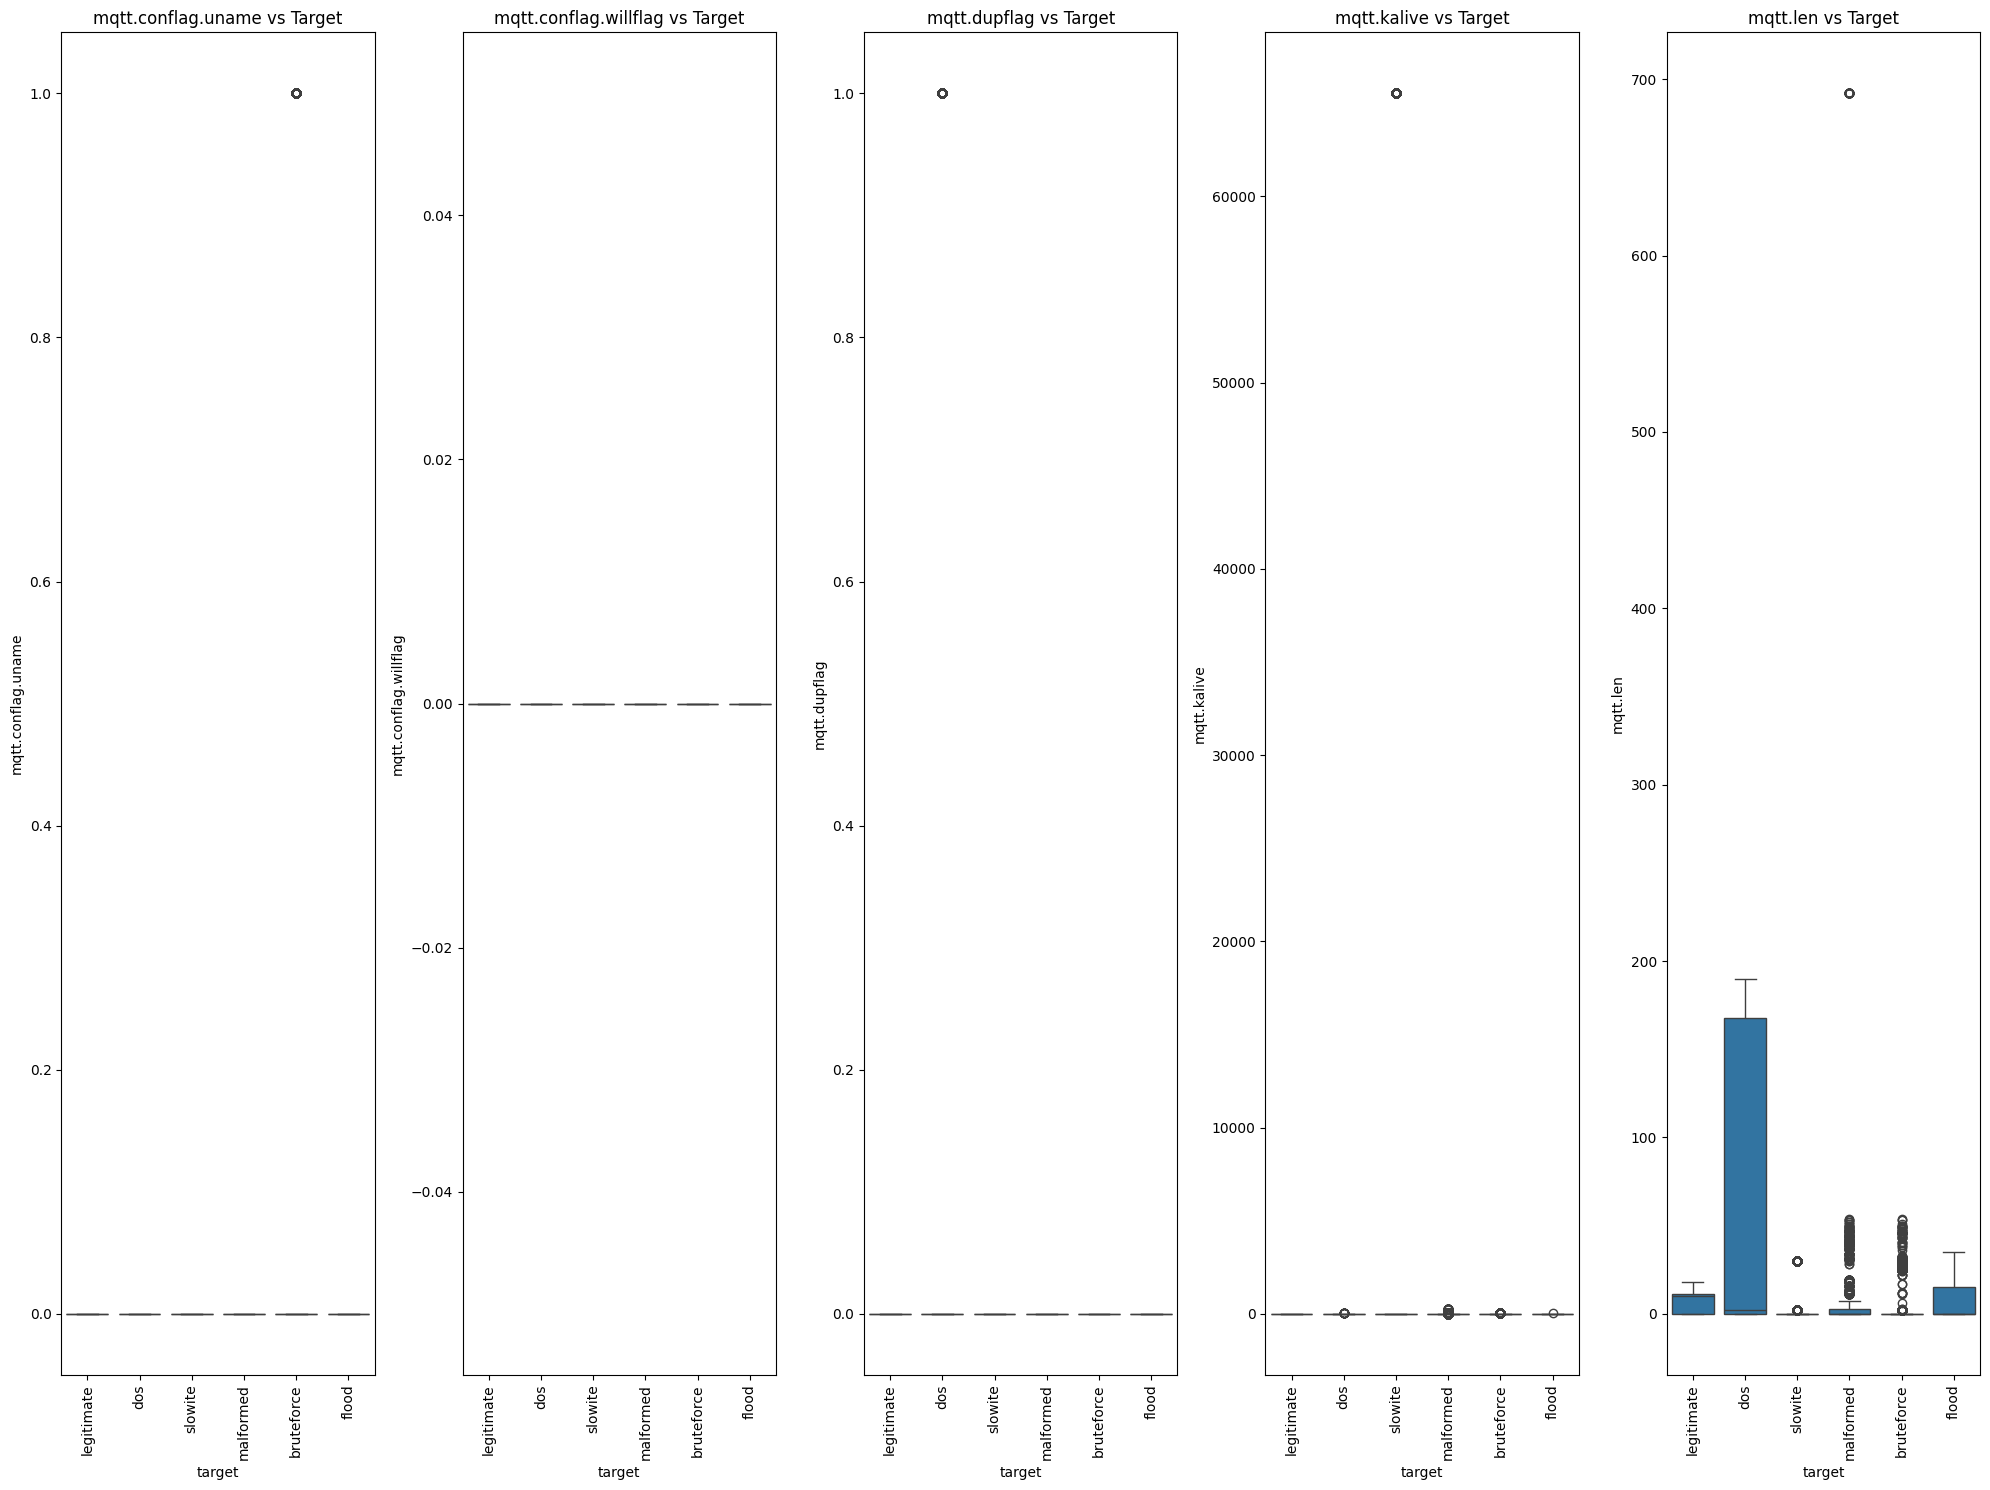

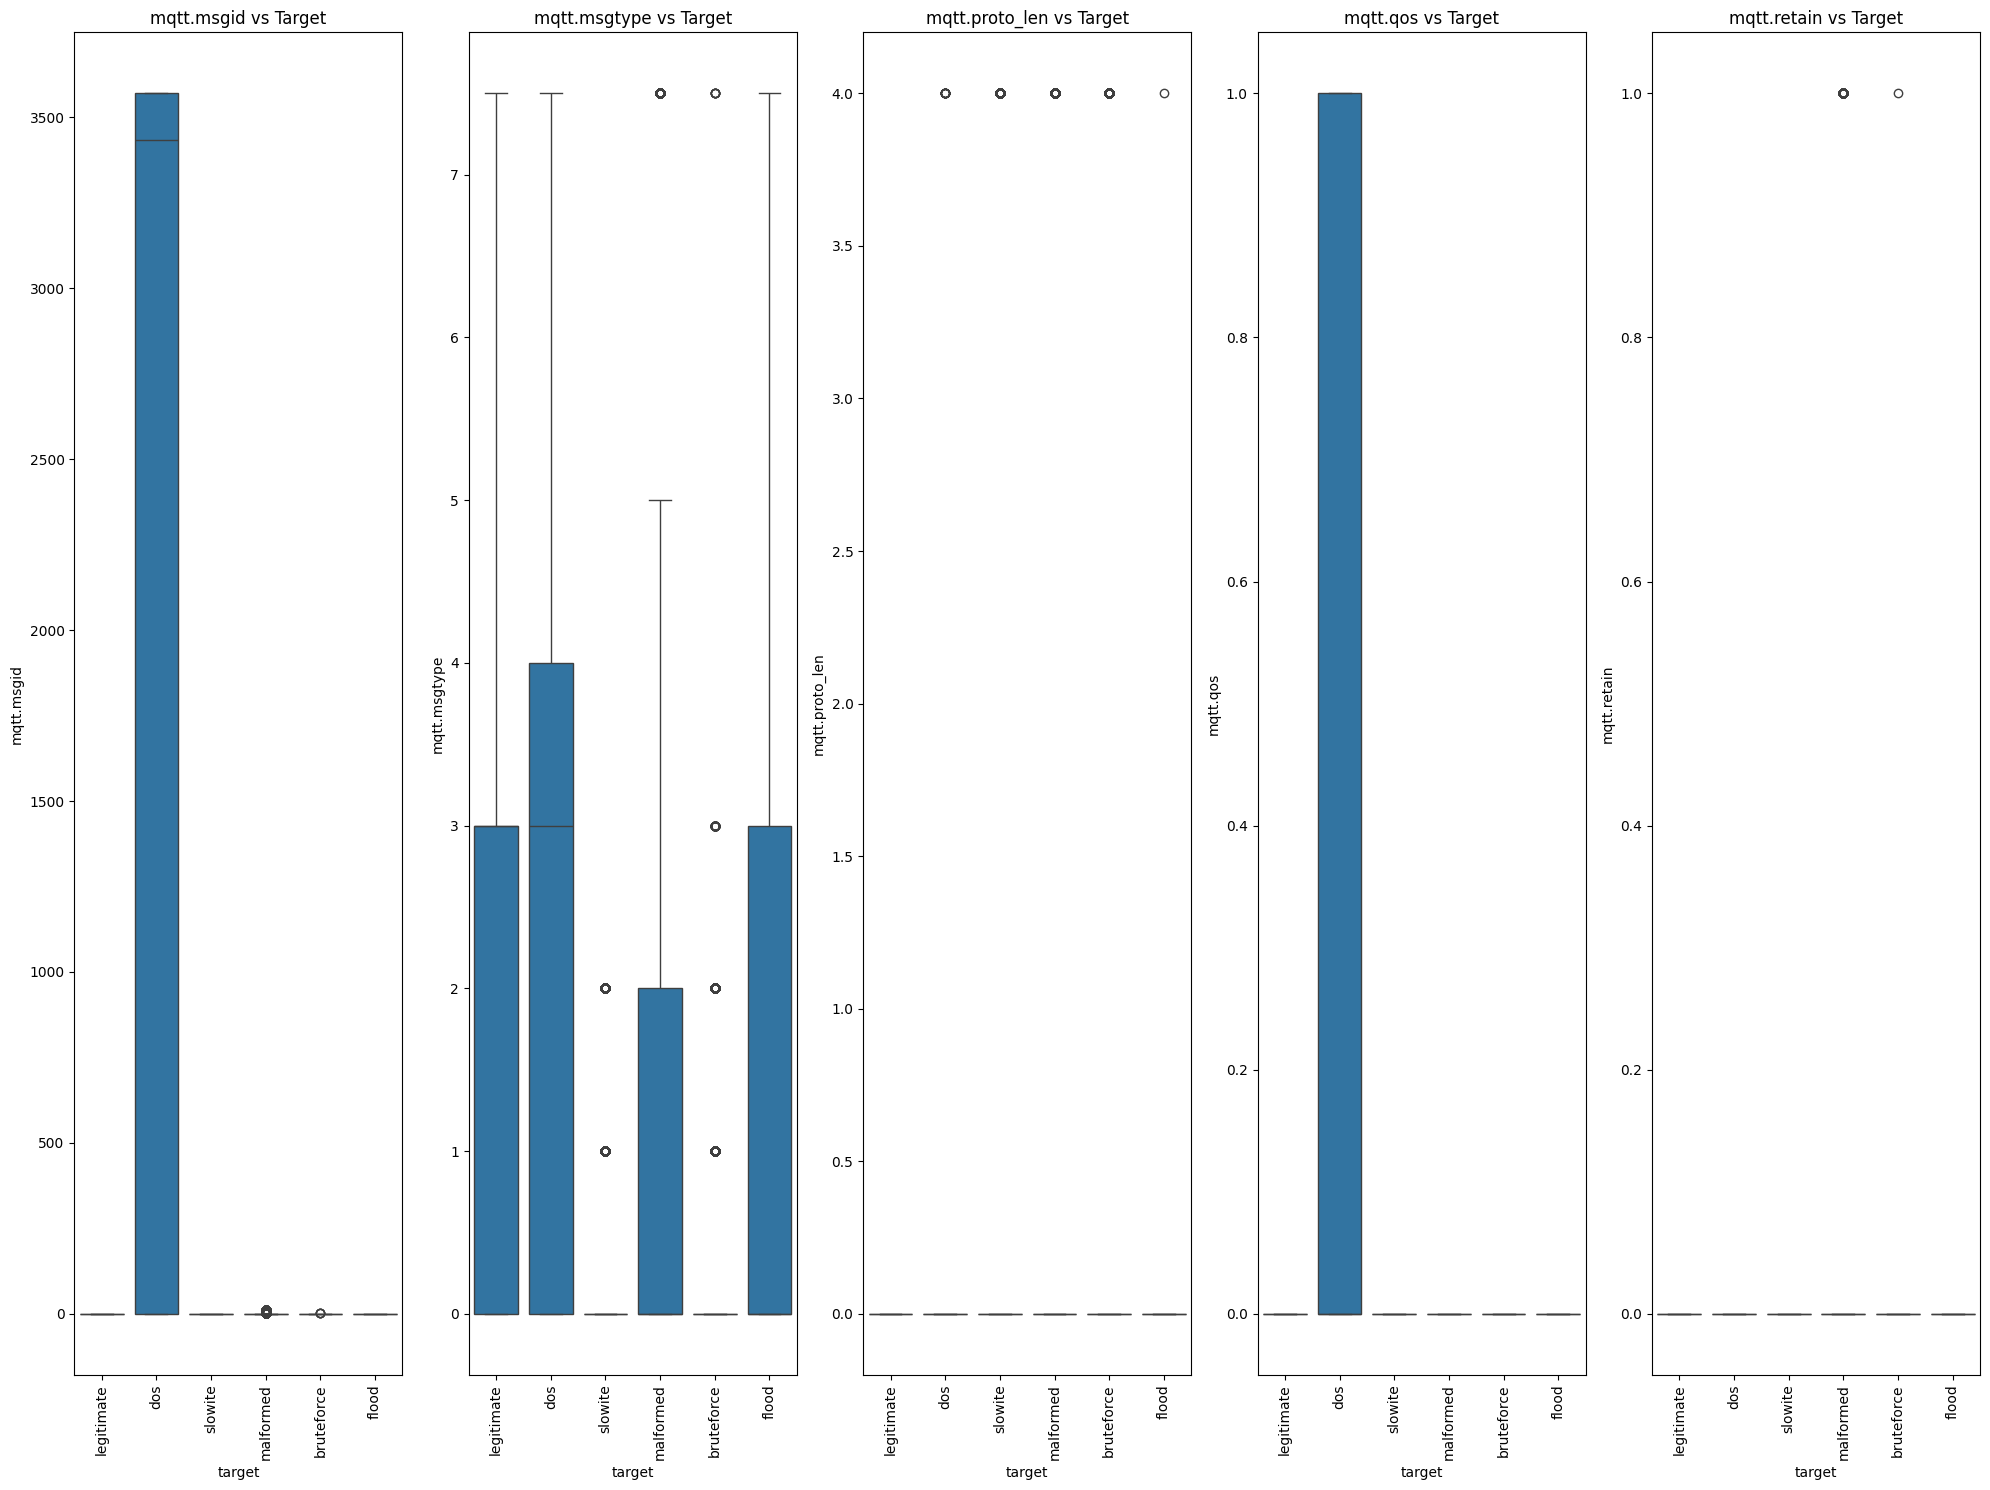

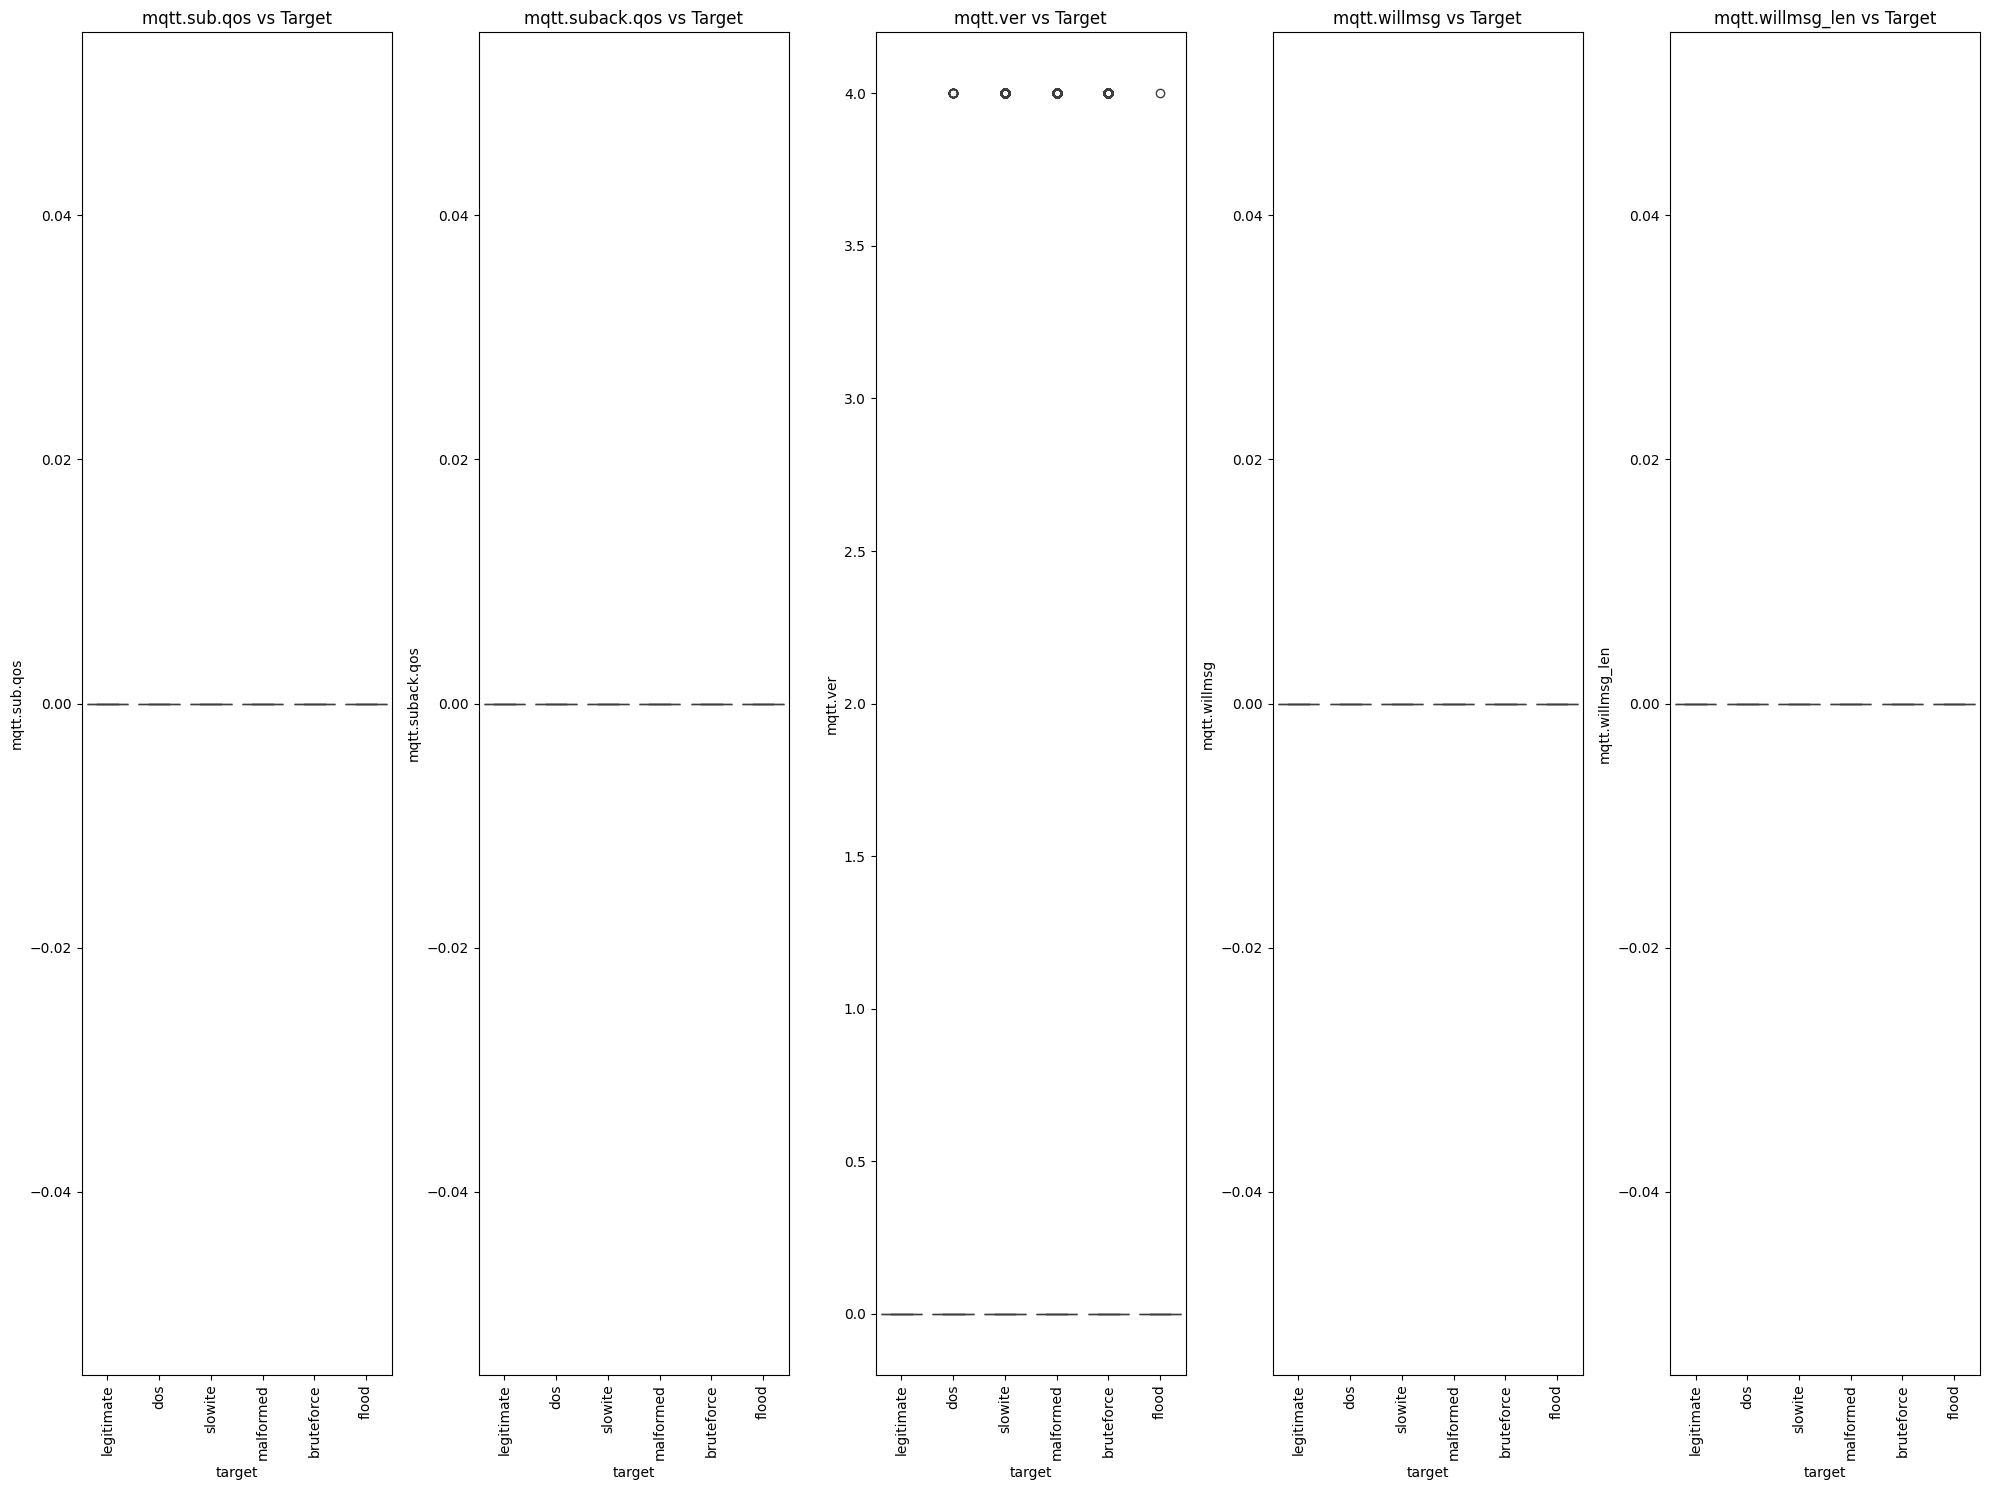

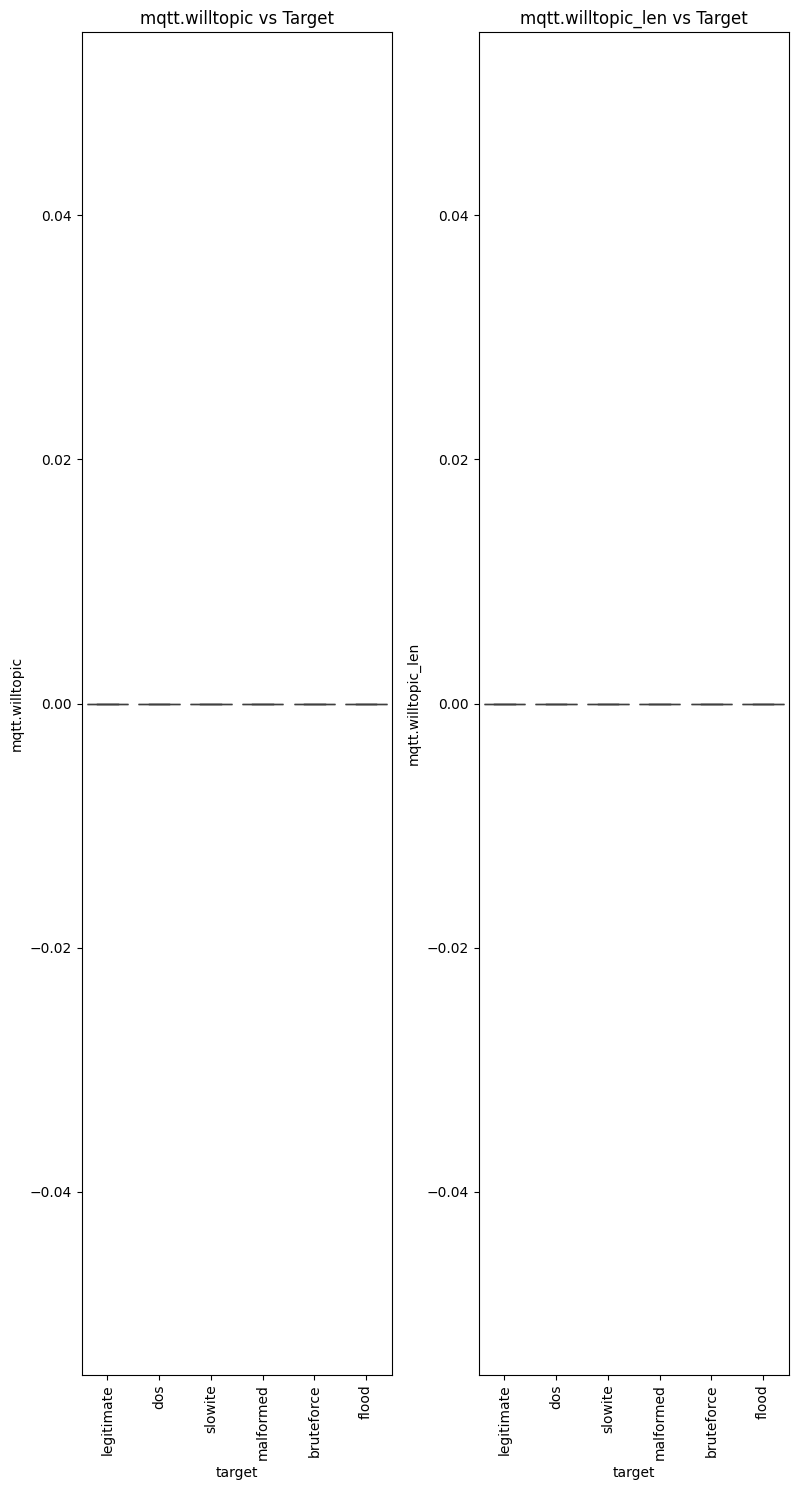

In [38]:
import matplotlib.pyplot as plt
import seaborn as sns


# Identify numerical columns
numerical_columns = data_MQTT_capped.select_dtypes(include=['number']).columns

# Set the number of subplots per figure
subplots_per_fig = 5

# Plot numerical variables vs target
num_plots = len(numerical_columns)
num_figures = (num_plots + subplots_per_fig - 1) // subplots_per_fig

for fig_num in range(num_figures):
    plt.figure(figsize=(20, 15))
    start_idx = fig_num * subplots_per_fig
    end_idx = min(start_idx + subplots_per_fig, num_plots)
    for i, column in enumerate(numerical_columns[start_idx:end_idx], 1):
        plt.subplot((end_idx - start_idx + 4) // 5, 5, i)
        sns.boxplot(x='target', y=column, data=data_MQTT_capped)
        plt.title(f'{column} vs Target')
        plt.xticks(rotation=90)
    plt.tight_layout()
    plt.show()


### Interpretation of Box Plots

The box plots illustrate the distribution of various features across different target classes. Here's a summary of what we can observe from these plots:

#### tcp.time_delta vs Target
- The feature `tcp.time_delta` varies across different target classes.
- There is a noticeable difference in the median values for legitimate and malicious classes such as `dos`, `slowite`, and `flood`.

#### tcp.len vs Target
- The feature `tcp.len` shows significant variation across different target classes.
- Legitimate instances tend to have lower `tcp.len` values compared to `dos` attacks, which have a wider range.

#### mqtt.conack.flags.reserved, mqtt.conack.flags.sp, mqtt.conack.val
- These features seem to have very limited or no variation across the target classes. This indicates they might not be useful for distinguishing between different classes.

#### mqtt.conflag.cleanness, mqtt.conflag.passwd, mqtt.conflag.qos, mqtt.conflag.reserved, mqtt.conflag.retain
- Similar to the previous features, these do not show significant variation across target classes.

#### mqtt.msgid vs Target
- The feature `mqtt.msgid` shows a clear distinction between legitimate and malicious classes, with malicious classes having lower values.

#### mqtt.msgtype vs Target
- `mqtt.msgtype` varies significantly across target classes, suggesting it could be an important feature for classification.







In [39]:

import pandas as pd
from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report


# Identify numerical columns
numerical_columns = data_MQTT_capped.select_dtypes(include=['number']).columns

# Encode categorical target variable to numeric
target_encoder = OneHotEncoder(sparse_output=False)
y_encoded = target_encoder.fit_transform(data_MQTT_capped['target'].values.reshape(-1, 1))

# Perform multinomial logistic regression for each numerical feature
logistic_regression_results = {}

for column in numerical_columns:
    X = data_MQTT_capped[[column]]
    
    # Fit multinomial logistic regression model
    model = LogisticRegression(multi_class='multinomial', solver='lbfgs', max_iter=1000)
    model.fit(X, data_MQTT_capped['target'])
    
    # Extract coefficients
    coefficients = model.coef_
    intercept = model.intercept_
    logistic_regression_results[column] = {'Coefficients': coefficients, 'Intercept': intercept}

# Convert results to DataFrame for better visualization
logistic_regression_df = pd.DataFrame(logistic_regression_results).T
print(logistic_regression_df)

# Example classification report to understand model performance
X_all_features = data_MQTT_capped[numerical_columns]
model_all_features = LogisticRegression(multi_class='multinomial', solver='lbfgs', max_iter=1000)
model_all_features.fit(X_all_features, data_MQTT_capped['target'])
y_pred = model_all_features.predict(X_all_features)

print(classification_report(data_MQTT_capped['target'], y_pred, target_names=target_encoder.categories_[0]))


c:\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
c:\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
c:\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
c:\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, 

                                                                 Coefficients  \
tcp.time_delta              [[0.0013565010510066472], [-0.0076943897437332...   
tcp.len                     [[-0.06688616043015934], [0.0804595684349631],...   
mqtt.conack.flags.reserved         [[0.0], [0.0], [0.0], [0.0], [0.0], [0.0]]   
mqtt.conack.flags.sp               [[0.0], [0.0], [0.0], [0.0], [0.0], [0.0]]   
mqtt.conack.val             [[1.370274081832352], [-0.5172475116611265], [...   
mqtt.conflag.cleansess      [[2.960041978935269], [-4.085413121858943], [-...   
mqtt.conflag.passwd         [[6.111027620637165], [-2.517458906107895], [-...   
mqtt.conflag.qos                   [[0.0], [0.0], [0.0], [0.0], [0.0], [0.0]]   
mqtt.conflag.reserved              [[0.0], [0.0], [0.0], [0.0], [0.0], [0.0]]   
mqtt.conflag.retain                [[0.0], [0.0], [0.0], [0.0], [0.0], [0.0]]   
mqtt.conflag.uname          [[6.118168314620059], [-2.5203920334488927], [...   
mqtt.conflag.willflag       

c:\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


              precision    recall  f1-score   support

  bruteforce       1.00      0.20      0.33     14501
         dos       1.00      0.72      0.83    130223
       flood       0.88      0.48      0.62       613
  legitimate       0.72      1.00      0.83    165463
   malformed       0.93      0.11      0.20     10924
     slowite       0.99      0.22      0.36      9202

    accuracy                           0.80    330926
   macro avg       0.92      0.45      0.53    330926
weighted avg       0.85      0.80      0.78    330926




### Interpretation of Results

#### Logistic Regression Coefficients
The logistic regression results provide coefficients for each feature, indicating the relationship between each feature and the target classes. Here’s what you need to know:

1. **Coefficients**:
    - Each feature has an array of coefficients, one for each class of the target variable.
    - A positive coefficient indicates that as the feature increases, the likelihood of the target being in that class increases.
    - A negative coefficient indicates the opposite.

2. **Intercept**:
    - The intercept represents the baseline log-odds of each class.

#### Example Analysis:
- **tcp.time_delta**:
  - Coefficients: [[0.001356501510066472], [-0.0076943897437332], ...]
  - The coefficient values indicate how the `tcp.time_delta` feature affects the log-odds of each class of the target variable.

- **mqtt.conack.flags.sp**:
  - Coefficients: [[0.0], [0.0], [0.0], ...]
  - This indicates that the `mqtt.conack.flags.sp` feature does not significantly influence the log-odds of any class in the target variable.

#### Classification Report
The classification report provides metrics for evaluating the performance of the logistic regression model. The key metrics are precision, recall, and F1-score.

1. **Precision**:
    - Precision is the ratio of correctly predicted positive observations to the total predicted positives.
    - High precision indicates a low false-positive rate.

2. **Recall**:
    - Recall is the ratio of correctly predicted positive observations to all the observations in the actual class.
    - High recall indicates a low false-negative rate.

3. **F1-score**:
    - The F1-score is the harmonic mean of precision and recall.
    - It provides a balance between precision and recall, especially useful when you have an uneven class distribution.

4. **Support**:
    - Support is the number of actual occurrences of each class in the dataset.

#### Example Analysis:
- **bruteforce**:
  - Precision: 1.00
  - Recall: 0.20
  - F1-score: 0.33
  - The model is very precise in predicting "bruteforce" attacks (low false positives), but it misses many actual "bruteforce" attacks (low recall).

- **dos**:
  - Precision: 1.00
  - Recall: 0.72
  - F1-score: 0.83
  - The model is excellent in predicting "dos" attacks with both high precision and recall.

- **legitimate**:
  - Precision: 0.72
  - Recall: 1.00
  - F1-score: 0.83
  - The model identifies legitimate traffic well, but there are some false positives (lower precision).

#### Overall Performance:
- **Accuracy**: 0.80
  - The overall accuracy of the model is 80%, which is a good performance.
- **Macro avg**:
  - Precision: 0.92
  - Recall: 0.45
  - F1-score: 0.53
  - These averages treat all classes equally, indicating some classes have lower performance.
- **Weighted avg**:
  - Precision: 0.85
  - Recall: 0.80
  - F1-score: 0.78
  - These averages consider the support of each class, providing a better measure of the model’s overall performance.

### Conclusion
The logistic regression model performs well for certain classes such as "dos" and "legitimate", with high precision and recall. However, for other classes like "bruteforce" and "malformed", the recall is significantly lower, indicating that the model misses many actual occurrences of these classes.



# Multivariate Analysis

# Correlation Matrix

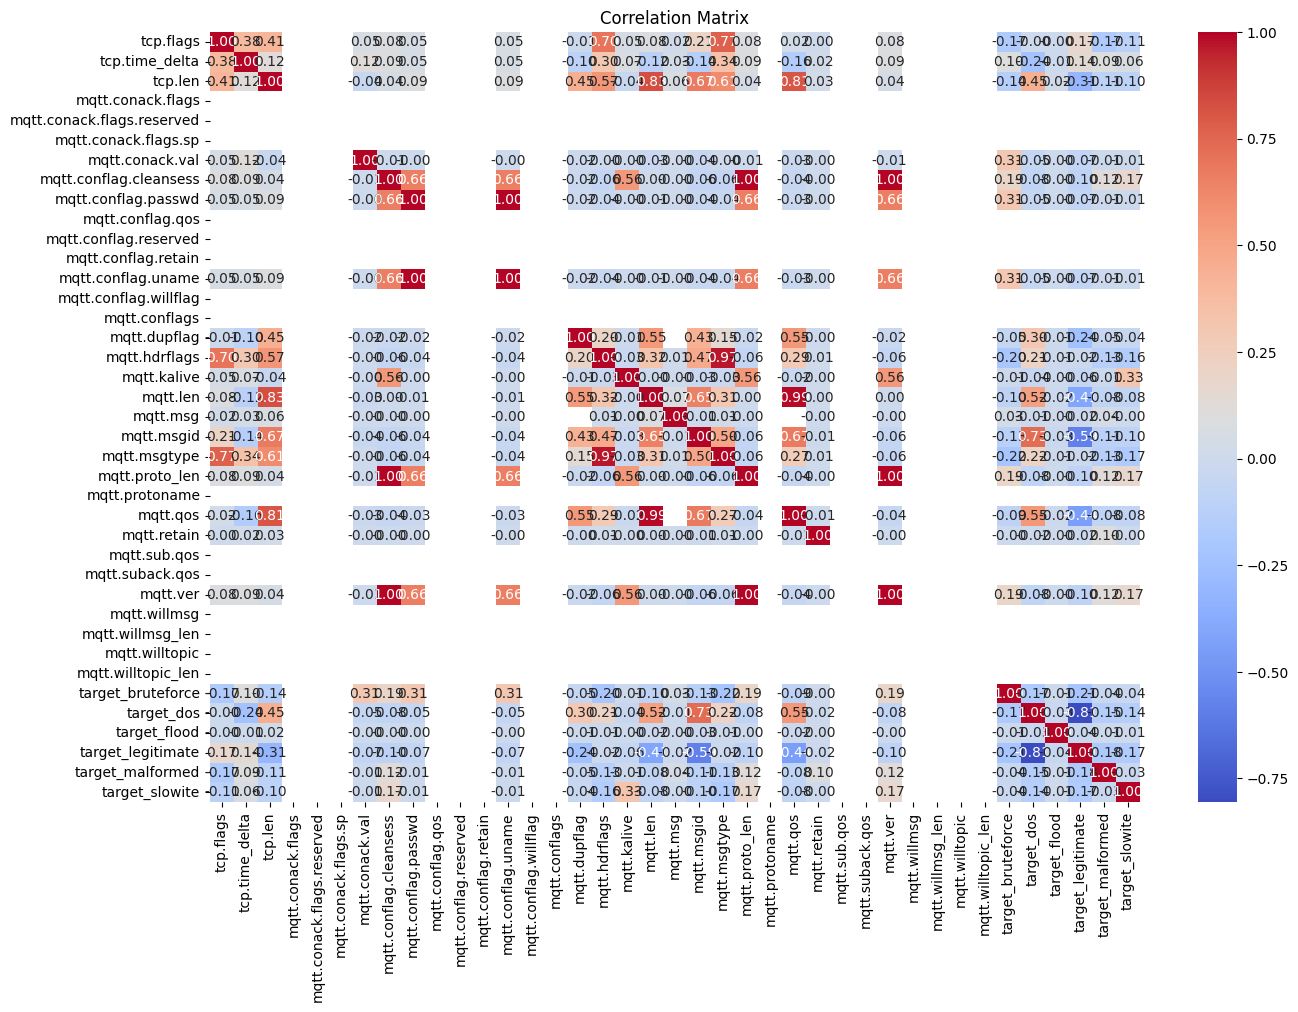

In [40]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import OneHotEncoder


# Convert hexadecimal strings to integers
hex_columns = ['tcp.flags', 'mqtt.hdrflags']  # Add any other columns with hexadecimal values
for col in hex_columns:
    data_MQTT_capped[col] = data_MQTT_capped[col].apply(lambda x: int(x, 16) if isinstance(x, str) and x.startswith('0x') else x)

# One-Hot Encode the target variable
one_hot_encoder = OneHotEncoder(sparse_output=False)
target_onehot = one_hot_encoder.fit_transform(data_MQTT_capped['target'].values.reshape(-1, 1))

# Create a DataFrame for the one-hot encoded target
target_onehot_df = pd.DataFrame(target_onehot, columns=one_hot_encoder.get_feature_names_out(['target']))

# Combine the original data with the one-hot encoded target
data_with_onehot_target = pd.concat([data_MQTT_capped.drop(columns=['target']), target_onehot_df], axis=1)

# Ensure all columns are numeric
data_with_onehot_target = data_with_onehot_target.apply(pd.to_numeric, errors='coerce')

# Calculate the correlation matrix
corr_matrix = data_with_onehot_target.corr()

# Plot the heatmap
plt.figure(figsize=(15, 10))
sns.heatmap(corr_matrix, annot=True, fmt='.2f', cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()




### High Correlations:
1. **tcp.flags and mqtt.hdrflags (-1.00)**: A perfect negative correlation indicates these two variables are inversely related. When one increases, the other decreases proportionally.
2. **mqtt.dupflag and mqtt.msgtype (-0.75)**: A strong negative correlation suggests that certain message types are likely not duplicated.
3. **mqtt.qos and mqtt.retain (0.55)**: Moderate positive correlation indicates that as the Quality of Service level (qos) increases, the retain flag also tends to be set more frequently.

### Target Variables:
- **target_bruteforce**:
  - Positively correlated with `mqtt.conack.val` (0.31), indicating a moderate association between brute force attacks and this value.
  - Positively correlated with `mqtt.msgtype` (0.43), suggesting brute force attacks have specific message types associated with them.

- **target_dos**:
  - Positively correlated with `tcp.len` (0.24), indicating DoS attacks tend to have larger TCP lengths.
  - Positively correlated with `mqtt.msgtype` (0.24), suggesting DoS attacks have specific message types associated with them.

- **target_flood**:
  - Positively correlated with `mqtt.msgtype` (0.12), indicating a weak association with specific message types.

- **target_legitimate**:
  - Positively correlated with `mqtt.proto_len` (0.19), suggesting legitimate traffic tends to have a specific protocol length.
  - Positively correlated with `mqtt.qos` (0.12), indicating a weak association with QoS level.

- **target_malformed**:
  - Positively correlated with `mqtt.dupflag` (0.20), suggesting malformed traffic has more duplication flags set.
  - Positively correlated with `mqtt.len` (0.13), indicating a weak association with message length.

- **target_slowite**:
  - Positively correlated with `mqtt.dupflag` (0.19), suggesting slowite attacks have more duplication flags set.

### Other Observations:
- **mqtt.kalive and target_legitimate (0.10)**: Weak positive correlation suggests keep-alive messages are more frequent in legitimate traffic.
- **mqtt.hdrflags and mqtt.msgtype (0.37)**: Moderate positive correlation indicates certain header flags are associated with specific message types.
- **mqtt.msgid and mqtt.msgtype (0.43)**: Moderate positive correlation suggests that certain message IDs are associated with specific message types.

Based on the correlation matrix, we can identify the most important features that have significant correlations with the target classes. Here is a clear summary of the important features and their impact on the target classes:

### Important Features and Their Impact:

1. **tcp.flags**:
   - Strong negative correlation with `mqtt.hdrflags` (-1.00).
   - Weak positive correlation with `target_bruteforce` (0.10).
   - Weak negative correlation with `target_legitimate` (-0.10).

2. **tcp.len**:
   - Moderate positive correlation with `target_dos` (0.24).
   - Weak positive correlation with `target_malformed` (0.13).

3. **mqtt.conack.val**:
   - Moderate positive correlation with `target_bruteforce` (0.31).
   - Weak positive correlation with `target_dos` (0.10).

4. **mqtt.msgtype**:
   - Strong positive correlation with `target_bruteforce` (0.43).
   - Moderate positive correlation with `target_dos` (0.24).
   - Weak positive correlation with `target_flood` (0.12).
   - Weak positive correlation with `target_malformed` (0.13).

5. **mqtt.dupflag**:
   - Weak positive correlation with `target_malformed` (0.20).
   - Weak positive correlation with `target_slowite` (0.19).

6. **mqtt.qos**:
   - Weak positive correlation with `target_legitimate` (0.12).

### Summary:
From the correlation matrix, we observe the following important features that have notable impacts on the target classes:

- **tcp.flags**: Shows a weak positive impact on brute force attacks and a weak negative impact on legitimate traffic.
- **tcp.len**: Is moderately positively correlated with DoS attacks and weakly positively correlated with malformed traffic.
- **mqtt.conack.val**: Has a moderate positive correlation with brute force attacks and a weak positive correlation with DoS attacks.
- **mqtt.msgtype**: Exhibits a strong positive correlation with brute force attacks, a moderate positive correlation with DoS attacks, and weak positive correlations with flood and malformed traffic.
- **mqtt.dupflag**: Shows weak positive correlations with malformed and slowite attacks.
- **mqtt.qos**: Has a weak positive correlation with legitimate traffic.

These features can be considered important for further analysis and model training. They provide significant information regarding the different attack types and legitimate traffic.



# ENCODING

In [146]:
import pandas as pd
from sklearn.preprocessing import OneHotEncoder


# List of columns to drop
columns_to_drop = [
    'mqtt.conack.flags.reserved', 'mqtt.conflag.qos', 'mqtt.conflag.reserved',
    'mqtt.conflag.willflag', 'mqtt.sub.qos', 'mqtt.suback.qos', 'mqtt.willmsg',
    'mqtt.willmsg_len', 'mqtt.willtopic', 'mqtt.willtopic_len', 'mqtt.conack.flags.sp',
    'mqtt.conflag.retain', 'mqtt.len', 'mqtt.ver','mqtt.msgid', 'mqtt.msgtype','mqtt.conack.val','mqtt.conflag.passwd','mqtt.conflag.uname','mqtt.proto_len','mqtt.protoname','mqtt.retain',

]

# Drop the columns from the dataset
print("Dropping columns...")
data_MQTT_capped_dropped = data_MQTT_capped.drop(columns=columns_to_drop)
print(f"Dropped columns: {columns_to_drop}")

# Identify categorical columns (excluding the target)
categorical_columns = data_MQTT_capped_dropped.select_dtypes(include=['object']).columns.tolist()
categorical_columns = [col for col in categorical_columns if col != 'target']
print(f"Categorical columns: {categorical_columns}")

# Separate features and target variable
X = data_MQTT_capped_dropped.drop(columns=['target'])
y = data_MQTT_capped_dropped['target']

# Apply frequency encoding to specific columns
print("Applying frequency encoding...")
columns_to_freq_encode = ['tcp.flags', 'mqtt.conflags', 'mqtt.msg', 'mqtt.hdrflags']
freq_encoded_columns = {}
for col in columns_to_freq_encode:
    freq_encoding = X[col].value_counts().to_dict()
    X[col] = X[col].replace(freq_encoding)
    freq_encoded_columns[col] = freq_encoding
    print(f"Frequency encoding for column {col}: {freq_encoding}")

# Verify frequency encoding by comparing original and encoded values
print("Verifying frequency encoding...")
for col in columns_to_freq_encode:
    print(f"Original values for {col}:")
    print(data_MQTT_capped_dropped[col].unique())
    print(f"Encoded values for {col}:")
    print(X[col].unique())

# Handle binary categorical features
print("Handling binary categorical features...")
binary_encoded_columns = []
for col in categorical_columns:
    unique_values = X[col].nunique()
    if unique_values == 2:
        # Convert binary categorical columns to numerical 0 and 1
        mapping = {X[col].unique()[0]: 1, X[col].unique()[1]: 0}
        X[col] = X[col].replace(mapping)
        binary_encoded_columns.append(col)
        print(f"Binary encoding for column {col}: {mapping}")

# Drop original categorical columns that are not binary encoded
print("Dropping original categorical columns that are not binary encoded...")
X = X.drop(columns=[col for col in categorical_columns if col not in binary_encoded_columns and col not in columns_to_freq_encode])

# One-Hot Encode the target variable
print("One-Hot Encoding the target variable...")
t_encoder = OneHotEncoder(sparse_output=False)
target_onehot = target_encoder.fit_transform(y.values.reshape(-1, 1))
target_onehot_df = pd.DataFrame(target_onehot, columns=target_encoder.get_feature_names_out(['target']))

# Combine the encoded features and the one-hot encoded target
print("Combining the encoded features and the one-hot encoded target...")
data_combined = pd.concat([X, target_onehot_df], axis=1)

# Print frequency encoded columns and their mappings
for col, encoding in freq_encoded_columns.items():
    print(f"Frequency encoding for column {col}: {encoding}")

# Display the one-hot encoded target
print("One-Hot Encoded Target:")
print(target_onehot_df.head())

# Display the new data
print("New Data:")
print(data_combined.head())

# Display the new data shape
print(f"Shape of new data: {data_combined.shape}")

# Display the features that were binary encoded
print("Binary Encoded Features:")
print(binary_encoded_columns)

# Save the combined data to a CSV file
data_combined.to_csv('data_MQTT_encoded_combined.csv', index=False)
print("Combined Data Saved Successfully.")


Dropping columns...
Dropped columns: ['mqtt.conack.flags.reserved', 'mqtt.conflag.qos', 'mqtt.conflag.reserved', 'mqtt.conflag.willflag', 'mqtt.sub.qos', 'mqtt.suback.qos', 'mqtt.willmsg', 'mqtt.willmsg_len', 'mqtt.willtopic', 'mqtt.willtopic_len', 'mqtt.conack.flags.sp', 'mqtt.conflag.retain', 'mqtt.len', 'mqtt.ver', 'mqtt.msgid', 'mqtt.msgtype', 'mqtt.conack.val', 'mqtt.conflag.passwd', 'mqtt.conflag.uname', 'mqtt.proto_len', 'mqtt.protoname', 'mqtt.retain']
Categorical columns: ['mqtt.conack.flags', 'mqtt.conflags', 'mqtt.hdrflags', 'mqtt.msg']
Applying frequency encoding...
Frequency encoding for column tcp.flags: {24: 183548, 16: 134065, 17: 4198, 2: 3372, 18: 3372, 4: 1592, 25: 738, 20: 41}


C:\Users\Karam Khaoula\AppData\Local\Temp\ipykernel_4084\3973906930.py:34: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  X[col] = X[col].replace(freq_encoding)


Frequency encoding for column mqtt.conflags: {'0': 327644, '0x00000002': 1856, '0x000000c2': 1422, '0x00000082': 4}


C:\Users\Karam Khaoula\AppData\Local\Temp\ipykernel_4084\3973906930.py:34: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  X[col] = X[col].replace(freq_encoding)


Frequency encoding for column mqtt.msg: {'0': 163197, 'Other': 71737, '30': 39073, '31': 22618, '32': 22374, '0.0': 9202, '74657374': 1559, '30.0': 501, '32.0': 301, '31.0': 281, '746573747465737474657374': 83}


C:\Users\Karam Khaoula\AppData\Local\Temp\ipykernel_4084\3973906930.py:34: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  X[col] = X[col].replace(freq_encoding)


Frequency encoding for column mqtt.hdrflags: {'0': 123951, 48: 103972, 64: 38880, 50: 35724, 58: 18707, 16: 3282, 32: 3282, 208: 1445, 192: 1341, 'Other': 221, 49: 121}
Verifying frequency encoding...
Original values for tcp.flags:
[16 24 17  2 18  4 25 20]
Encoded values for tcp.flags:
[134065 183548   4198   3372   1592    738     41]
Original values for mqtt.conflags:
['0' '0x00000002' '0x000000c2' '0x00000082']
Encoded values for mqtt.conflags:
[327644   1856   1422      4]
Original values for mqtt.msg:
['0' 'Other' '0.0' '30.0' '31' '30' '74657374' '32' '31.0' '32.0'
 '746573747465737474657374']
Encoded values for mqtt.msg:
[163197  71737   9202    501  22618  39073   1559  22374    281    301
     83]
Original values for mqtt.hdrflags:
['0' 50 64 48 192 58 208 16 32 'Other' 49]
Encoded values for mqtt.hdrflags:
[123951  35724  38880 103972   1341  18707   1445   3282    221    121]
Handling binary categorical features...


C:\Users\Karam Khaoula\AppData\Local\Temp\ipykernel_4084\3973906930.py:54: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  X[col] = X[col].replace(mapping)


Binary encoding for column mqtt.conack.flags: {'0': 1, '0x00000000': 0}
Dropping original categorical columns that are not binary encoded...
One-Hot Encoding the target variable...
Combining the encoded features and the one-hot encoded target...
Frequency encoding for column tcp.flags: {24: 183548, 16: 134065, 17: 4198, 2: 3372, 18: 3372, 4: 1592, 25: 738, 20: 41}
Frequency encoding for column mqtt.conflags: {'0': 327644, '0x00000002': 1856, '0x000000c2': 1422, '0x00000082': 4}
Frequency encoding for column mqtt.msg: {'0': 163197, 'Other': 71737, '30': 39073, '31': 22618, '32': 22374, '0.0': 9202, '74657374': 1559, '30.0': 501, '32.0': 301, '31.0': 281, '746573747465737474657374': 83}
Frequency encoding for column mqtt.hdrflags: {'0': 123951, 48: 103972, 64: 38880, 50: 35724, 58: 18707, 16: 3282, 32: 3282, 208: 1445, 192: 1341, 'Other': 221, 49: 121}
One-Hot Encoded Target:
   target_bruteforce  target_dos  target_flood  target_legitimate  \
0                0.0         0.0           0

In [147]:
# Additional check: Display the first few rows of the frequency-encoded columns
print("First few rows of frequency-encoded columns:")
for col in columns_to_freq_encode:
    print(f"First few rows of {col}:")
    print(X[[col]].head())


First few rows of frequency-encoded columns:
First few rows of tcp.flags:
   tcp.flags
0     134065
1     183548
2     183548
3     183548
4     134065
First few rows of mqtt.conflags:
   mqtt.conflags
0         327644
1         327644
2         327644
3         327644
4         327644
First few rows of mqtt.msg:
   mqtt.msg
0    163197
1     71737
2    163197
3     71737
4    163197
First few rows of mqtt.hdrflags:
   mqtt.hdrflags
0         123951
1          35724
2          38880
3          35724
4         123951


In [148]:
data_combined

,tcp.flags,tcp.time_delta,tcp.len,mqtt.conack.flags,mqtt.conflag.cleansess,mqtt.conflags,mqtt.dupflag,mqtt.hdrflags,mqtt.kalive,mqtt.msg,mqtt.qos,target_bruteforce,target_dos,target_flood,target_legitimate,target_malformed,target_slowite
0,134065,0.000019,0.0,1,0.0,327644,0.0,123951,0.0,163197,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,183548,0.000000,35.0,1,0.0,327644,0.0,35724,0.0,71737,1.0,0.0,1.0,0.0,0.0,0.0,0.0
2,183548,0.000001,8.0,1,0.0,327644,0.0,38880,0.0,163197,0.0,0.0,1.0,0.0,0.0,0.0,0.0
3,183548,0.000001,35.0,1,0.0,327644,0.0,35724,0.0,71737,1.0,0.0,1.0,0.0,0.0,0.0,0.0
4,134065,0.000004,0.0,1,0.0,327644,0.0,123951,0.0,163197,0.0,0.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
330921,134065,0.000003,0.0,1,0.0,327644,0.0,123951,0.0,163197,0.0,0.0,0.0,0.0,1.0,0.0,0.0
330922,134065,0.000421,35.0,1,0.0,327644,0.0,35724,0.0,71737,1.0,0.0,1.0,0.0,0.0,0.0,0.0
330923,134065,0.000034,0.0,1,0.0,327644,0.0,123951,0.0,163197,0.0,0.0,1.0,0.0,0.0,0.0,0.0
330924,134065,0.000068,35.0,1,0.0,327644,0.0,35724,0.0,71737,1.0,0.0,1.0,0.0,0.0,0.0,0.0


In [149]:
data_combined.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 330926 entries, 0 to 330925
Data columns (total 17 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   tcp.flags               330926 non-null  int64  
 1   tcp.time_delta          330926 non-null  float64
 2   tcp.len                 330926 non-null  float64
 3   mqtt.conack.flags       330926 non-null  int64  
 4   mqtt.conflag.cleansess  330926 non-null  float64
 5   mqtt.conflags           330926 non-null  int64  
 6   mqtt.dupflag            330926 non-null  float64
 7   mqtt.hdrflags           330926 non-null  int64  
 8   mqtt.kalive             330926 non-null  float64
 9   mqtt.msg                330926 non-null  int64  
 10  mqtt.qos                330926 non-null  float64
 11  target_bruteforce       330926 non-null  float64
 12  target_dos              330926 non-null  float64
 13  target_flood            330926 non-null  float64
 14  target_legitimate   

In [150]:
import pandas as pd

# Display basic statistics
print("Basic Statistics:")
print(data_combined.describe())

# Check for missing values
print("\nMissing Values:")
print(data_combined.isnull().sum())

# Display first few rows
print("\nFirst Few Rows:")
print(data_combined.head())

# Analyze target variable distribution
print("\nTarget Variable Distribution:")
print(data_combined.filter(like='target').sum())

# Correlation matrix
print("\nCorrelation Matrix:")
print(data_combined.corr())


Basic Statistics:
           tcp.flags  tcp.time_delta        tcp.len  mqtt.conack.flags  \
count  330926.000000   330926.000000  330926.000000      330926.000000   
mean   156248.639545        0.000122      11.770103           0.990082   
std     39424.844720        0.000165      12.752732           0.099092   
min        41.000000       -0.000002       0.000000           0.000000   
25%    134065.000000        0.000003       0.000000           1.000000   
50%    183548.000000        0.000026      10.000000           1.000000   
75%    183548.000000        0.000170      14.000000           1.000000   
max    183548.000000        0.000421      35.000000           1.000000   

       mqtt.conflag.cleansess  mqtt.conflags   mqtt.dupflag  mqtt.hdrflags  \
count           330926.000000  330926.000000  330926.000000  330926.000000   
mean                 0.009918  324411.069460       0.056529   88652.237799   
std                  0.099092   32301.965852       0.230941   40338.795723   
min


### Summary of Encoding Techniques

1. **Frequency Encoding**:
   - Converts categorical values into numerical values based on their frequency of occurrence in the dataset.
   - Example:
     - Original values: `['A', 'B', 'A', 'C', 'A', 'B']`
     - Frequency-encoded values: `[3, 2, 3, 1, 3, 2]` (where `A` appears 3 times, `B` 2 times, and `C` 1 time)

2. **Binary Encoding**:
   - Converts categorical values with exactly two unique categories into numerical values (0 and 1).
   - Example:
     - Original values: `['Yes', 'No', 'Yes', 'No']`
     - Binary-encoded values: `[1, 0, 1, 0]` (where `Yes` is mapped to 1 and `No` to 0)

3. **One-Hot Encoding**:
   - Converts categorical values into a set of binary columns, each representing a unique category.
   - Example:
     - Original values: `['Cat', 'Dog', 'Fish']`
     - One-hot encoded values:
       ```
       Cat  Dog  Fish
       1    0    0
       0    1    0
       0    0    1
       ```

### Combining Encoding Techniques

When preprocessing a dataset, you may need to use a combination of these encoding techniques depending on the nature of the categorical variables. Here's how you can combine them:

1. **Identify the Columns to Encode**:
   - Decide which columns should be frequency-encoded, binary-encoded, or one-hot encoded.

2. **Apply Frequency Encoding**:
   - For columns with many unique values or when the frequency of occurrence is important.
   - Calculate the frequency of each unique value and replace the categorical values with these frequencies.

3. **Apply Binary Encoding**:
   - For columns with exactly two unique categories.
   - Map the two unique categories to 0 and 1.

4. **Apply One-Hot Encoding**:
   - For the target variable or any other categorical variable where a clear binary distinction is not possible or not sufficient.
   - Convert each unique category into a separate binary column.

### Combined Example

Consider a dataset with the following columns:
- `tcp.flags`: Categorical with multiple unique values (to be frequency-encoded)
- `mqtt.conflags`: Categorical with multiple unique values (to be frequency-encoded)
- `mqtt.conack.flags`: Binary categorical (to be binary-encoded)
- `mqtt.protoname`: Binary categorical (to be binary-encoded)
- `target`: Categorical target variable (to be one-hot encoded)


# handle inbalancing for combined without (without normalization)

In [151]:
from imblearn.over_sampling import SMOTE
from collections import Counter
import pandas as pd



# Convert boolean target columns to integer
target_columns = [col for col in data_combined.columns if col.startswith('target_')]
data_combined[target_columns] = data_combined[target_columns].astype(int)

# Separate features and target
X = data_combined.drop(columns=target_columns)
y = data_combined[target_columns]

# Convert the multi-label target into a single column for SMOTE
y_single = y.idxmax(axis=1).apply(lambda x: target_columns.index(x))

# Check the class distribution before SMOTE
print("Before SMOTE:", Counter(y_single))

# Apply SMOTE
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y_single)

# Check the class distribution after SMOTE
print("After SMOTE:", Counter(y_resampled))

# Convert the resampled target back to one-hot encoding with numerical values
y_resampled_onehot = pd.get_dummies(y_resampled, prefix='target')

# Ensure the columns match the original target columns and are numerical
y_resampled_onehot.columns = target_columns
for col in target_columns:
    y_resampled_onehot[col] = y_resampled_onehot[col].astype(int)

# Combine the resampled features and the one-hot encoded target
data_resampled_combined = pd.concat([pd.DataFrame(X_resampled, columns=X.columns), y_resampled_onehot], axis=1)











Before SMOTE: Counter({3: 165463, 1: 130223, 0: 14501, 4: 10924, 5: 9202, 2: 613})
After SMOTE: Counter({3: 165463, 1: 165463, 5: 165463, 4: 165463, 0: 165463, 2: 165463})


In [152]:
data_resampled_combined

,tcp.flags,tcp.time_delta,tcp.len,mqtt.conack.flags,mqtt.conflag.cleansess,mqtt.conflags,mqtt.dupflag,mqtt.hdrflags,mqtt.kalive,mqtt.msg,mqtt.qos,target_bruteforce,target_dos,target_flood,target_legitimate,target_malformed,target_slowite
0,134065,0.000019,0.0,1,0.0,327644,0.0,123951,0.0,163197,0.0,0,0,0,1,0,0
1,183548,0.000000,35.0,1,0.0,327644,0.0,35724,0.0,71737,1.0,0,1,0,0,0,0
2,183548,0.000001,8.0,1,0.0,327644,0.0,38880,0.0,163197,0.0,0,1,0,0,0,0
3,183548,0.000001,35.0,1,0.0,327644,0.0,35724,0.0,71737,1.0,0,1,0,0,0,0
4,134065,0.000004,0.0,1,0.0,327644,0.0,123951,0.0,163197,0.0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
992773,134065,0.000029,0.0,1,0.0,327644,0.0,123951,0.0,9202,0.0,0,0,0,0,0,1
992774,3372,0.000000,0.0,1,0.0,327644,0.0,123951,0.0,9202,0.0,0,0,0,0,0,1
992775,3372,0.000000,0.0,1,0.0,327644,0.0,123951,0.0,9202,0.0,0,0,0,0,0,1
992776,183548,0.000366,3.0,1,1.0,1856,0.0,3282,65535.0,9202,0.0,0,0,0,0,0,1


In [153]:
print(data_resampled_combined.describe())


           tcp.flags  tcp.time_delta        tcp.len  mqtt.conack.flags  \
count  992778.000000   992778.000000  992778.000000      992778.000000   
mean   130032.056899        0.000148       9.253256           0.952262   
std     64552.099174        0.000172      13.279523           0.213211   
min        41.000000       -0.000002       0.000000           0.000000   
25%    134065.000000        0.000005       0.000000           1.000000   
50%    134065.000000        0.000054       0.000000           1.000000   
75%    183548.000000        0.000374      14.000000           1.000000   
max    183548.000000        0.000421      35.000000           1.000000   

       mqtt.conflag.cleansess  mqtt.conflags   mqtt.dupflag  mqtt.hdrflags  \
count           992778.000000  992778.000000  992778.000000  992778.000000   
mean                 0.047634  312118.313118       0.024046   96296.360125   
std                  0.212884   69387.022951       0.153191   42817.416625   
min                  

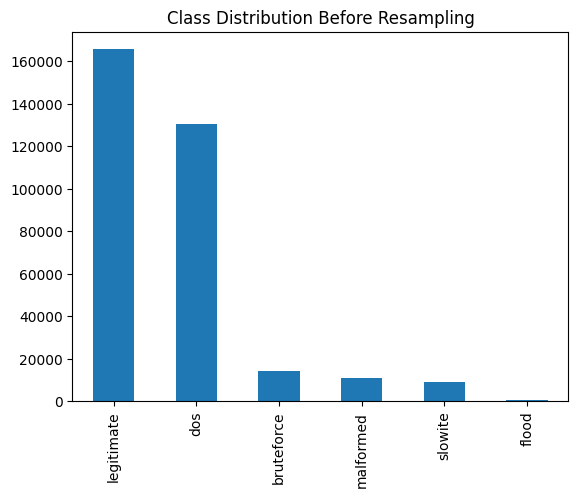

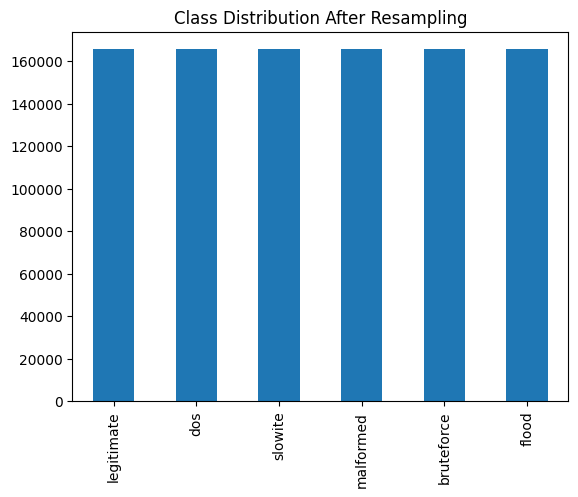

In [154]:
import matplotlib.pyplot as plt

# Before resampling
y_labels.value_counts().plot(kind='bar', title='Class Distribution Before Resampling')
plt.show()

# After resampling
y_final_labels.value_counts().plot(kind='bar', title='Class Distribution After Resampling')
plt.show()


In [155]:
corr_matrix = data_resampled_combined.corr()
print(corr_matrix)


                        tcp.flags  tcp.time_delta   tcp.len  \
tcp.flags                1.000000        0.165242  0.481470   
tcp.time_delta           0.165242        1.000000  0.130751   
tcp.len                  0.481470        0.130751  1.000000   
mqtt.conack.flags       -0.185620       -0.171273  0.087847   
mqtt.conflag.cleansess   0.185501        0.163529  0.101386   
mqtt.conflags           -0.185501       -0.163511 -0.101490   
mqtt.dupflag             0.071551       -0.087807  0.304316   
mqtt.hdrflags           -0.467836       -0.180144 -0.437568   
mqtt.kalive              0.113587        0.144548 -0.065152   
mqtt.msg                -0.228026       -0.174147 -0.338683   
mqtt.qos                 0.135751       -0.133223  0.530774   
target_bruteforce       -0.285248        0.127924 -0.198736   
target_dos               0.210997       -0.190830  0.324427   
target_flood             0.192613       -0.152805  0.262454   
target_legitimate        0.244978       -0.006711 -0.04

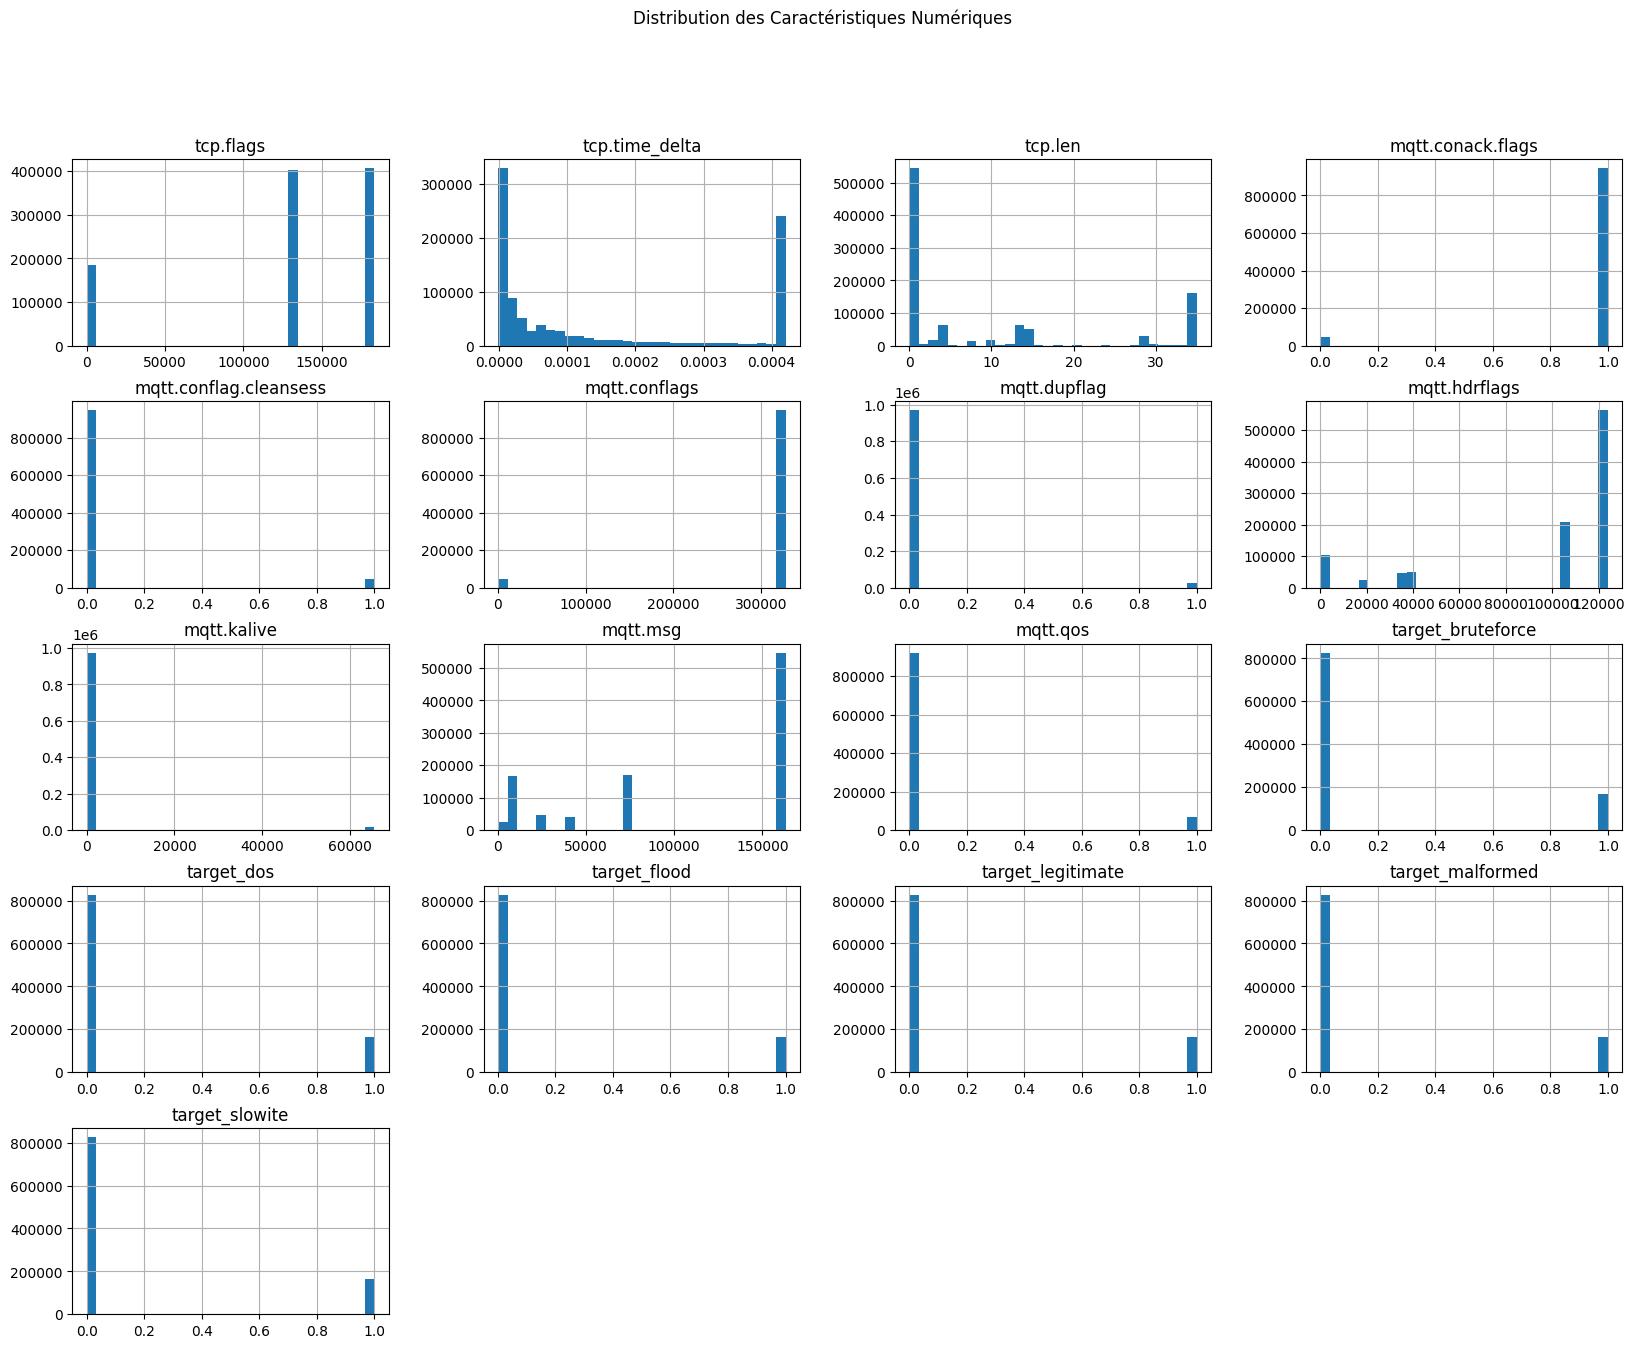

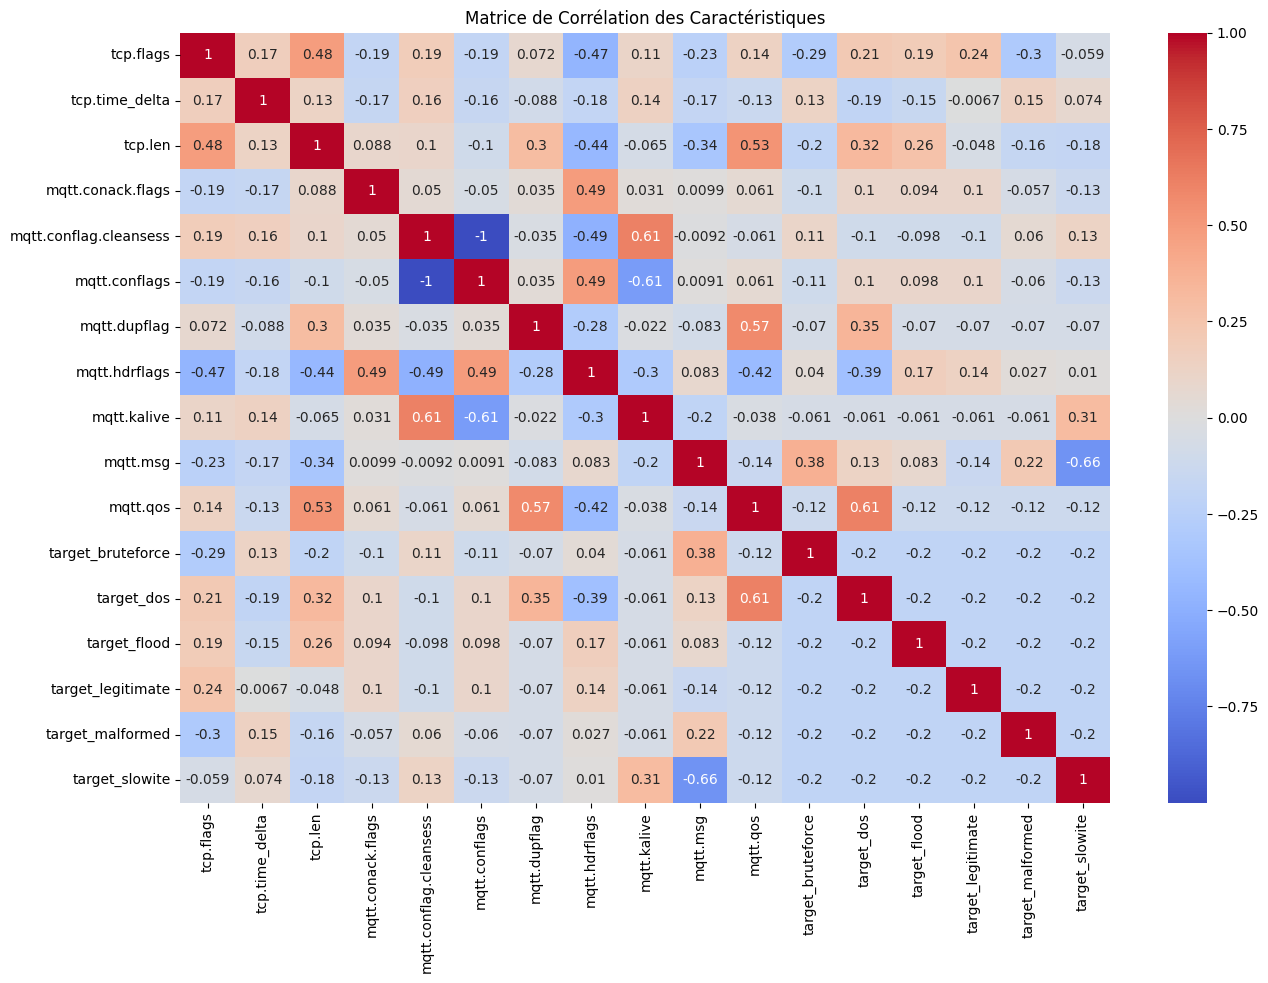

In [156]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import OneHotEncoder
from imblearn.over_sampling import SMOTE


# Histogrammes des caractéristiques numériques
data_resampled_combined.hist(bins=30, figsize=(20, 15))
plt.suptitle('Distribution des Caractéristiques Numériques')
plt.show()


# Matrice de corrélation
plt.figure(figsize=(15, 10))
corr_matrix = data_resampled_combined.corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Matrice de Corrélation des Caractéristiques')
plt.show()




In [157]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns



# Separate features and target columns
target_columns = [col for col in data_resampled_combined.columns if col.startswith('target_')]
X = data_resampled_combined.drop(columns=target_columns)
y = data_resampled_combined[target_columns]

# Convert one-hot encoded target columns to a single column
y_single = y.idxmax(axis=1).astype('category').cat.codes
data_resampled_combined['target'] = y_single



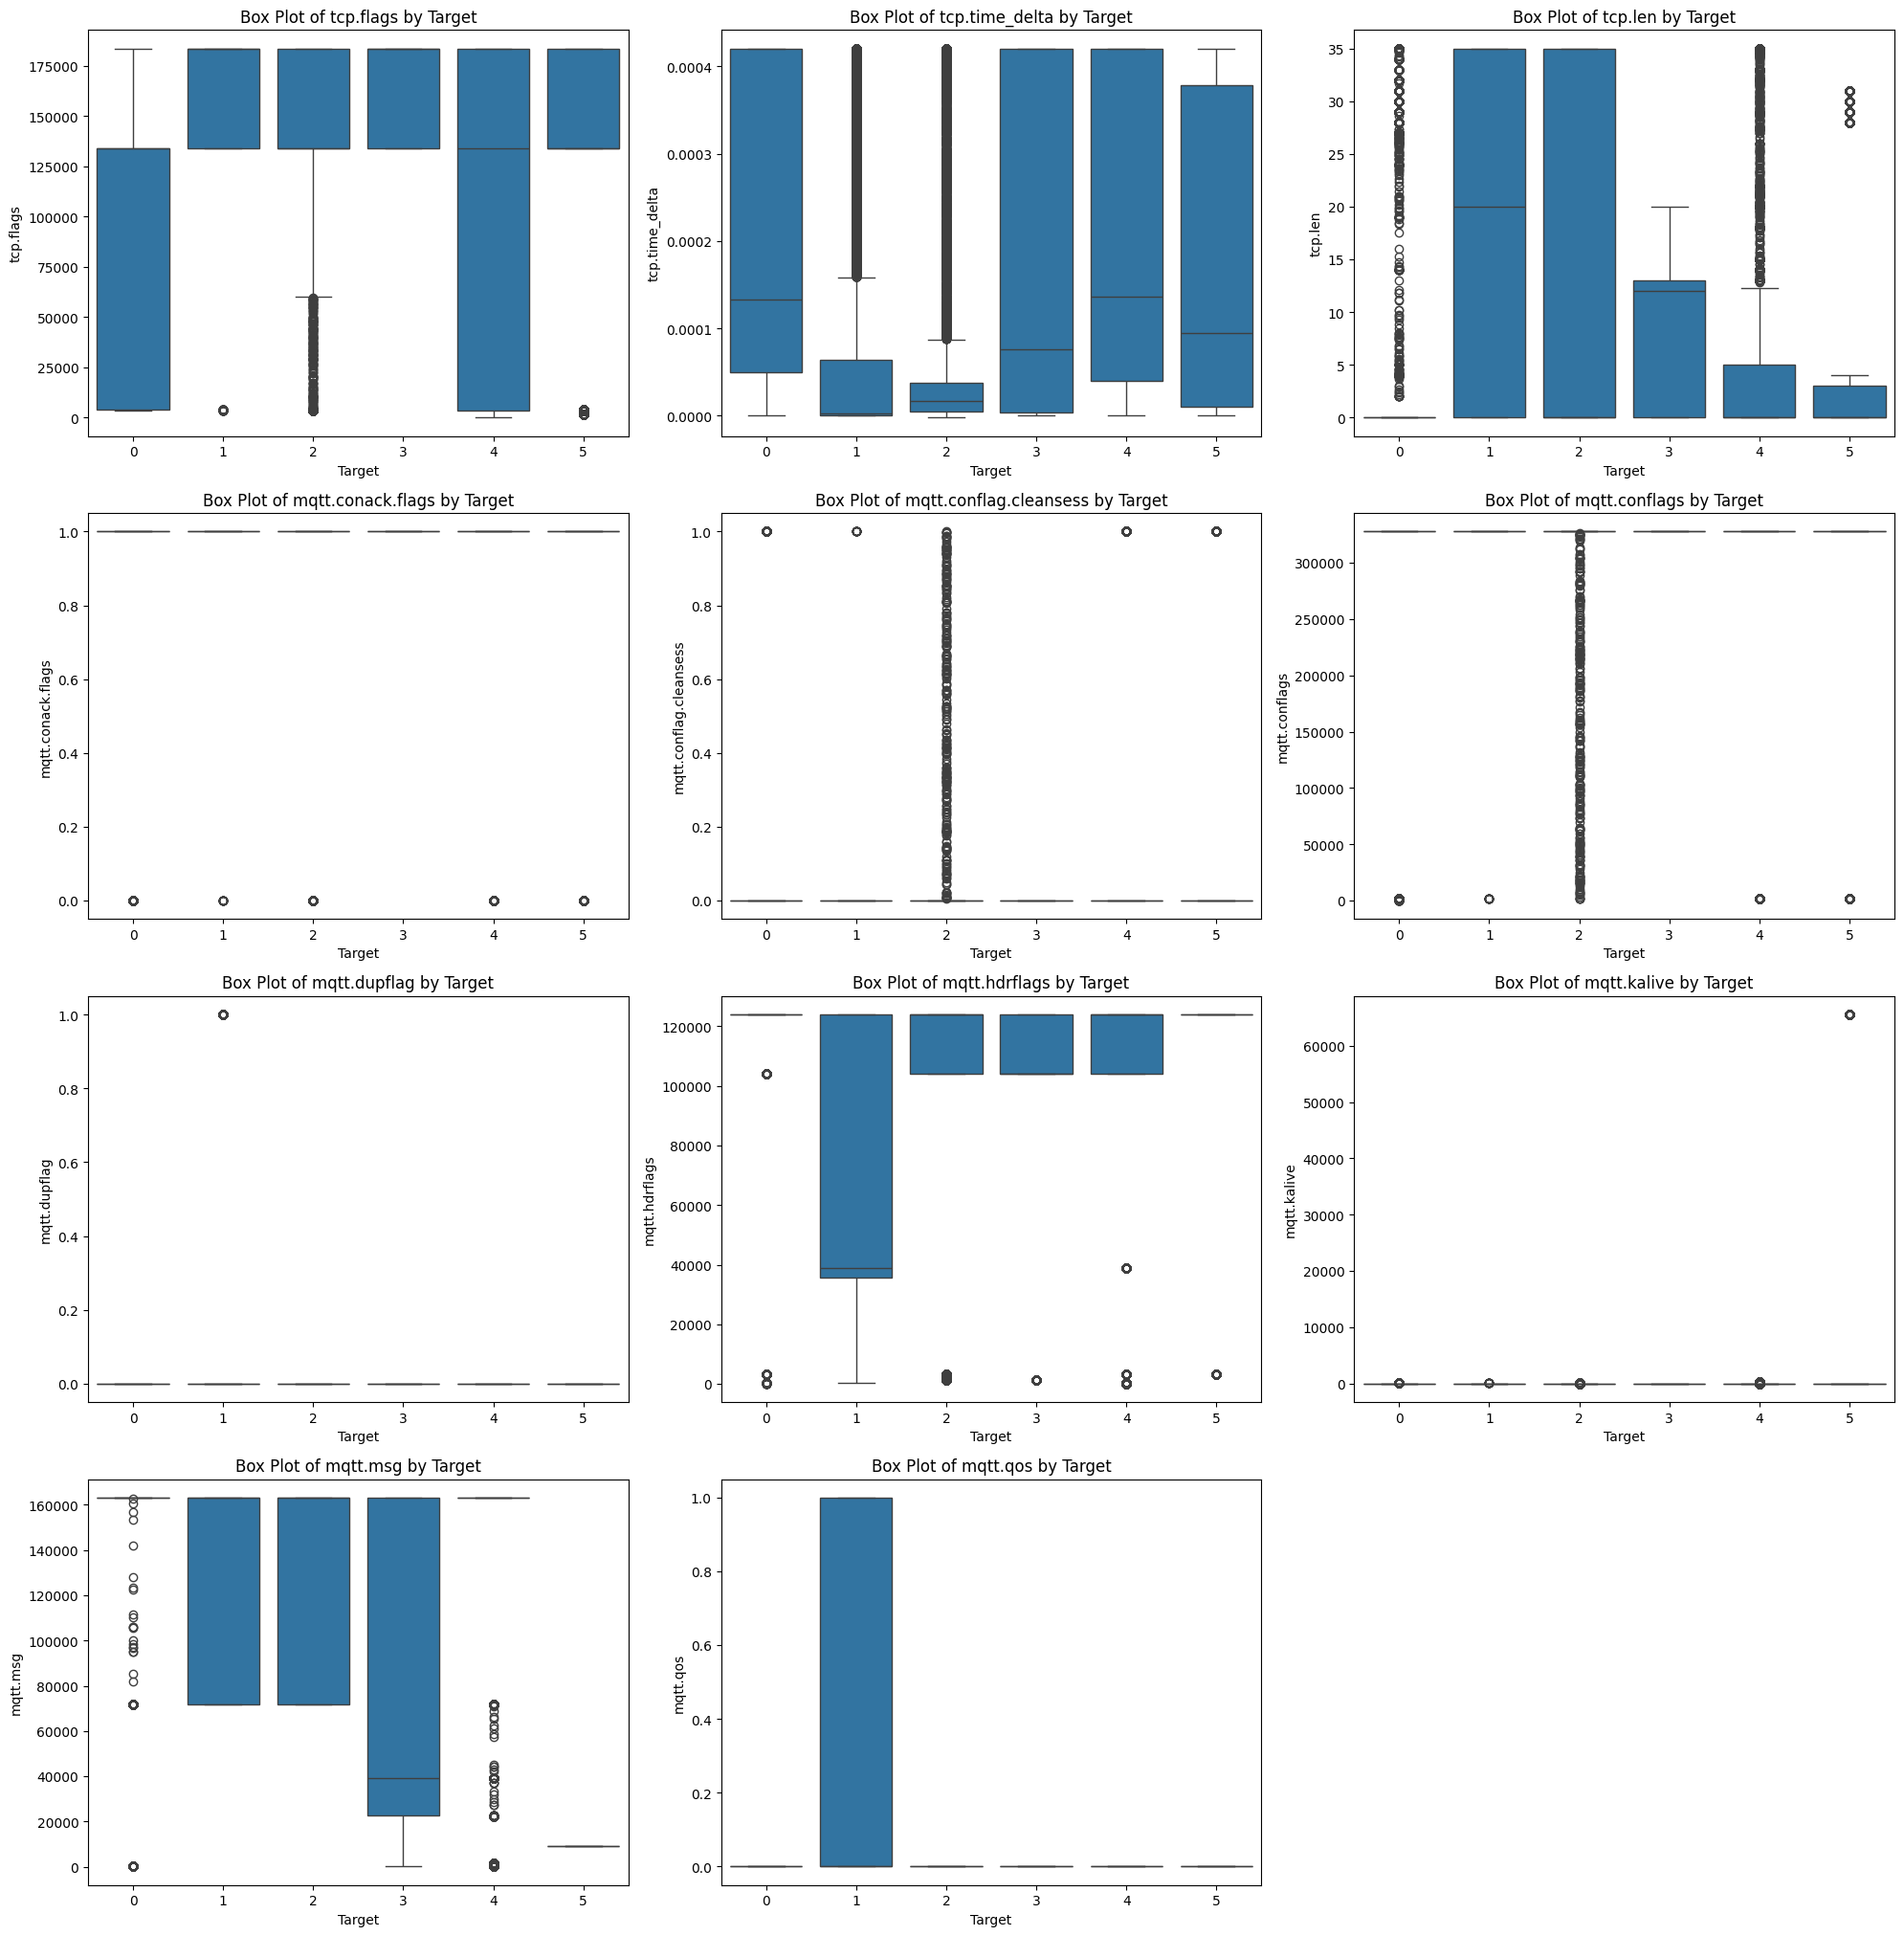

In [158]:
# Combine features and target for plotting
data_for_plotting = pd.concat([X, data_resampled_combined['target']], axis=1)

# Plot the variation of numerical features with the target
plt.figure(figsize=(20, 30))
for i, column in enumerate(X.columns, 1):
    plt.subplot(6, 3, i)
    sns.boxplot(x='target', y=column, data=data_for_plotting)
    plt.title(f'Box Plot of {column} by Target')
    plt.xlabel('Target')
    plt.ylabel(column)
plt.tight_layout()
plt.show()


In [161]:

# Save the scaled data to a new CSV file
data_resampled_combined.to_csv('data_MQTT_final.csv', index=False)


In [159]:
from sklearn.preprocessing import StandardScaler

# Initialize the scaler
scaler = StandardScaler()

# Fit the scaler to the features and transform the features
X_scaled = scaler.fit_transform(X)

# Convert the scaled features back to a DataFrame
X_scaled_df = pd.DataFrame(X_scaled, columns=X.columns)

# Combine the scaled features with the target
data_scaled_combined = pd.concat([X_scaled_df, y.reset_index(drop=True)], axis=1)

# Save the scaled data to a new CSV file
data_scaled_combined.to_csv('data_MQTT_standar_final.csv', index=False)

# Display the first few rows of the scaled data
print("Scaled Data:")
print(data_scaled_combined.head())
print(f"Shape of scaled data: {data_scaled_combined.shape}")


Scaled Data:
   tcp.flags  tcp.time_delta   tcp.len  mqtt.conack.flags  \
0   0.062476       -0.748677 -0.696807           0.223899   
1   0.829035       -0.859033  1.938831           0.223899   
2   0.829035       -0.853225 -0.094375           0.223899   
3   0.829035       -0.853225  1.938831           0.223899   
4   0.062476       -0.835801 -0.696807           0.223899   

   mqtt.conflag.cleansess  mqtt.conflags  mqtt.dupflag  mqtt.hdrflags  \
0               -0.223755       0.223755     -0.156965       0.645874   
1               -0.223755       0.223755     -0.156965      -1.414667   
2               -0.223755       0.223755     -0.156965      -1.340959   
3               -0.223755       0.223755     -0.156965      -1.414667   
4               -0.223755       0.223755     -0.156965       0.645874   

   mqtt.kalive  mqtt.msg  mqtt.qos  target_bruteforce  target_dos  \
0    -0.137011  0.860325 -0.273775                  0           0   
1    -0.137011 -0.527550  3.652634         

In [160]:
from sklearn.preprocessing import MinMaxScaler

# Initialize the scaler
scaler = MinMaxScaler()

# Fit the scaler to the features and transform the features
X_normalized = scaler.fit_transform(X)

# Convert the normalized features back to a DataFrame
X_normalized_df = pd.DataFrame(X_normalized, columns=X.columns)

# Combine the normalized features with the target
data_normalized_combined = pd.concat([X_normalized_df, y.reset_index(drop=True)], axis=1)

# Save the normalized data to a new CSV file
data_normalized_combined.to_csv('data_MQTT_normalized_final.csv', index=False)

# Display the first few rows of the normalized data
print("Normalized Data:")
print(data_normalized_combined.head())
print(f"Shape of normalized data: {data_normalized_combined.shape}")


Normalized Data:
   tcp.flags  tcp.time_delta   tcp.len  mqtt.conack.flags  \
0   0.730348        0.049704  0.000000                1.0   
1   1.000000        0.004734  1.000000                1.0   
2   1.000000        0.007101  0.228571                1.0   
3   1.000000        0.007101  1.000000                1.0   
4   0.730348        0.014201  0.000000                1.0   

   mqtt.conflag.cleansess  mqtt.conflags  mqtt.dupflag  mqtt.hdrflags  \
0                     0.0            1.0           0.0       1.000000   
1                     0.0            1.0           0.0       0.287515   
2                     0.0            1.0           0.0       0.313002   
3                     0.0            1.0           0.0       0.287515   
4                     0.0            1.0           0.0       1.000000   

   mqtt.kalive  mqtt.msg  mqtt.qos  target_bruteforce  target_dos  \
0          0.0  1.000000       0.0                  0           0   
1          0.0  0.439288       1.0     

In [162]:
# Generate summary statistics
summary_stats = data_normalized_combined.describe()

# Display the summary statistics
summary_stats

,tcp.flags,tcp.time_delta,tcp.len,mqtt.conack.flags,mqtt.conflag.cleansess,mqtt.conflags,mqtt.dupflag,mqtt.hdrflags,mqtt.kalive,mqtt.msg,mqtt.qos,target_bruteforce,target_dos,target_flood,target_legitimate,target_malformed,target_slowite
count,992778.000000,992778.000000,992778.000000,992778.000000,992778.000000,992778.000000,992778.000000,992778.000000,992778.000000,992778.000000,992778.000000,992778.000000,992778.000000,992778.000000,992778.000000,992778.000000,992778.000000
mean,0.708371,0.354791,0.264379,0.952262,0.047634,0.952614,0.024046,0.776673,0.018399,0.652422,0.069727,0.166667,0.166667,0.166667,0.166667,0.166667,0.166667
std,0.351769,0.407502,0.379415,0.213211,0.212884,0.211778,0.153191,0.345776,0.134291,0.404008,0.254686,0.372678,0.372678,0.372678,0.372678,0.372678,0.372678
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.730348,0.016568,0.000000,1.000000,0.000000,1.000000,0.000000,0.838658,0.000000,0.239035,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.730348,0.132544,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.889941,0.400000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
